<a href="https://colab.research.google.com/github/shubhamscifi/Instacart-Market-Basket-Analysis/blob/main/Instacart%20Market%20Basket%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis/)**

---
# **Problem Overview:**

Which products will an Instacart consumer purchase again?

1. Instacart is a grocery ordering and delivery app.
2.   Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session.
3.    The goal is to predict which previously purchased products will be in a user’s next order.
4. For each orderid in the test set, we should predict a space-delimited list of productids for that order. If we wish to predict an empty order, we should submit an explicit 'None' value. Note that some orders will have no reordered items. We may predict an explicit 'None' value for orders with no reordered items.
5. over 3 million grocery orders.
6. more than 200,000 Instacart users.
7. For each user, instacart provided between 4 and 100 of their orders, with the sequence of products purchased in each order.

---








## **Problem Definition:**
###    - Given order_id predict all the products that the user will reorder.

---



## **Business Objective:**
- Predicting reorders in advance is of huge business value for any delivery business, as this can significantly help in optimising the supply-chain management system.
- This can also be used to enhance the customer experience. eg:- Remind the customer to reorder a product.
- This can also be used to improve the recommender system.
- ML model can help here in predicting the reorders.
- Any delivery or retail business can get benefitted from the solution to this problem.

## **Business Constraints:**
- We want our model to perform equally good for all the orders.
- Predicting reorders of products that are reordered a lot is more important than the products that are reordered a few times.
- No strict latency requirements.
- Interpretability is partially important.
- Since recommending some products which a customer is not going to reorder will lead to the customer exploring new products, a few False Positives doesn't harm.
- False Negatives for highly reordered products can be costly.


---

## [**Dataset Description:**](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b#file-data_description-md)
<article class="markdown-body entry-content container-lg" itemprop="text"><p><code>orders</code> (3.4m rows, 206k users):</p>
<ul>
<li><code>order_id</code>: order identifier</li>
<li><code>user_id</code>: customer identifier</li>
<li><code>eval_set</code>: which evaluation set this order belongs in (see <code>SET</code> described below)</li>
<li><code>order_number</code>: the order sequence number for this user (1 = first, n = nth)</li>
<li><code>order_dow</code>: the day of the week the order was placed on</li>
<li><code>order_hour_of_day</code>: the hour of the day the order was placed on</li>
<li><code>days_since_prior</code>: days since the last order, capped at 30 (with NAs for <code>order_number</code> = 1)</li>
</ul>
<p><code>products</code> (50k rows):</p>
<ul>
<li><code>product_id</code>: product identifier</li>
<li><code>product_name</code>: name of the product</li>
<li><code>aisle_id</code>: foreign key</li>
<li><code>department_id</code>: foreign key</li>
</ul>
<p><code>aisles</code> (134 rows):</p>
<ul>
<li><code>aisle_id</code>: aisle identifier</li>
<li><code>aisle</code>: the name of the aisle</li>
</ul>
<p><code>deptartments</code> (21 rows):</p>
<ul>
<li><code>department_id</code>: department identifier</li>
<li><code>department</code>: the name of the department</li>
</ul>
<p><code>order_products__SET</code> (30m+ rows):</p>
<ul>
<li><code>order_id</code>: foreign key</li>
<li><code>product_id</code>: foreign key</li>
<li><code>add_to_cart_order</code>: order in which each product was added to cart</li>
<li><code>reordered</code>: 1 if this product has been ordered by this user in the past, 0 otherwise</li>
</ul>
<p>where <code>SET</code> is one of the four following evaluation sets (<code>eval_set</code> in <code>orders</code>):</p>
<ul>
<li><code>"prior"</code>: orders prior to that users most recent order (~3.2m orders)</li>
<li><code>"train"</code>: training data supplied to participants (~131k orders)</li>
<li><code>"test"</code>: test data reserved for machine learning competitions (~75k orders)</li>
</ul>
</article>


src: https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2

---



<div class="markdown-converter__text--rendered">
<h2>Submission File</h2>
<p>For each order_id in the test set, you should predict a space-delimited list of product_ids for that order. If you wish to predict an empty order, you should submit an explicit 'None' value. You may combine 'None' with product_ids. The spelling of 'None' is case sensitive in the scoring metric. The file should have a header and look like the following:</p>
<pre><code>order_id,products  
17,1 2  
34,None  
137,1 2 3  
etc.
</code></pre></div>

---

![instacart_Files.png](https://storage.googleapis.com/kaggle-forum-message-attachments/183176/6539/instacartFiles.png)
src: https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33128

---



## **Evaluation Metric**
* Submissions will be evaluated based on their 
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#:~:text=F%CE%B2(y%2Cy%5E)-,%22samples%22,-1%7CS%7C%E2%88%91s">Samples F1-score</a> i.e. average of F1-score for each order_id.

[](https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33357#:~:text=You%20take%20the%20average%20of%20all%20the%20F1%20scores%20across%20the%20order_ids)
    
    - Reason:
        - We want our model to give equal weightage to each order.
        - We want a model with good Precision and Recall both.

* Confusion Matrix will be used as secondary metric.
---



## System Specifications💻:

**Operating System:**

In [ ]:
!uname
!lsb_release -d

Linux
Description:	Ubuntu 18.04.5 LTS


**CPU Info:**

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           AuthenticAMD
CPU family:          23
Model:               49
Model name:          AMD EPYC 7B12
Stepping:            0
CPU MHz:             2249.998
BogoMIPS:            4499.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            512K
L3 cache:            16384K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignss

**RAM size:**

In [ ]:
!grep MemTotal /proc/meminfo    # 25.46 GB

MemTotal:       26698868 kB


**GPU info:**

In [ ]:
!nvidia-smi

Sat Jun 19 12:10:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading Dataset

In [ ]:
# Kaggle authentication
from getpass import getpass
import os

os.environ['KAGGLE_USERNAME'] = "shubhamscifi" #input('Enter kaggle username: ') # kaggle username
os.environ['KAGGLE_KEY'] = getpass('Enter Token: ') # kaggle api key

Enter Token: ··········


In [ ]:
# https://github.com/Kaggle/kaggle-api#download-competition-files
# fetching the instacart-market-basket-analysis dataset from kaggle.
!kaggle competitions download -c instacart-market-basket-analysis -p ./dataset

 72% 5.00M/6.90M [00:00<00:00, 19.5MB/s]
100% 6.90M/6.90M [00:00<00:00, 23.0MB/s]
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 69.9MB/s]
 93% 146M/157M [00:01<00:00, 98.1MB/s]
100% 157M/157M [00:01<00:00, 98.7MB/s]
  0% 0.00/804 [00:00<?, ?B/s]
100% 804/804 [00:00<00:00, 693kB/s]
 77% 24.0M/31.3M [00:00<00:00, 64.0MB/s]
100% 31.3M/31.3M [00:00<00:00, 89.9MB/s]
  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 108MB/s]
  0% 0.00/1.87k [00:00<?, ?B/s]
100% 1.87k/1.87k [00:00<00:00, 1.60MB/s]


In [ ]:
# Unzipping
zip_file = os.listdir('dataset')
for file in zip_file:
    !unzip /content/dataset/{file}
!rm -rf /content/dataset

Archive:  /content/dataset/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/dataset/products.csv.zip
  inflating: products.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._products.csv  
Archive:  /content/dataset/order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  
Archive:  /content/dataset/departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
Archive:  /content/dataset/aisles.csv.zip
  inflating: aisles.csv              
  inflating: __MACOSX/._aisles.csv   
Archive:  /content/dataset/orders.csv.zip
  inflating: orders.csv              
  inflating: __MACOSX/._orders.csv   
Archive:  /content/dataset/order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  


**Download intermediate prepared tables.**

In [ ]:
!kaggle datasets download -d shubhamscifi/instacart --unzip

 99% 1.46G/1.47G [00:13<00:00, 189MB/s]
100% 1.47G/1.47G [00:13<00:00, 113MB/s]


**Kaggle file uploader utility:**
- To upload intermediate tables.

In [ ]:
def kaggle_file_uploader(files,id='shubhamscifi/instacart',title='instacart',folder='data',msg='',first_time=False,del_after_upload=True):
    '''Uploads list of files to kaggle.
    Note: make sure to run after kaggle authentication.
    id : must be between 6-50 chars after "username/".
    title : must be between 6-50 chars.
    files : list of path of files that are to be uploaded.
    first_time: True if the data is being uploaded for the first time.
    del_after_upload: True if given folder needs to be deleted after file upload finishes.'''
    # https://github.com/Kaggle/kaggle-api

    # create data package json file
    !mkdir {folder}
    !kaggle datasets init -p {folder}

    # preparing metadata json file
    import json,os
    metadata = open(os.path.join(folder,'dataset-metadata.json'),'r+')
    meta = json.load(metadata)
    meta['id'] = id
    meta['title']= title
    metadata.seek(0)
    json.dump(meta,metadata)
    metadata.truncate()
    metadata.close()

    for file in set(files):
        !cp {file} {folder}

    # upload dataset to kaggle
    if (first_time):
        !kaggle datasets create -p {folder}
    else:
        # Create a New Dataset Version
        !kaggle datasets version -p {folder} -m '{msg}'

    if (del_after_upload):
        !rm -rf {folder}

**Changing the display of DataFrames as interactive tables.**

In [ ]:
# dataframes are shown as rich, interactive tables
%load_ext google.colab.data_table

In [ ]:
# restoring the standard static display
%unload_ext google.colab.data_table

## Importing libraries

In [ ]:
!pip install --upgrade plotly
!pip3 install --upgrade category_encoders
!pip install -U memory_profiler
%load_ext memory_profiler

     |████████████████████████████████| 20.6 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 80 kB 4.0 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30189 sha256=fb9f0fa3382826d4a9342b264ab045f3b3cd202b3842972fe695865ab08373f5
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [ ]:
# requirements file
!pip freeze > requirements.txt

In [ ]:
import plotly
import plotly.express as px
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import gc   # garbage collector
import pickle
# https://pypi.org/project/tqdm/#:~:text=jupyter%20console.%20Use-,auto,-instead%20of%20autonotebook
from tqdm.auto import tqdm
import time
from joblib import Parallel, delayed
from sklearn.metrics import f1_score,confusion_matrix,\
                            precision_recall_fscore_support,classification_report,\
                            accuracy_score,log_loss
from sklearn.model_selection import train_test_split

bold = lambda string: '\033[1m'+string+'\033[0m'    # for bold text
printb = lambda string: print('\033[1m'+string+'\033[0m')
# https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python/8930747

## Loading Data

In [ ]:
# loading data into pandas dataframe
orders = pd.read_csv('/content/orders.csv',dtype={'order_id':np.uint32,
                                                  'user_id' :np.uint32,
                                                  'order_number':'uint8',
                                                  'order_hour_of_day':'uint8',
                                                  'order_dow':'uint8',
                                                  'days_since_prior_order':'float16'})
dep = pd.read_csv('/content/departments.csv', dtype={'department_id':'uint8',
                                                     'department': str})
aisles = pd.read_csv('/content/aisles.csv', dtype={'aisle_id':'uint8',
                                                     'aisle': str})
products = pd.read_csv('/content/products.csv', dtype={'aisle_id':'uint8',
                                                     'department_id':'uint8',
                                                     'product_name': str,
                                                     'product_id': np.uint16})
order_products_prior = pd.read_csv('/content/order_products__prior.csv',
                                   dtype={'add_to_cart_order':'uint8',
                                          'reordered':'uint8',
                                          'order_id':np.uint32,
                                          'product_id':np.uint16})
order_products_train = pd.read_csv('/content/order_products__train.csv',
                                   dtype={'add_to_cart_order':'uint8',
                                          'reordered':'uint8',
                                          'order_id':np.uint32,
                                          'product_id':np.uint16})

<a name="data-overview"></a>
## **Data overview**🔎
- Overviewing each Table
- Understanding each column.


#### **Aisles**

In [ ]:
aisles

aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

In [ ]:
aisles.loc[aisles.aisle.str.contains('missing'),:]

aisle_id    aisle
99       100  missing

In [ ]:
aisles.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    uint8 
 1   aisle     134 non-null    object
dtypes: object(1), uint8(1)
memory usage: 9.7 KB


> **Observations:**
- Total 134 aisles.
- aisle number 100 is not missing but it's name is "missing".
- Maybe, it is the aisle for missing or non-assigned products.

---



#### **Departments**

In [ ]:
dep

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [ ]:
dep.loc[dep.department.str.contains('missing'),:]

department_id department
20             21    missing

In [ ]:
dep.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     uint8 
 1   department     21 non-null     object
dtypes: object(1), uint8(1)
memory usage: 1.5 KB


> **Observations:**
- Total 21 departments.
- Similar, to aisle number 100 department number 21's name is also "missing".
- Maybe, it is the department for missing or non-assigned products.

---

#### **Products**

In [ ]:
products

product_id  ... department_id
0               1  ...            19
1               2  ...            13
2               3  ...             7
3               4  ...             1
4               5  ...            13
...           ...  ...           ...
49683       49684  ...             5
49684       49685  ...             1
49685       49686  ...             3
49686       49687  ...             8
49687       49688  ...            11

[49688 rows x 4 columns]

In [ ]:
products.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  uint8 
 3   department_id  49688 non-null  uint8 
dtypes: int64(1), object(1), uint8(2)
memory usage: 4.6 MB


>**Observations:**
- Total 49,688 (~50k) products.
- Each product belongs to a unique aisle and department.

---



#### **Orders**

In [ ]:
orders

order_id  user_id  ... order_hour_of_day  days_since_prior_order
0         2539329        1  ...                 8                     NaN
1         2398795        1  ...                 7                    15.0
2          473747        1  ...                12                    21.0
3         2254736        1  ...                 7                    29.0
4          431534        1  ...                15                    28.0
...           ...      ...  ...               ...                     ...
3421078   2266710   206209  ...                18                    29.0
3421079   1854736   206209  ...                10                    30.0
3421080    626363   206209  ...                12                    18.0
3421081   2977660   206209  ...                12                     7.0
3421082    272231   206209  ...                14                    30.0

[3421083 rows x 7 columns]

In [ ]:
orders.info(null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  uint8  
 4   order_dow               3421083 non-null  uint8  
 5   order_hour_of_day       3421083 non-null  uint8  
 6   days_since_prior_order  3214874 non-null  float16
dtypes: float16(1), int64(2), object(1), uint8(3)
memory usage: 270.7 MB


In [ ]:
print('No. of unique values per column:')
print('--------------------------------')
orders.nunique()

No. of unique values per column:
--------------------------------


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

> **Observation:**
- Total 3,421,083 (~3.4M) orders.
- Total 206,209 (~206k) users.
- <u>order_number</u>: the order sequence number for this user (1 = first, n = nth).
- <u>order_dow</u>: the day of the week the order was placed on (0-6).
- <u>order_hour_of_day</u>: the hour of the day the order was placed on (0-23).

In [ ]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [ ]:
print('Each order belongs to either train or test or prior set.')
print('\t\t user_id=1')
display(orders.loc[orders.user_id==1,['order_id','user_id','eval_set','order_number']].head(20))
print('\n\t\t user_id=32')
display(orders.loc[orders.user_id==32,['order_id','user_id','eval_set','order_number']].head(20))
print('Each user belongs to either train or test set.')
print("""Depending upon the eval_set value of the user's last order\
 i.e. train/test the user belongs to that set respectively.""")

Each order belongs to either train or test or prior set.
		 user_id=1


order_id  user_id eval_set  order_number
0    2539329        1    prior             1
1    2398795        1    prior             2
2     473747        1    prior             3
3    2254736        1    prior             4
4     431534        1    prior             5
5    3367565        1    prior             6
6     550135        1    prior             7
7    3108588        1    prior             8
8    2295261        1    prior             9
9    2550362        1    prior            10
10   1187899        1    train            11


		 user_id=32


order_id  user_id eval_set  order_number
470    134879       32    prior             1
471   1275838       32    prior             2
472   1709286       32    prior             3
473     72626       32    prior             4
474   1210985       32    prior             5
475   3202221       32     test             6

Each user belongs to either train or test set.
Depending upon the eval_set value of the user's last order i.e. train/test the user belongs to that set respectively.


In [ ]:
print('Number of orders belonging to each set:')
orders.value_counts('eval_set')

Number of orders belonging to each set:


eval_set
prior    3214874
train     131209
test       75000
dtype: int64

> **Observaitons:**
- <u>eval_set</u>: which evaluation set this order belongs in (train/test/prior).
    - "prior": orders prior to that user's most recent order (~3.2m orders)
    - "train": user's most recent order for training (~131k orders)
    - "test": user's most recent order test data for which we have to do prediction (75k orders)
    - ![](https://i.imgur.com/S0Miw3m.png) 
    - img src:
    https://www.kaggle.com/kokovidis/ml-instacart-f1-0-38-part-two-xgboost-f1-max
- Each user is associated with either train or test data, since his/her last order is in either train or test eval_set.
    - ~131k train users.
    - 75k test users.

In [ ]:
print('No. of null values in days_since_prior_order column = ', end='')
orders.days_since_prior_order.isna().sum()

No. of null values in days_since_prior_order column = 

206209

> **Observations:**
- <u>days_since_prior_order</u>: days since the last order, capped at 30 (with NaNs for order_number = 1)
    - days_since_prior_order col. contains 206,209 (~206k) NaN values.
    - These are not missing values.
    - There is no prior order for the 1st order placed by an user. Hence, this column's value for such cases are kept NaN. That's why no. of NaN values is exactly equal to no. of users.
- Basically, this table contains the metadata of each order.

---



#### **order_products_prior**

In [ ]:
order_products_prior

order_id  product_id  add_to_cart_order reordered
0                2       33120                  1         1
1                2       28985                  2         1
2                2        9327                  3         0
3                2       45918                  4         1
4                2       30035                  5         0
...            ...         ...                ...       ...
32434484   3421083       39678                  6         1
32434485   3421083       11352                  7         0
32434486   3421083        4600                  8         0
32434487   3421083       24852                  9         1
32434488   3421083        5020                 10         1

[32434489 rows x 4 columns]

In [ ]:
order_products_prior.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype   
---  ------             --------------     -----   
 0   order_id           32434489 non-null  int64   
 1   product_id         32434489 non-null  int64   
 2   add_to_cart_order  32434489 non-null  uint8   
 3   reordered          32434489 non-null  category
dtypes: category(1), int64(2), uint8(1)
memory usage: 556.8 MB


> **Observations:**
- This table contains all the products purchased in each prior order with the sequence of products purchased in that order. For both train and test users.
- <u>add_to_cart_order</u>: order in which each product was added to cart.
- <u>reordered</u>: 1 if this product has been ordered by the user in the past, 0 otherwise.
    - 1 - 'reorder'
    - 0 - 'first purchase'

---



#### **order_products_train**

In [ ]:
order_products_train

order_id  product_id  add_to_cart_order  reordered
0               1       49302                  1          1
1               1       11109                  2          1
2               1       10246                  3          0
3               1       49683                  4          0
4               1       43633                  5          1
...           ...         ...                ...        ...
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1

[1384617 rows x 4 columns]

In [ ]:
order_products_train.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  uint8
 3   reordered          1384617 non-null  int8 
dtypes: int64(2), int8(1), uint8(1)
memory usage: 23.8 MB


> **Observations:**
- This table contains all the products purchased in each train order with the sequence of products purchased in that order.
- <u>add_to_cart_order</u>: order in which each product was added to cart.
- <u>reordered</u>: 1 if this product has been ordered by the user in the past, 0 otherwise.
    - 1 - 'reorder'
    - 0 - 'first purchase'
- There are no missing values in any of the tables.

---



## **Mapping to a Supervised classification problem:**
- Task: Given order_id i.e.{user info + info of prior products purchased by that user} predict all the products that will be reordered.
- Since, we have to predict multiple products for a given order_id. This is a multilabel classification task with (~50k) labels.
- Simplifying the task:
    - Given the order_id, we know the user_id.
    - The products that the user has never bought can't be reordered.
    - Only the prior products(i.e. products bought earlier) can be reordered by this user.
    - We can run **binary classification** for all such products, where "reordered" is target variable(Y).
    - Predictor variables(X) will contain user_info & product_info.
    - Hence the evaluation metric(mean F1-score) can be calculated using the F1-score on binary classification task.

![](https://i.imgur.com/Yb1CKAF.png)

img src: https://www.kaggle.com/kokovidis/ml-instacart-f1-0-38-part-two-xgboost-f1-max

---



## Data Cleaning.🧹
- Deduplication
- Find and Fix any missing values.
- Find and Fix any Garbage/incorrect values.

#### **Deduplication**

In [ ]:
print('Is there any duplicate rows in aisles table?','->',sep='\n',end='')
aisles.duplicated().any()

Is there any duplicate rows in aisles table?
->

False

In [ ]:
print('Is there any duplicate rows in departments table?','->',sep='\n',end='')
dep.duplicated().any()

Is there any duplicate rows in departments table?
->

False

In [ ]:
print('Is there any duplicate rows in products table?','->',sep='\n',end='')
products.duplicated().any()

Is there any duplicate rows in products table?
->

False

In [ ]:
print('Is there any duplicate rows in orders table?','->',sep='\n',end='')
orders.duplicated().any()

Is there any duplicate rows in orders table?
->

False

In [ ]:
print('Is there any duplicate rows in order_products_prior table?','->',sep='\n',end='')
order_products_prior.duplicated().any()

Is there any duplicate rows in order_products_prior table?
->

False

In [ ]:
print('Is there any duplicate rows in order_products_train table?','->',sep='\n',end='')
order_products_train.duplicated().any()

Is there any duplicate rows in order_products_train table?
->

False

> **Observations:**
- There are no duplicates in any of the tables.

---



#### **Missing Values**
- As we saw in the [Data overview](#data-overview) section, there are no missing values in any of the tables.

---



#### **Garbage Values**

In [ ]:
print('       aisles table')
print('  Column         Is there any garbage value?')
print('-----------      ---------------------------')
sep='          ' 
print('aisle_id',aisles.aisle_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('   aisle',aisles.aisle.str.contains('[^a-zA-Z ]').any(),sep=sep)

       aisles table
  Column         Is there any garbage value?
-----------      ---------------------------
aisle_id          False
   aisle          False


In [ ]:
print('       departments table')
print('    Column         Is there any garbage value?')
print('-------------      ---------------------------')
sep='          ' 
print('department_id',dep.department_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('   department',dep.department.str.contains('[^a-zA-Z ]').any(),sep=sep)

       departments table
    Column         Is there any garbage value?
-------------      ---------------------------
department_id          False
   department          False


In [ ]:
print('         products table')
print('    Column         Is there any garbage value?')
print('-------------      ---------------------------')
sep='          ' 
print('   product_id',products.product_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('     aisle_id',products.product_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('department_id',products.product_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print(' product_name',products.product_name.str.contains('[^a-zA-Z ]').any(),sep=sep)

         products table
    Column         Is there any garbage value?
-------------      ---------------------------
   product_id          False
     aisle_id          False
department_id          False
 product_name          True


In [ ]:
printb('Special characters in product names:')
special_char = set(re.findall("[^a-zA-Z0-9 ]",''.join(products.loc[:,'product_name'])))
print(special_char)
print(f'Total {len(special_char)} distinct special characters.')

Special characters in product names:
{'#', '/', 'ó', '™', 'í', '’', '´', '\x8f', ')', '"', 'û', '?', 'á', '�', '*', 'â', 'ú', '&', '\\', '.', '%', 'е', '(', '}', '˚', '°', '-', '‑', 'é', ',', '”', 'è', 'ñ', '–', 'ü', '`', '{', '®', '=', 'ô', '+', '!', ':', '@', '$', '\xa0', "'", 'ç', ';'}
Total 49 distinct special characters.


In [ ]:
print("\033[1m","Let's see some product names containing above special chars:","\033[0m") # \033[1m for printing bold
print("------------------------------------------------------------")
print('char                      product name')
print('----         ----------------------------------------')
sep= '          '
for char in special_char:
    print(repr(char),products.loc[products.product_name.str.contains(char,regex=False),'product_name'].iloc[0], sep=sep)

 Let's see some product names containing above special chars: 
------------------------------------------------------------
char                      product name
----         ----------------------------------------
'#'          Natural Brown Cone Style Coffee Filters #4
'/'          24/7 Performance Cat Litter
'ó'          Chile Limón Flavored Potato Chips
'™'          Mouthwash Clean Mint Listerine® Zero™
'í'          Blueberry Pomegranate Acaí Cultured Goat Milk Kefir
'’'          Kickin’ BBQ Chopped Salad
'´'          Women´s Multivitamin Gummies
'\x8f'          Hershey's Chocolate Creme Pie Singles
')'          Fabric Refresher Meadows & Rain Air Freshener (1 Count, 27 oz)  Air Care
'"'          Easy Grab 9\"x13\" Oblong Glass Bakeware
'û'          Milk Chocolate Truffle Brûlée
'?'          Ksa Ko?Lsch Style Ale
'á'          Reserve Dark Roast Guatemala San Sebastián Ground Coffee
'�'          Diana�s Bananas Milk Chocolate with Peanuts - Banana Babies � 5 CT
'*'          Fresh 

In [ ]:
# Remove special characters from product names.
x=products.product_name.astype(str)\
                    .replace({'\xa0': '',
                               '\x8f': '', 
                               r'[{}]': '',
                               r'\*': '',
                               r'e': 'ea',
                               '�': '',
                               '[-–‑]': ' ',
                               r';': '',
                               '=': ' equal to ',
                               '@': 'at',
                               '\+': ' plus ',
                               '[âá]': 'a',
                               '[еéè]': 'e',
                               'í': 'i',
                               'ñ': 'n',
                               '[óô]': 'o',
                               '[üûú]': 'u',
                               'ç': 'c',
                               '[°˚]': ' degree ',
                               '[®™]': '',
                               r"'s": '',
                               r'`s': '',
                               r'´s': '',
                               r"'": '',
                               r"’": '',
                               r"”": ' inch ',
                               r'\"': ' inch ',
                               r'\\': '',
                               ':': '',
                               '\?': ' ',
                               r',': '',
                               r'%': ' percent ',
                               r'&#':' No. ',
                               r'#': ' No. ',
                               r' & ': ' and ',
                               r'&': ' and ',
                               r'!': '',
                               r'24/7': ' 24_7 ',
                               r'w/': ' with ',
                               r'/': ' ',
                               r'\$': ' Dollar ',
                               'Bananas': 'Banana',
                               'Strawberries': 'Strawberry',
                               r'( )+': ' '},
                              regex=True)
x = x.str.strip()   # Removing trailing and leading whitespaces

In [ ]:
products['product_name'] = x
del x
products

product_id  ... department_id
0               1  ...            19
1               2  ...            13
2               3  ...             7
3               4  ...             1
4               5  ...            13
...           ...  ...           ...
49683       49684  ...             5
49684       49685  ...             1
49685       49686  ...             3
49686       49687  ...             8
49687       49688  ...            11

[49688 rows x 4 columns]

"^a-zA-Z0-9:@$&,%!?.âáеéèíñóôüûúç°˚®™´'’”=+/()#\"\-–‑ �\\\;{}`*\xa0\x8f"
- All unnecessary characters have been removed.

In [ ]:
print('                orders table')
print('         Column              Is there any garbage value?')
print('-----------------------      ---------------------------')
sep='          ' 
print('               order_id',orders.order_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('                user_id',orders.user_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('               eval_set',orders.eval_set.astype('str').str.contains('[^\b(prior|train|test)\b]').any(),sep=sep)
print('           order_number',orders.order_number.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('              order_dow',not(orders.order_dow.between(0,6).any()),sep=sep)
print('      order_hour_of_day',not(orders.order_hour_of_day.between(0,23).any()),sep=sep)
print(' days_since_prior_order',not(orders.days_since_prior_order.between(0,30).any()),sep=sep)

                orders table
         Column              Is there any garbage value?
-----------------------      ---------------------------
               order_id          False
                user_id          False
               eval_set          False
           order_number          False
              order_dow          False
      order_hour_of_day          False
 days_since_prior_order          False


In [ ]:
print('       order_products_prior table')
print('      Column          Is there any garbage value?')
print('-----------------     ---------------------------')
sep='          ' 
print('         order_id',order_products_prior.order_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('       product_id',order_products_prior.product_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('add_to_cart_order',order_products_prior.add_to_cart_order.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('        reordered',not(order_products_prior.reordered.astype('uint8').between(0,1).any()),sep=sep)

       order_products_prior table
      Column          Is there any garbage value?
-----------------     ---------------------------
         order_id          False
       product_id          False
add_to_cart_order          False
        reordered          False


In [ ]:
print('       order_products_train table')
print('      Column           Is there any garbage value?')
print('-----------------      ---------------------------')
sep='          ' 
print('         order_id',order_products_train.order_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('       product_id',order_products_train.product_id.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('add_to_cart_order',order_products_train.add_to_cart_order.astype('str').str.contains('[^0-9]').any(),sep=sep)
print('        reordered',not(order_products_train.reordered.astype('uint8').between(0,1).any()),sep=sep)

       order_products_train table
      Column           Is there any garbage value?
-----------------      ---------------------------
         order_id          False
       product_id          False
add_to_cart_order          False
        reordered          False




---



## Merging Tables.

In [ ]:
# Merging relational tables
# joining orders and order_products_prior table to get whole prior data table.
prior_data = orders.merge(order_products_prior, how='inner', on='order_id')

# sorting prior_data to get a more structured data so that we can analyse well.
prior_data.sort_values(['user_id','order_number','add_to_cart_order'],inplace=True, axis='index',\
                 ignore_index=True)
prior_data

order_id  user_id eval_set  ...  product_id  add_to_cart_order  reordered
0          2539329        1    prior  ...         196                  1          0
1          2539329        1    prior  ...       14084                  2          0
2          2539329        1    prior  ...       12427                  3          0
3          2539329        1    prior  ...       26088                  4          0
4          2539329        1    prior  ...       26405                  5          0
...            ...      ...      ...  ...         ...                ...        ...
32434484   2977660   206209    prior  ...       14197                  5          1
32434485   2977660   206209    prior  ...       38730                  6          0
32434486   2977660   206209    prior  ...       31477                  7          0
32434487   2977660   206209    prior  ...        6567                  8          0
32434488   2977660   206209    prior  ...       22920                  9          0

[32434489 rows x 10 columns]

In [ ]:
# merging orders, order_products_prior and order_products_train
order_products = pd.concat([order_products_prior,order_products_train],ignore_index=True)
data = orders.merge(order_products,on='order_id')
data.sort_values(['user_id','order_number','add_to_cart_order'],inplace=True, axis='index',\
                 ignore_index=True)
data

order_id  user_id eval_set  ...  product_id  add_to_cart_order  reordered
0          2539329        1    prior  ...         196                  1          0
1          2539329        1    prior  ...       14084                  2          0
2          2539329        1    prior  ...       12427                  3          0
3          2539329        1    prior  ...       26088                  4          0
4          2539329        1    prior  ...       26405                  5          0
...            ...      ...      ...  ...         ...                ...        ...
33819101    272231   206209    train  ...       40603                  4          0
33819102    272231   206209    train  ...       15655                  5          0
33819103    272231   206209    train  ...       42606                  6          0
33819104    272231   206209    train  ...       37966                  7          0
33819105    272231   206209    train  ...       39216                  8          1

[33819106 rows x 10 columns]

In [ ]:
prod_info = products.merge(dep,on='department_id').merge(aisles,on='aisle_id')
prod_info

product_id  ...                         aisle
0               1  ...                 cookies cakes
1              78  ...                 cookies cakes
2             102  ...                 cookies cakes
3             172  ...                 cookies cakes
4             285  ...                 cookies cakes
...           ...  ...                           ...
49683       22827  ...  bulk dried fruits vegetables
49684       28655  ...  bulk dried fruits vegetables
49685       30365  ...  bulk dried fruits vegetables
49686       38007  ...  bulk dried fruits vegetables
49687       48778  ...  bulk dried fruits vegetables

[49688 rows x 6 columns]



---



## **EDA**📊🔍

#### Q. How many orders are in each set?
- CountPlot of no. of orders in each eval_set.

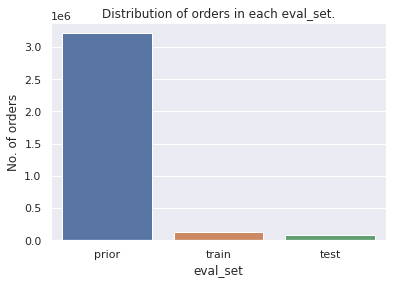

In [ ]:
sns.countplot(x='eval_set',data=orders)
plt.title('Distribution of orders in each eval_set.')
plt.ylabel('No. of orders');

**Coclusion:**
- Prior set has more than 3 million orders.
- Train set has more than 0.1 million orders.
- Eval set has less than 0.1 million orders

#### Q. How many users each set(train/test)?
- CountPlot of no. of users in train and test set.

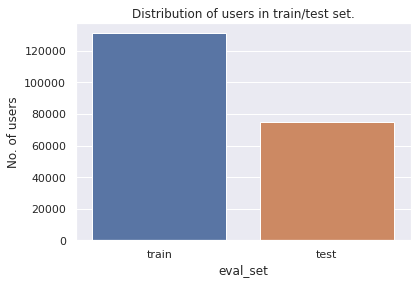

In [ ]:
sns.countplot(x='eval_set',data=orders.loc[~orders.eval_set.str.contains('prior'),:])
plt.title('Distribution of users in train/test set.')
plt.ylabel('No. of users');

**Conclusion:**
- Around 130K users belong to train set.
- Around 75K users belong to test set.

#### Q. How many percent of purchases are first purchase and how many are reorders?
- Piechart

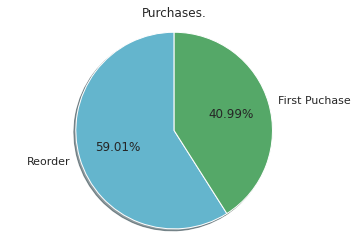

In [ ]:
labels = 'Reorder','First Puchase'

plt.pie(purchase_percent, labels=labels, colors=['c', 'g'],
        startangle=90,
        shadow=True,
        autopct = '%1.2f%%',)

plt.axis('equal')
plt.title('Purchases.');

**Conclusion:**
- There are more reorders than first purchases.

#### Q. How many users placed n number of orders?
- CountPlot of no. of users who place n number of orders.

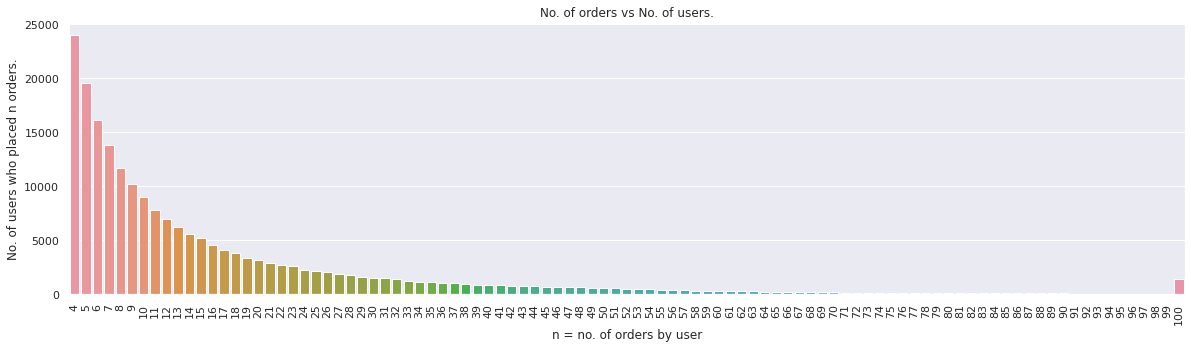

In [ ]:
num_of_orders_per_user = orders.groupby('user_id').size()\
                                .rename('#orders')\
                                .sort_values()\
                                .reset_index()
fig,ax = plt.subplots(figsize=(20,5))
sns.countplot(data=num_of_orders_per_user, x='#orders',ax=ax)
plt.title('No. of orders vs No. of users.')
plt.xlabel('n = no. of orders by user')
plt.ylabel('No. of users who placed n orders.')
plt.xticks(rotation=90);

**Analysis:**
- Each user has placed atleast 4 orders.
- Most users have placed 4-15 orders.
- As the number of orders increase the number of users sharply decrease. There are only a few users who have placed a lot of orders.
- There are some few hundred users who have placed 100 orders. 

> **Conclusion:**
- Each user places between 4-100 orders.
- There is a sharp decrease in number of users as no. of orders increase.

#### Q. How many orders have n number of products?
- CountPlot of number of orders with n number of products.

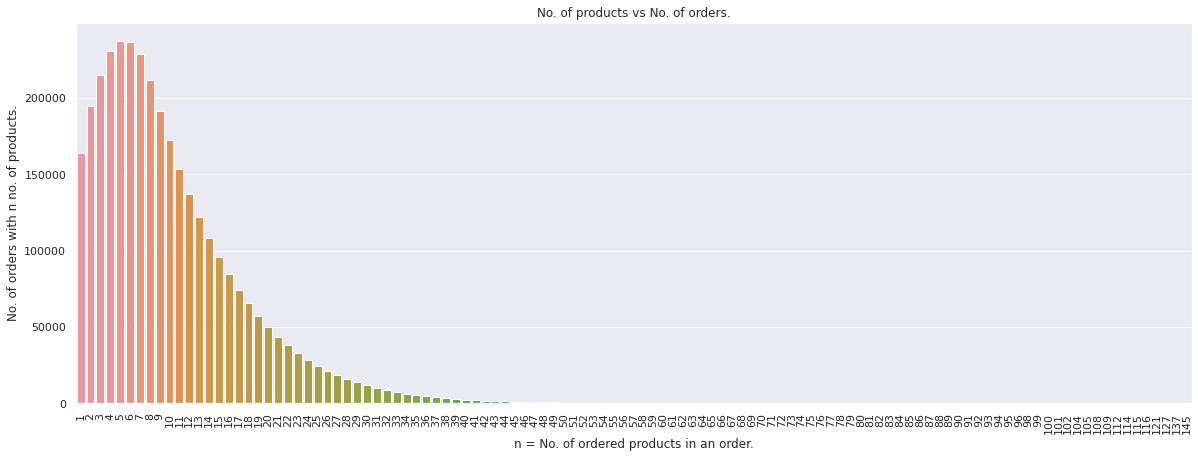

In [ ]:
num_of_prods_per_order = order_products.groupby('order_id').size()\
                                        .rename('#products')\
                                        .sort_values()\
                                        .reset_index()
fig,ax = plt.subplots(figsize=(20,7))
sns.countplot(data=num_of_prods_per_order, x='#products',ax=ax)
plt.title('No. of products vs No. of orders.')
plt.xlabel('n = No. of ordered products in an order.')
plt.ylabel('No. of orders with n no. of products.')
plt.xticks(rotation=90);

**Analysis:**
- An order can have between 1 to 145 products.
- As the number of products in an order increase more than 6 the number orders start decreasing.
- Most orders have 5-6 number of products.
- Orders usually have 1-11 number of products.
- There are almost negligible number of orders with more than 40 products.

> **Conclusion:**
- Customers usually tend to buy less than 20 products in an order.
- Most orders have 5-6 products.

#### Q. How many orders have n number of reordered products?
- Countplot of No. of orders with n no. of reordered products.

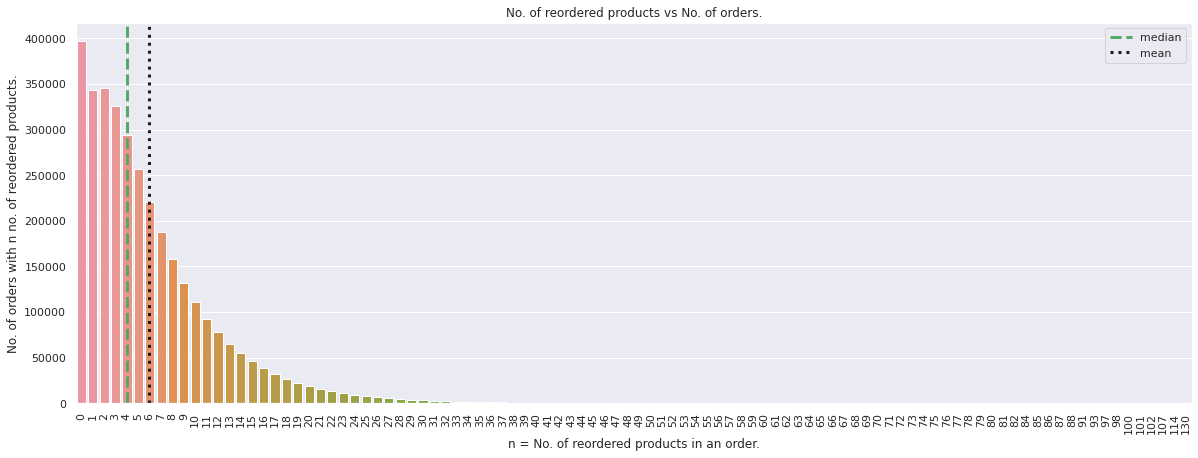

In [ ]:
num_of_reordered_prods_per_order = (
    order_products.groupby('order_id')['reordered'].sum()
                    .rename('#reordered_products')
                    .sort_values()
                    .reset_index()
    )
fig,ax = plt.subplots(figsize=(20,7))
sns.countplot(data=num_of_reordered_prods_per_order,x='#reordered_products',ax=ax,);
plt.axvline(num_of_reordered_prods_per_order['#reordered_products'].median(),ls='--',color='g',lw=3,label='median')
plt.axvline(num_of_reordered_prods_per_order['#reordered_products'].mean(),ls=':',color='k',lw=3,label='mean')
plt.title('No. of reordered products vs No. of orders.')
plt.xlabel('n = No. of reordered products in an order.')
plt.ylabel('No. of orders with n no. of reordered products.')
plt.legend()
plt.xticks(rotation=90);

**Analysis:**
- Since user's 1st order can't have reordered products. There are a lot of orders with zero number of reordered product.
- An order can have between 0-130 number of reordered products.
- As the no. of reordered products in an order increase the no. of orders decrease gradually.
- There are very few orders with more than 25 number of reordered products.
- Average no. of products reordered in an order is around 6.
- Median no. of products reordered in an order is 4.

> **Conclusion:**
- Most customers like to reorder 1-10 products in an order. 

#### Q. What was the distribution of probability of reorder in all orders?
- Histplot of probability of reorder over all orders.

In [ ]:
order_info = data.groupby('order_id')['reordered'].agg(['sum','count','mean'])
order_info.head(3)

sum  count      mean
order_id                      
1           4      8  0.500000
2           6      9  0.666667
3           8      8  1.000000

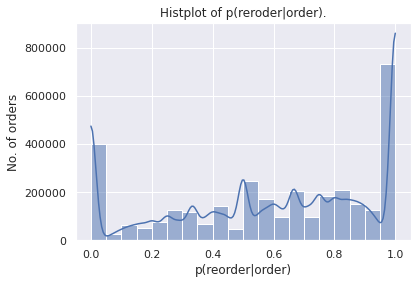

In [ ]:
sns.histplot(data=order_info, x='mean',kde=True,binwidth=0.05,)
plt.xlabel('p(reorder|order)')
plt.ylabel('No. of orders')
plt.title('Histplot of p(reroder|order).');

**Conclusion:**
- Most orders have either all reordered products or None reordered products.
- Lot of None reordered products because first order has 0 reordered products.
- More orders have probability of reorder more than 0.5.

#### Q. How many aisles each department has?
- BarPlot and treemap of distribution of aisles over departments.

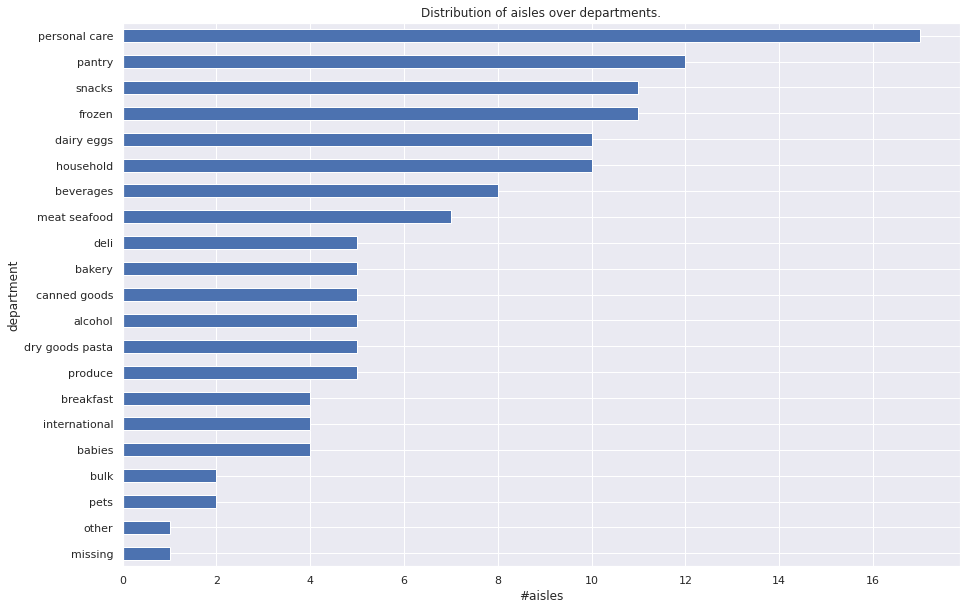

In [ ]:
dep_info = prod_info.drop_duplicates(['department_id','aisle_id'],ignore_index=True)
dep_info.groupby(['department'])['aisle_id'].count().sort_values().plot(kind='barh',
                                                                        figsize=(15,10),
                                                                        grid=True)
plt.xlabel('#aisles')
plt.title('Distribution of aisles over departments.')
plt.show()

In [ ]:
# https://plotly.com/python/treemaps/#
# https://plotly.com/python/reference/treemap/
# https://plotly.com/python-api-reference/generated/plotly.express.treemap
fig = px.treemap(dep_info,
                 path=['department','aisle'],
                 title='Treemap of aisles in each department.',)
fig.update_layout(
    autosize=False,
    width=1050,
    height=1000,)
fig.show()

In [ ]:
# collection of departments with eatable items
eatables_dep = {"pantry","snacks","frozen","dairy eggs","beverages","meat seafood",
                "deli","bakery","canned goods","alcohol","dry goods pasta",
                "produce","breakfast","international","bulk"}
print('These departments contain eatable products:')
print(eatables_dep,'\n')
count = len(dep_info.loc[dep_info.department.apply(lambda row: str(row) in eatables_dep),['department','aisle']])
print("No. of departments with eatable items are :",len(eatables_dep))
print(f"Percentage of departments with eatable items are : {len(eatables_dep)*100/21:.2f}%\n")
print("No. of aisles with eatable items are :",count)
print(f"Percentage of aisles with eatable items are : {count*100/134:.2f}%")

These departments contain eatable products:
{'bakery', 'international', 'deli', 'meat seafood', 'dairy eggs', 'canned goods', 'breakfast', 'frozen', 'produce', 'beverages', 'pantry', 'dry goods pasta', 'snacks', 'alcohol', 'bulk'} 

No. of departments with eatable items are : 15
Percentage of departments with eatable items are : 71.43%

No. of aisles with eatable items are : 99
Percentage of aisles with eatable items are : 73.88%


**Analysis:**
1. Personal care department has the most number of aisles i.e. 17.
2. Departments containing eatable products like pantry, snacks, frozen, dairy eggs, beverages, meat seafood, deli, bakery, canned goods, alcohol, dry goods pasta, produce, breakfast, international & bulk have a total of 99 aisles.
3. missing and other department have only 1 aisle each.

>**Conclusion:**
- Personal Care department has the most number of aisles.
- Eatable items together takes more than 70% of the total aisles and departments present.
- other & missing departments have only one aisle.




#### Q. What is the avg no. of reorders for eatable vs non-eatable products?
- Barplot of avg no. of reorders for eatable and non-eatable.

In [ ]:
# Adding eatables columns in prod_info
prod_info['eatable'] = prod_info.apply(lambda row: row['department'] in eatables_dep,axis=1).astype('uint8')

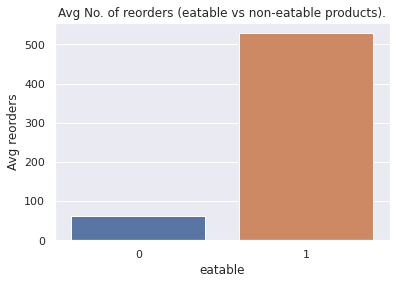

In [ ]:
eatable = order_products.merge(prod_info,on='product_id',how='right')[['product_id','eatable','reordered']]
eatable = eatable.groupby(['eatable','product_id'],as_index=False)['reordered'].sum()
eatable = eatable.groupby('eatable',as_index=False)['reordered'].mean()
sns.barplot(data = eatable, x='eatable',y='reordered',orient='v')
plt.title('Avg No. of reorders (eatable vs non-eatable products).')
plt.ylabel('Avg reorders');
# avg no of reorders in for eatable and non-eatable products.

**Conclusion:**
- Eatable products are far more reordered than non-eatable products.

#### Q. How many products each department has?
- BarPlot of distribution of products over departments.

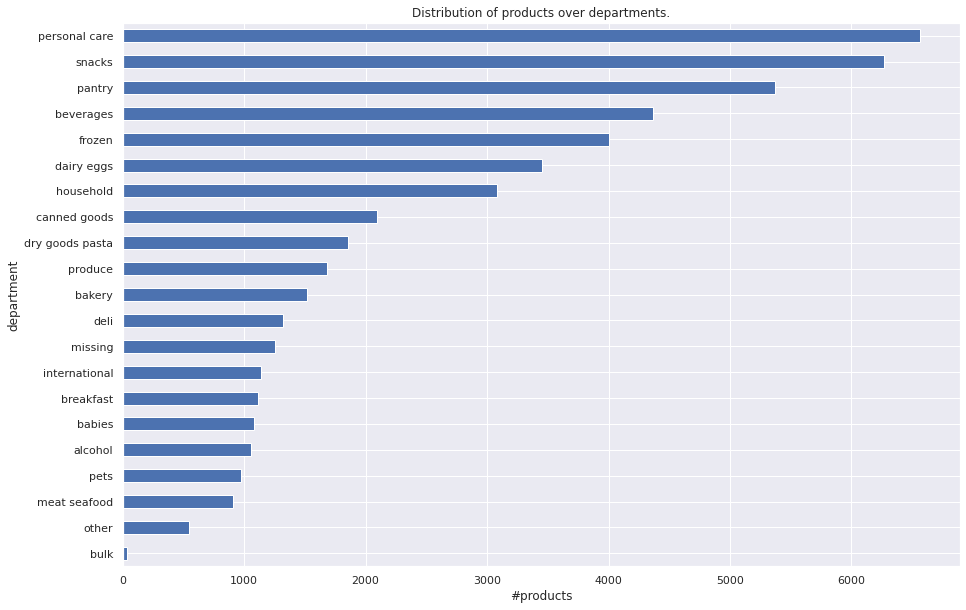

In [ ]:
num_of_prod_per_dep = prod_info.groupby(['department'])['product_id'].count()\
                                .rename('#products_present')

num_of_prod_per_dep.sort_values().plot(kind='barh',
                                        figsize=(15,10),
                                       grid=True)
plt.xlabel('#products')
plt.title('Distribution of products over departments.');

In [ ]:
print("%age of products in eatables department group:")
num_of_prod_per_dep.loc[list(eatables_dep)].sum()*100/num_of_prod_per_dep.sum()

%age of products in eatables department group:


72.81637417485108

**Analysis:**
1. Personal care, snacks, pantry, beverages & frozen departments have almost 27k type of products.
2. Most of the departments with eatable items have a very large variety of products.
2. "bulk" department has only approx 100 types of products.

>**Conclusion:**
- Top 25% of departments contain more than 50% of product variety.
- Eatables departments contain more than 72% types of products.
- bulk department has the least number of products.




#### Q. What is the average no. of reorders per department?
- BarPlot of Avg no. of reorders per department. 

$$ \text{#avg_reorders} = \frac{\sum \text{No. of reorders from the dep.}}{ \text{No. of distinct products in the department}}$$


In [ ]:
dep_info = order_products.merge(prod_info, on='product_id', how='right')\
                .groupby(['department_id','product_id'],as_index=False)\
                ['reordered'].sum()\
                .rename(columns={'reordered':'#reorders'})
dep_info = dep_info.groupby('department_id',as_index=False)\
                    .agg({'#reorders':'mean'})\
                    .rename(columns={'#reorders': '#avg_reorders'})
dep_info = dep.merge(dep_info,on='department_id')             

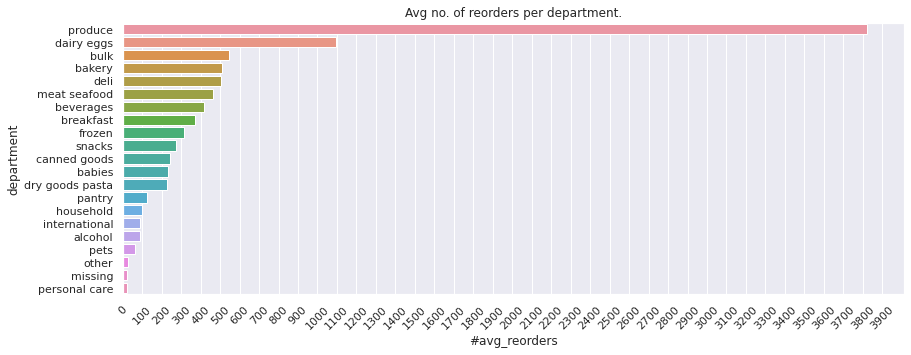

In [ ]:
fig,ax = plt.subplots(figsize=(14,5))
sns.barplot(data=dep_info.sort_values(['#avg_reorders'],ascending=False),
            x='#avg_reorders',
            y='department',
            ax=ax);
plt.xticks(np.arange(0,4000,100),rotation=45)
plt.title('Avg no. of reorders per department.');

**Analysis:**
- All departments with high avg no. of reorders belong to eatable group.
- Produce department alone has a very very high avg no. of reorders.
- Produce and dairy eggs departments combined have more avg no. of reorders than all other departments combined. This could be because Produce and dairy eggs departments contain daily needs products.
- Personal care, other and missing departments have very low avg no. of reorders.

**Conclusion:**
- Produce department's products are highly reordered.
- Personal Care, missing & other departments' products are not reordered much.

#### Q. What is the  probability of reorder of each department?
- BarPlot of p(reorder|department) over each departmnent.

$$\text{p(reorder|department)} = \frac{\text{#reorders from the dep.}}{\text{#purchases from the dep.}} $$

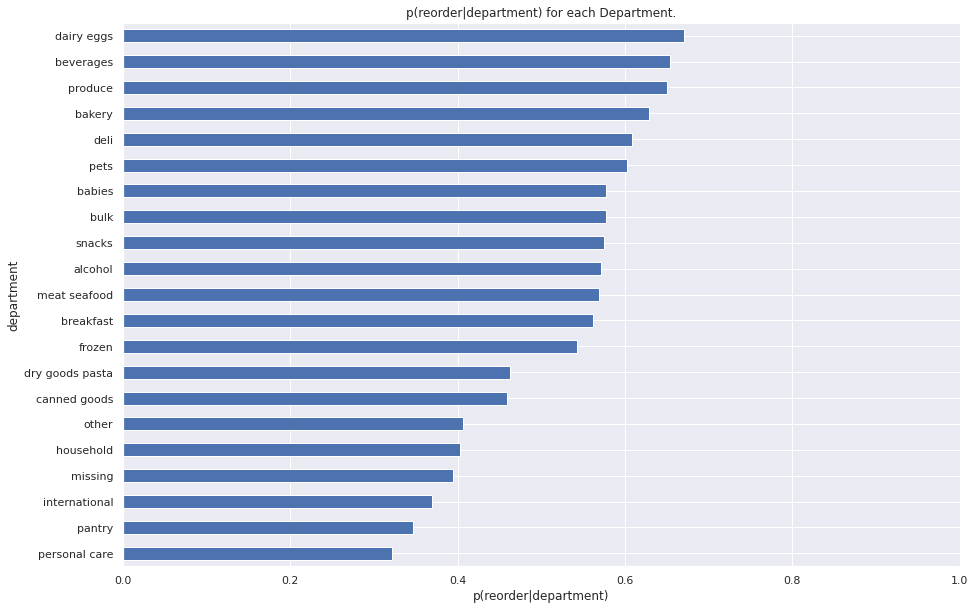

In [ ]:
order_products.merge(prod_info,on='product_id')\
                .groupby(['department'])['reordered'].mean()\
                .sort_values()\
                .plot(kind='barh',
                      figsize=(15,10),
                      grid=True,);
plt.xlabel('p(reorder|department)')
plt.title('p(reorder|department) for each Department.')
plt.xlim(0,1);

**Analysis:**
- All the top departments belong the eatables group.
- Among all "dairy eggs" department has the highest probability of reorder.
- Diary eggs, beverages and produce department are among the top in both sales numbers and probability of reorder.
- Departments having probability of reorder less than 0.5 are disliked by customers because the #reordered products sold is less than #not_reordered products sold.
- canned goods, dry goods pasta, household, international, pantry, Personal care, missing and other departments are disliked by customers.
- Personal care department has a very large variety of products but probability of reorder of this department is very low.

> **Conclusion:**
- Products of dairy eggs, beverages and produce department are very likely to be reordered.
- Products of other, household, missing, international, pantry and Personal care department are very less likely to be reordered.


#### Q. How many products each aisle has?
- Treemap of distribution of products in each aisle.

In [ ]:
fig = px.treemap(prod_info, 
                 path=['department','aisle'],
                 title='Number of products in each (Department, Aisle).')
fig.update_layout(autosize=False,
                width=1050,
                height=1000,)
fig.show();

**Analysis:**
- Some aisle contain more than 1k type of products and some aisle contain only around 50 type of products.
- missing and candy chocolate aisle have the most number of products.
-  packaged produce aisle in produce department has the least number of products
- Almost each department has atleast one aisle which contains more than 500 products.

> **Conclusion:**
- Number of products in each aisle differ a lot.

#### Q. How many products were sold per aisle?
- Treemap of number of products purchased per aisle.

In [ ]:
fig = px.treemap(order_products.merge(prod_info,on='product_id'),
                 path=['department','aisle','reordered'], 
                 title='Number of products sold per (Department, Aisle)')
# changing labels
fig.data[0].labels[fig.data[0].labels=='0']='first_purchase'
fig.data[0].labels[fig.data[0].labels=='1']='reorder'
# resizing figure
fig.update_layout(autosize=False,
                width=1050,
                height=1000,)
fig.show()

**Analysis:**
- Products of almost all aisles have been reordered more than they have been first purchased.
- Fruits, vegetable, eggs and dairy products containing aisles are the bestsellers.
- Pets, missing, other and bulk aisles are the least selling aisles.
- Personal care department sells very less despite having a lot of products, compared to other departments.

> **Conclusion:**
- Natural daily use products like fruits, vegetables, eggs and dairy products are clearly the most popular.
- personal care products are the least popular.




#### Q. What is the average no. of reorders per aisle?
- BarPlot of Avg no. of reorders per aisle. 

$$ \text{#avg_reorders} = \frac{\sum \text{No. of reorders from the aisle}}{ \text{No. of distinct products in the aisle}}$$

In [ ]:
aisle_info = order_products.merge(prod_info, on='product_id', how='right')\
                .groupby(['aisle_id','product_id'],as_index=False)\
                ['reordered'].sum()\
                .rename(columns={'reordered':'#reorders'})
aisle_info = aisle_info.groupby('aisle_id',as_index=False)\
                    .agg({'#reorders':'mean'})\
                    .rename(columns={'#reorders': '#avg_reorders'})
aisle_info = aisles.merge(aisle_info,on='aisle_id')             

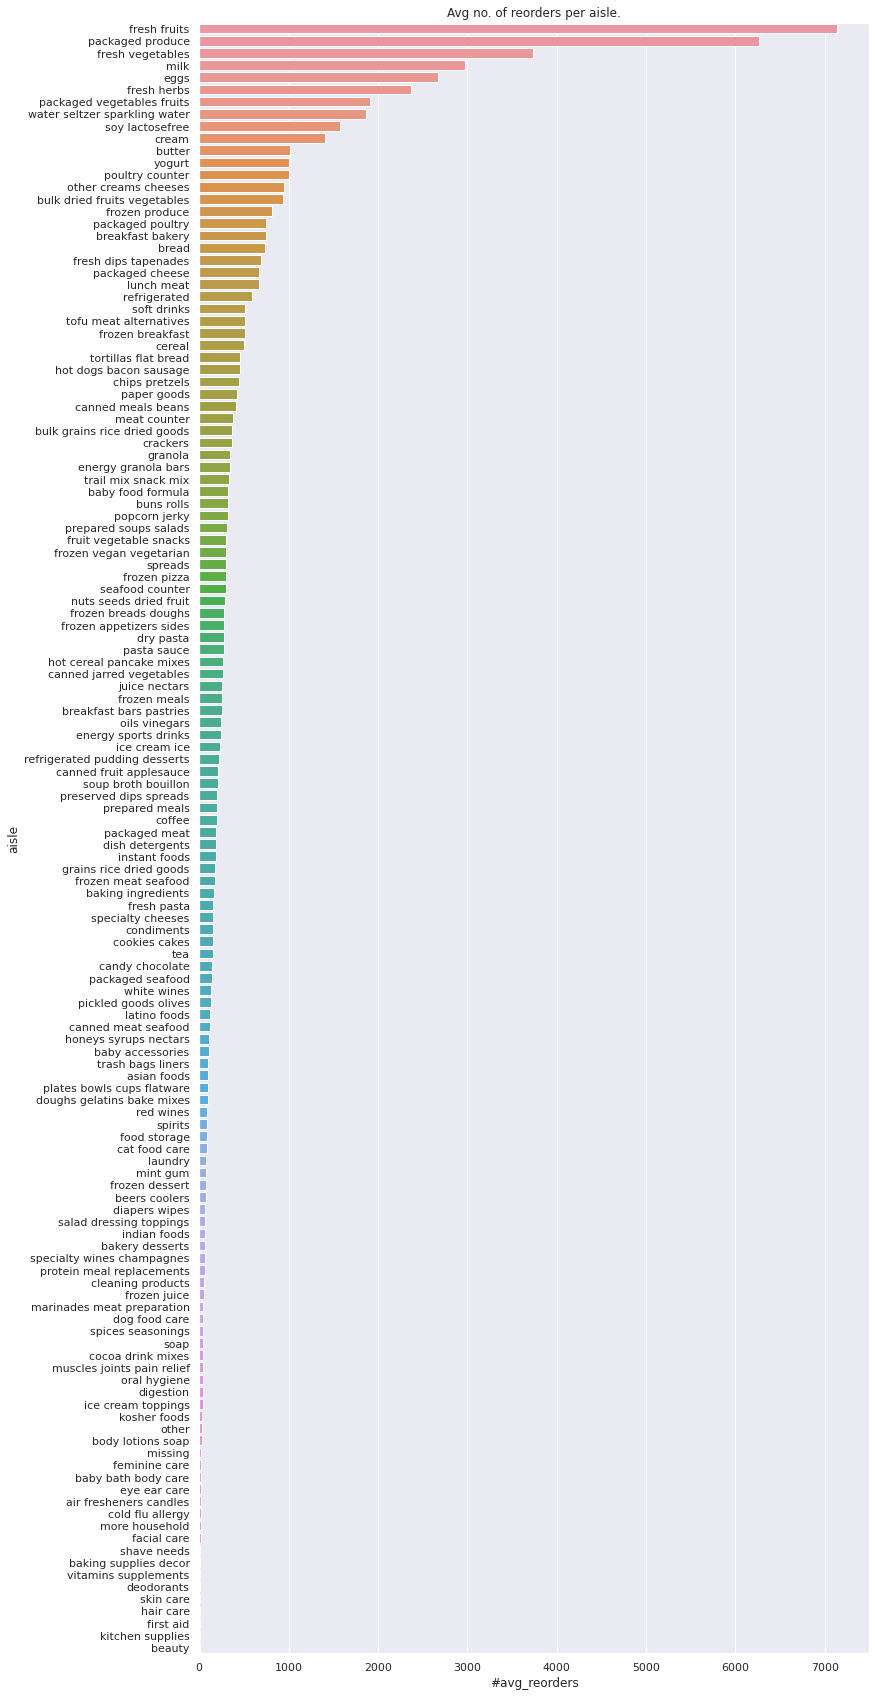

In [ ]:
fig,ax = plt.subplots(figsize=(12,30))
sns.barplot(data=aisle_info.sort_values(['#avg_reorders'],ascending=False),
            x='#avg_reorders',
            y='aisle',
            ax=ax);
#plt.xticks(np.arange(0,4000,100),rotation=45)
plt.title('Avg no. of reorders per aisle.');

**Conclusion:**
- Again the aisles containing the daily needs eatable products have a very high avg no. of reorders than personal care and other type of products.

#### Q. What is the probability of reorder of each aisle?
- BarPlot of p(reorder|aisle) for each aisle.

$$\text{p(reorder|aisle)} = \frac{\text{#reorders from the aisle}}{\text{#purchases from the aisle}} $$

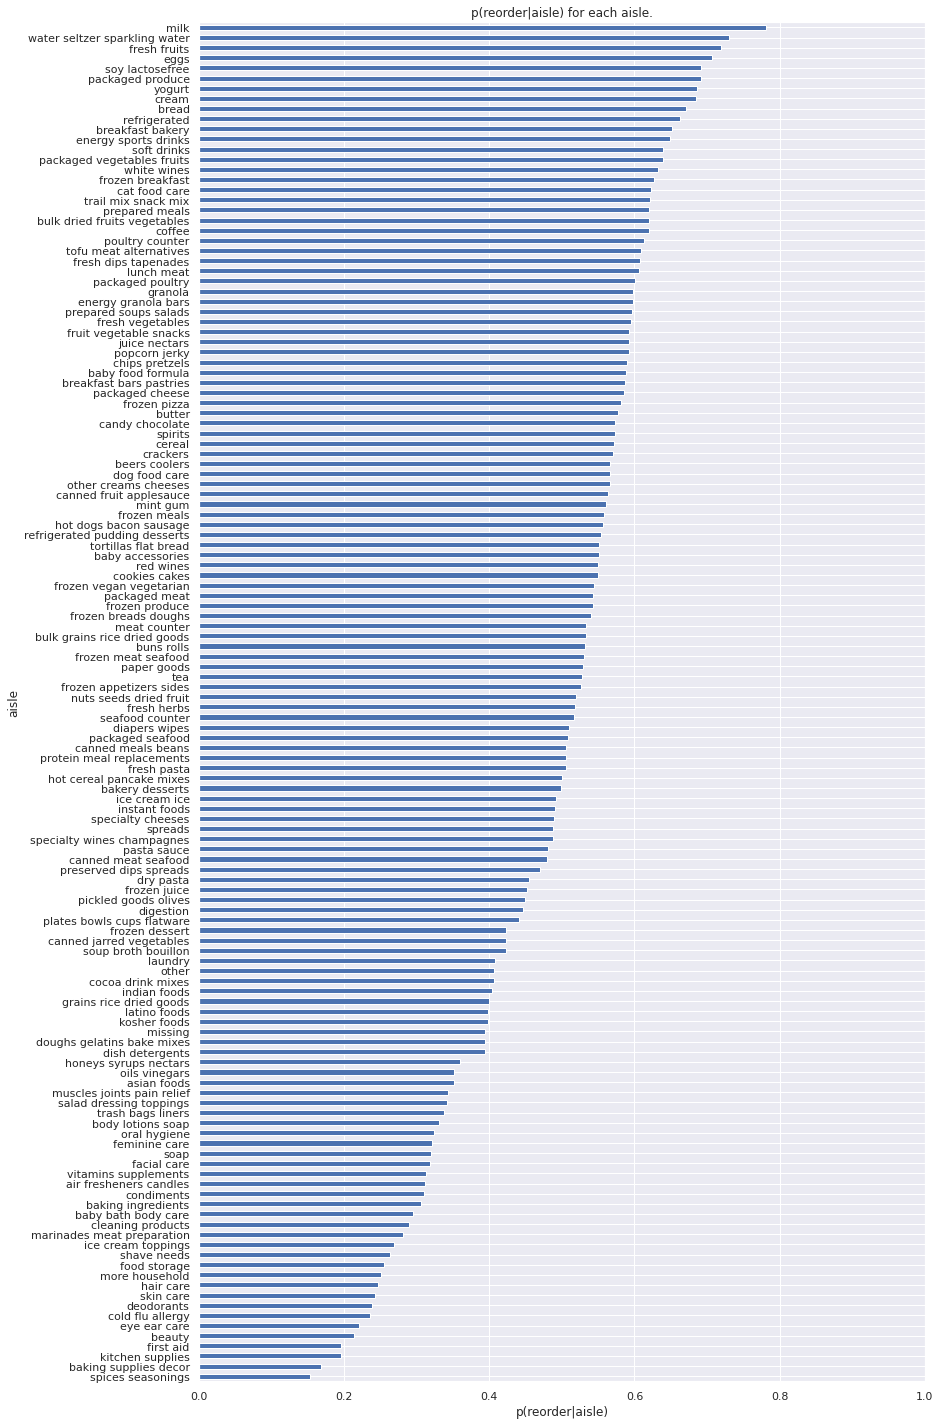

In [ ]:
order_products.merge(prod_info,on='product_id')\
                .groupby(['aisle'])['reordered'].mean()\
                .sort_values()\
                .plot(kind='barh',
                      figsize=(13,25),
                      grid=True,);
plt.xlabel('p(reorder|aisle)')
plt.title('p(reorder|aisle) for each aisle.')
plt.xlim(0,1);

**Analysis:**
- Dairy products containing aisles like milk, eggs, yogurt etc. have a very high probability of reorder.
- water seltzer sparkling water aisle also has a very high prob of rerorder.
- Again personal care aisles are at the bottom.
- The probability of reorder lies roughly in the range of 0.17 - 0.78

**Conclusion:**
- Dairy products containing aisles have very high probability of reorder.

#### Q. How many orders were placed over each day of week?
- CountPlot of number of orders over each order_dow(day of week).

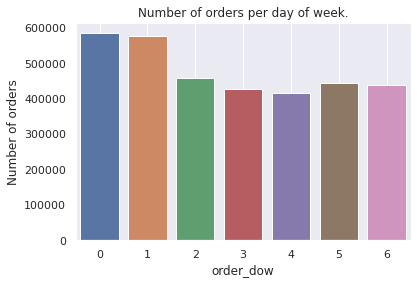

In [ ]:
sns.countplot(x='order_dow',data=orders.loc[orders.eval_set.astype(str)!='test',:])
plt.title('Number of orders per day of week.')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

**Analysis:**
- There are a lot more number of orders on day 0 and 1 than on other days.
- After Day 1 the number of orders keep decreasing till day 4 and then it rises.

> **Conclusion:**
- Day 0 and 1 of week are the most popular of purchasing.

#### Q. How many products are sold over each day of week?
- CountPlot of no. of Products sold over each order_dow.

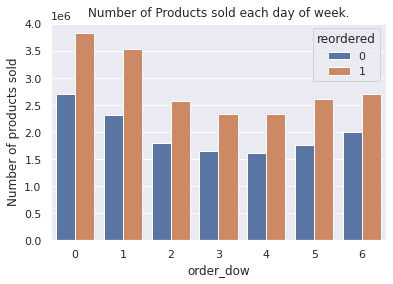

In [ ]:
sns.countplot(x='order_dow',hue='reordered',data=data)
plt.ylabel('Number of products sold')
plt.title('Number of Products sold each day of week.');

**Analysis:**
- Most number of products are ordered and reordered on Day 0.
- After Day 0 the number of products sold keep decreasing till day 3-4 and then it increases.
- The number of products reordered are always more than the the number of products not reordered, on a given day.

**Conclusion:**
- The number of reorders clearly changes with day of week, with the first two days being most popular for purchasing products.


#### Q. What is the probability of reorder on each day of week?

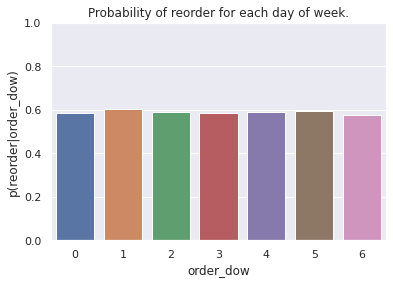

In [ ]:
sns.barplot(x='order_dow',y='reordered',data=data, estimator=np.mean, orient='v')
plt.ylabel('p(reorder|order_dow)')
plt.title('Probability of reorder for each day of week.')
plt.ylim(0,1);

**Conclusion:**
- The probability of reorder remains more or less the same on all days.

#### Q. How many products are sold each hour of day?
- CountPlot of Number of products sold each hour of day.

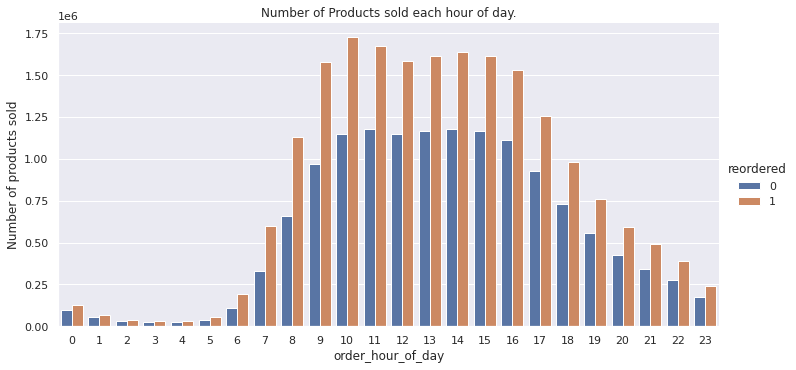

In [ ]:
sns.catplot(x='order_hour_of_day',hue='reordered',data=data,kind='count',aspect=2)
plt.ylabel('Number of products sold')
plt.title('Number of Products sold each hour of day.');

**Analysis:**
- The number of products ordered during the first six hours(0-5) of a day is very low.
- After that, from the 6th hour the number of products ordered kept increasing till the 10th hour.
- After the 10th hour there is a little decrease in sales but more or less it stays the same till the 16th hour.
- After the 16th hour there is sudden decrease in the number of prouduts ordered. And, it keep decreasing till the last 23rd hour.
- Looking at the pattern, it looks like 0-5 is after midnight time, 6-11 is morining time, 12-17 is afternoon time and 18-23 is night time.

> **Conclusion:**
- The number of reorders clearly changes with time of day.
- morning and afternoon are the most suitable times for customer orders.


#### Q. What is the probability of reorder at each hour of day?

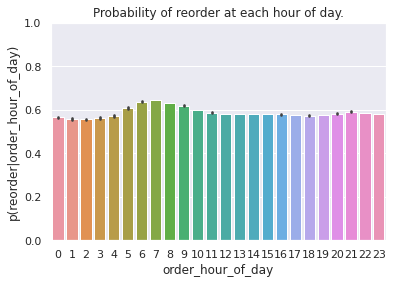

In [ ]:
sns.barplot(x='order_hour_of_day',
            y='reordered',
            data=data,
            estimator=np.mean,
            orient='v')
plt.ylabel('p(reorder|order_hour_of_day)')
plt.title('Probability of reorder at each hour of day.')
plt.ylim(0,1);

**Conclusion:**
- The probability of reorder remains same whole day, except in the morning(5-11) when the probability is high.

#### Q. How many products are reordered on each day of week and at each hour of day?
- Heatmap of no. of reorders at each hour_of_day of each dow.

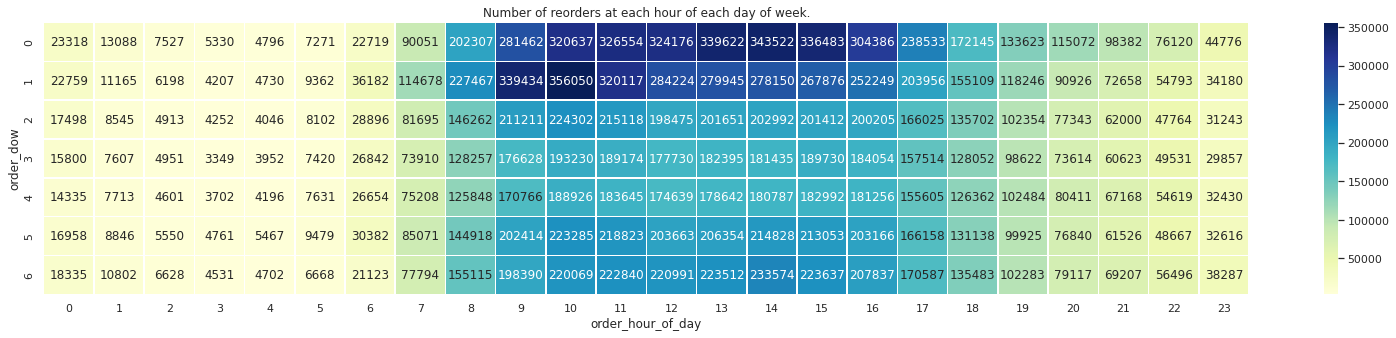

In [ ]:
no_of_reorders_at_time = data.pivot_table(values='reordered',
                                          index='order_dow',
                                          columns='order_hour_of_day',
                                          aggfunc=sum)\
                                          .astype('int64')
fig, ax = plt.subplots(figsize=(27,5))
sns.heatmap(no_of_reorders_at_time,annot=True,fmt='d',linewidth=.5,cmap="YlGnBu",ax=ax)
plt.title('Number of reorders at each hour of each day of week.');

**Analysis:**
- Customers love to reorder on day 0 & 1 of week between the 8th and 17th hour of day.
- After that, the 2nd most popular slot is on day 2-6 of week between the 8th and 17th hour of day.
- There are very few reorders on each day between the 2nd and 5th hour.

> **Conclusion:**
- Number 1 slot for reordering products is on day 0-1 of week between 8th and 17th hour of day.

#### Q. Which are the popular products, departments and aisle at each instant of time?

In [ ]:
def popular_pda(df,dep_info,aisle_info):
    ''' Returns Series containing product, department
    and aisle which are the most popular.'''
    # popular product
    prod = df.groupby('product_name')['reordered'].sum().idxmax()

    # popular department
    dept = df.groupby('department')['reordered'].sum()
    dept = dep_info.merge(dept,left_index=True,right_index=True)
    dept['#reorders'] = dept['reordered']/dep_info['#products']
    pop_dep = dept['#reorders'].idxmax()
    
    # popular aisle
    aisle = df.groupby('aisle')['reordered'].sum()
    aisle = aisle_info.merge(aisle,left_index=True,right_index=True)
    aisle['#reorders'] = aisle['reordered']/aisle_info['#products']
    pop_aisle = aisle['#reorders'].idxmax()

    # output
    out = pd.Series(data=[prod,pop_dep,pop_aisle],
                    index=['popular_product','popular_dep','popular_aisle'])
    return out

In [ ]:
aisle_info = prod_info.groupby('aisle')['product_id'].count().to_frame('#products')
dep_info = prod_info.groupby('department')['product_id'].count().to_frame('#products')
pop = data.merge(prod_info,on='product_id')\
        .groupby(['order_dow','order_hour_of_day'],as_index=False)\
        [['product_name','department','aisle','reordered']]\
        .apply(popular_pda,dep_info,aisle_info)

In [ ]:
pop = pop.pivot(index='order_dow',columns='order_hour_of_day')

In [ ]:
# popular product at each instant of time
pop['popular_product']

order_hour_of_day                     0   ...                     23
order_dow                                 ...                       
0                                 Banana  ...                 Banana
1                  Bag of Organic Banana  ...                 Banana
2                  Bag of Organic Banana  ...                 Banana
3                                 Banana  ...  Bag of Organic Banana
4                                 Banana  ...                 Banana
5                                 Banana  ...                 Banana
6                                 Banana  ...                 Banana

[7 rows x 24 columns]

In [ ]:
# popular department at each instant of time
pop['popular_dep']

order_hour_of_day       0        1        2   ...       21       22       23
order_dow                                     ...                           
0                  produce  produce  produce  ...  produce  produce  produce
1                  produce  produce  produce  ...  produce  produce  produce
2                  produce  produce  produce  ...  produce  produce  produce
3                  produce  produce  produce  ...  produce  produce  produce
4                  produce  produce  produce  ...  produce  produce  produce
5                  produce  produce  produce  ...  produce  produce  produce
6                  produce  produce  produce  ...  produce  produce  produce

[7 rows x 24 columns]

In [ ]:
# popular aisle at each instant of time
pop['popular_aisle']

order_hour_of_day                0   ...                23
order_dow                            ...                  
0                      fresh fruits  ...  packaged produce
1                      fresh fruits  ...      fresh fruits
2                  packaged produce  ...  packaged produce
3                  packaged produce  ...  packaged produce
4                  packaged produce  ...  packaged produce
5                  packaged produce  ...      fresh fruits
6                      fresh fruits  ...      fresh fruits

[7 rows x 24 columns]

**Conclusion:**
- Bananas are very much popular at each instant of time.
- During midnight people prefer to Bag of Bananas.
- Produce department is very much popular at each instant of time.
- On day 0 and day 6, fresh fruits aisle is very popular.
- At 14-20 hrs, fresh fruits aisle is very much popular.
- Remaining time, packaged produce is very famous.

#### Q. How many products are sold after a gap of certain number of days in customer's order?
- CountPlot of no. of products ordered for day_since_prior_order.

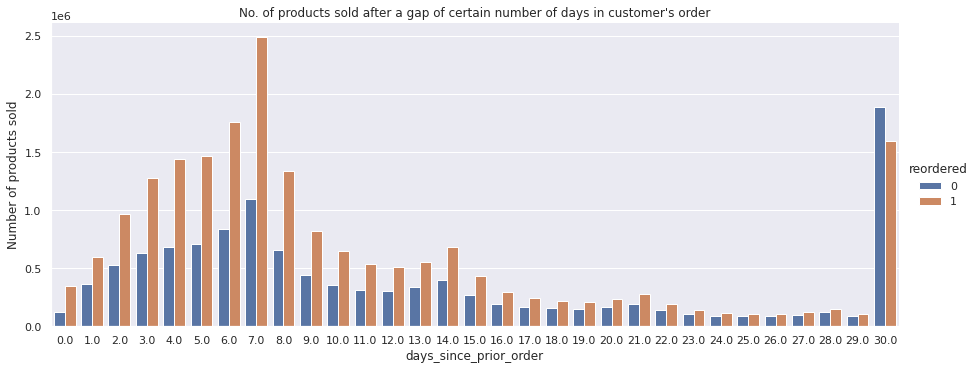

In [ ]:
sns.catplot(x='days_since_prior_order',hue='reordered',data=data,kind='count',aspect=2.5)
plt.ylabel('Number of products sold')
plt.title("No. of products sold after a gap of certain number of days in customer's order");

**Analysis:**
- When customers come the same day again, they tend to buy reordered products a lot more than not reordered products.
- Most customers love to come again on a weekly basis(weekly customers).
- The customers who come again on a weekly basis reorder more than double, than buying the new products for the first time.
- There is a sudden decrease in the number of products sold for customers who come after a gap of 8-13 days. But after a gap of 14 days sales increase. This means there are some customers who love to come after 2 weeks(bi-weekly customers).
- Similarly there are some customers who prefer shopping after 3 weeks(tri-weekly customers).
- There are a lot of customers who love to come on a monthly basis(monthly customers) and they buy new products more.

> **Conclusion:**
- Products sold for customers who come after 0 to 15 day are mostly reorders.
- Customer who come after every week reorder a lot.
- Customers try new products more on mothly basis.


#### Q. What is the probability of reorder for days_since_prior_order?
- BarPlot of probability of reorder for each days_since_prior_order.

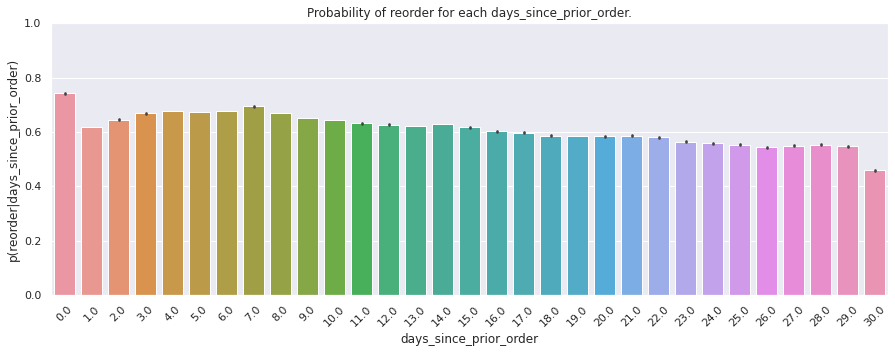

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='days_since_prior_order',
            y='reordered',
            data=data,
            estimator=np.mean,
            orient='v',
            ax=ax)
plt.ylabel('p(reorder|days_since_prior_order)')
plt.title('Probability of reorder for each days_since_prior_order.')
plt.xticks(rotation=45)
plt.ylim(0,1,);

**Analysis:**
- As days since prior order gets more than 7, then customers tend to reorder less in comparison to buying new products.
- When customers come the same day again, they reorder a lot.
- When customers come one month later, they reorder less.

**Conclusion:**
- 

#### Exploring weekly and monthly customers.

In [ ]:
user_train = orders.loc[orders['eval_set'].str.contains('train'), ['user_id']]
user_train = orders.merge(user_train, on='user_id').groupby('user_id')\
                    ['days_since_prior_order'].agg(['mean'])\
                    .reset_index()

# weekly customer: customers whose avg days_since_prior_order is between 6-8
weekly_user = user_train.loc[user_train['mean'].between(6,8),['user_id']]

# monthly customer: customers whose avg days_since_prior_order is between 28-30
monthly_user = user_train.loc[(user_train['mean'].between(28,30)), ['user_id']]
del user_train

##### Count of each type of customer.

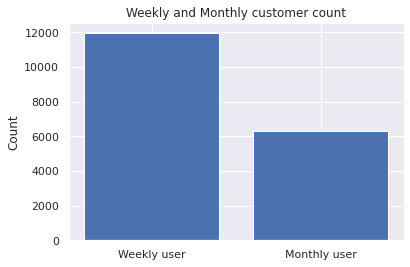

In [ ]:
plt.bar(['Weekly user','Monthly user'],[len(weekly_user),len(monthly_user)])
plt.ylabel('Count')
plt.title('Weekly and Monthly customer count');

**Analysis:**
- No. of weekly customers are almost double the no. of monthly customers.

##### How many purchases are made by both type of customers at each hour_of_day?
- CountPlot of purchases at each hour_of_day.

In [ ]:
weekly_user = data[['user_id','order_hour_of_day','order_dow','product_id','reordered']]\
                    .merge(weekly_user, on='user_id')
monthly_user = data[['user_id','order_hour_of_day','order_dow','product_id','reordered']]\
                    .merge(monthly_user, on='user_id')

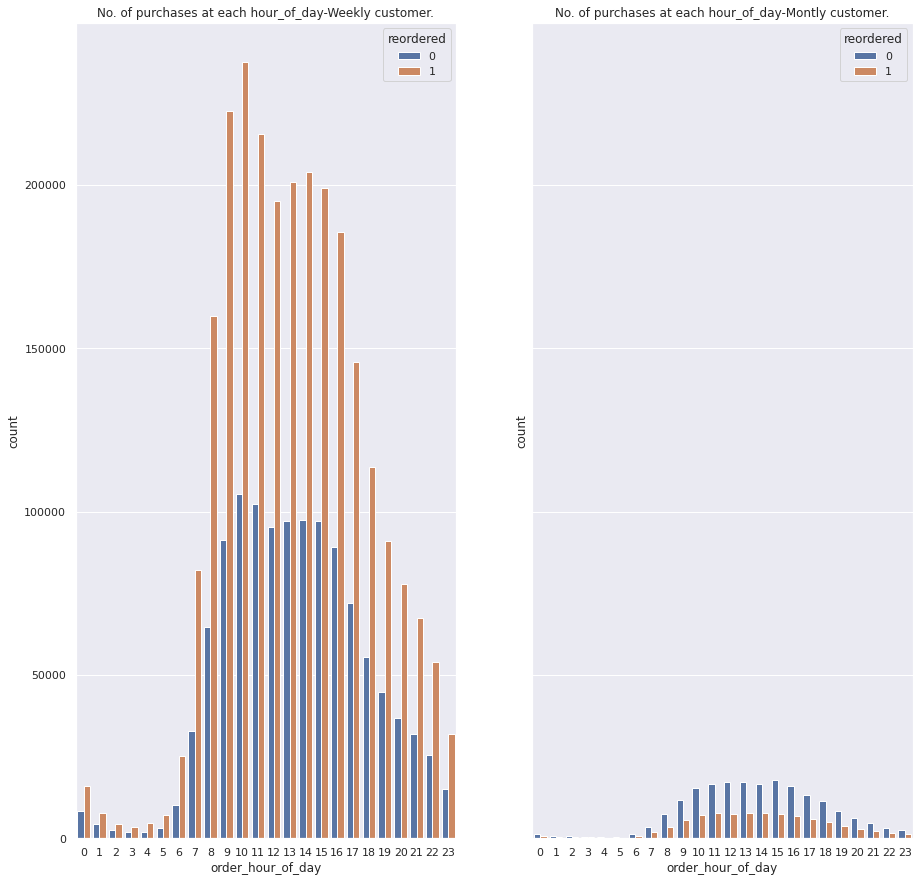

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,15),sharey=True)
sns.countplot(data=weekly_user,x='order_hour_of_day', hue='reordered',ax=ax1);
sns.countplot(data=monthly_user,x='order_hour_of_day', hue='reordered',ax=ax2);
ax1.set_title('No. of purchases at each hour_of_day-Weekly customer.')
ax2.set_title('No. of purchases at each hour_of_day-Montly customer.');

**Analysis:**
- The no. of purchases by weekly customers are significantly more than that of the monthly customers.
- Weekly customers reorder more than buying new product.
- Monthly customers reorder less and buy new products more.
- The pattern of the graph is almost same for both type of customers i.e. both purchase very less after midnight, then the purchase increases in the morning and then it decreases at night.

##### What is the probability of reorder of both customers at each hour_of_day?
- BarPlot of probability of reorder at each hour of day.

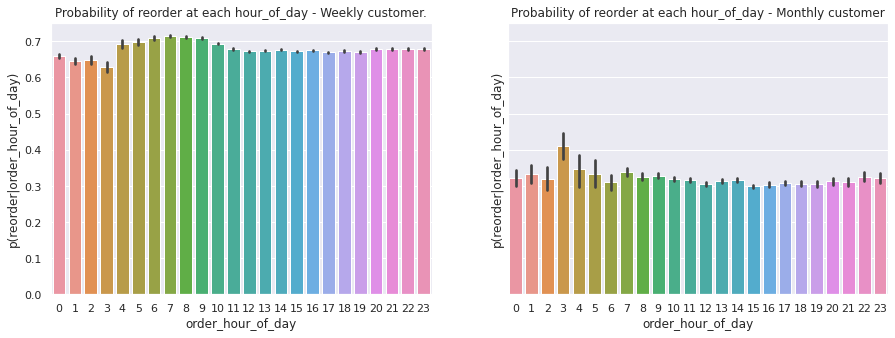

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5),sharey=True)
sns.barplot(data=weekly_user, x='order_hour_of_day',y='reordered',ax=ax1)
sns.barplot(data=monthly_user, x='order_hour_of_day',y='reordered',ax=ax2)
ax1.set_ylabel('p(reorder|order_hour_of_day)')
ax2.set_ylabel('p(reorder|order_hour_of_day)');
ax1.set_title('Probability of reorder at each hour_of_day - Weekly customer.')
ax2.set_title('Probability of reorder at each hour_of_day - Monthly customer');

**Analysis:**
- Probability of reorder of weekly customers is significantly larger than that of monthly customer.

##### How many purchases are made by both type of customers at each day_of_week?
- CountPlot of no. of purchases at each day_of_week.

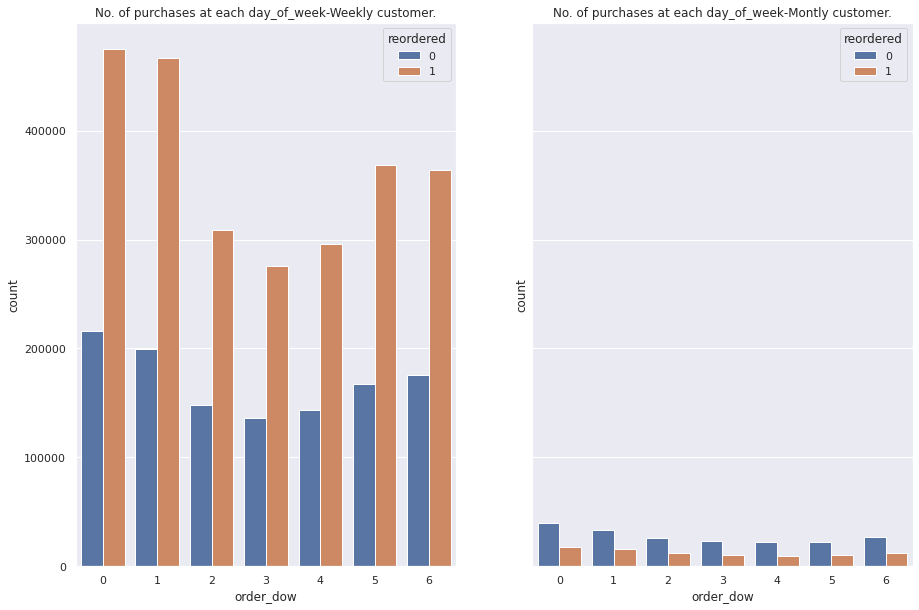

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,10),sharey=True)
sns.countplot(data=weekly_user,x='order_dow', hue='reordered',ax=ax1);
sns.countplot(data=monthly_user,x='order_dow', hue='reordered',ax=ax2);
ax1.set_title('No. of purchases at each day_of_week-Weekly customer.')
ax2.set_title('No. of purchases at each day_of_week-Montly customer.');

**Analysis:**
- Here again the pattern of both graphs is same i.e. both purchase more at the start of the week and then it decreases mid-week and again increases during weekend.

##### What is the probability of reorder of both customers at each day_of_week?
- BarPlot of probability of reorder at day_of_week.

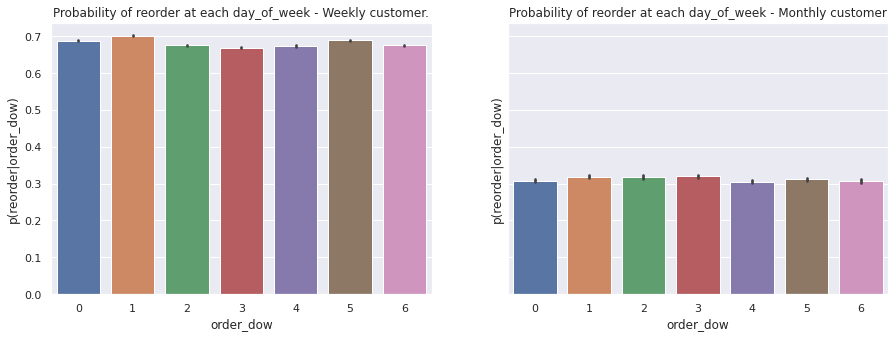

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5),sharey=True)
sns.barplot(data=weekly_user, x='order_dow',y='reordered',ax=ax1)
sns.barplot(data=monthly_user, x='order_dow',y='reordered',ax=ax2);
ax1.set_ylabel('p(reorder|order_dow)')
ax2.set_ylabel('p(reorder|order_dow)');
ax1.set_title('Probability of reorder at each day_of_week - Weekly customer.')
ax2.set_title('Probability of reorder at each day_of_week - Monthly customer');

**Analysis:**
- Here also the probability of reorder at each day_of_week is significantly larger for weekly customers.
- The probability for both type of customers remain more or less the constant at each day_of_week.

**Conclusion:**
- More monthly customers than weekly customers.
- Weekly customers purchase a lot more than the monthly customers.
- Weekly customers reorder more and monthly customers purchase new products more.

#### Q. How many products are sold in customer's nth order?
- CountPlot of number of products sold for each order_number

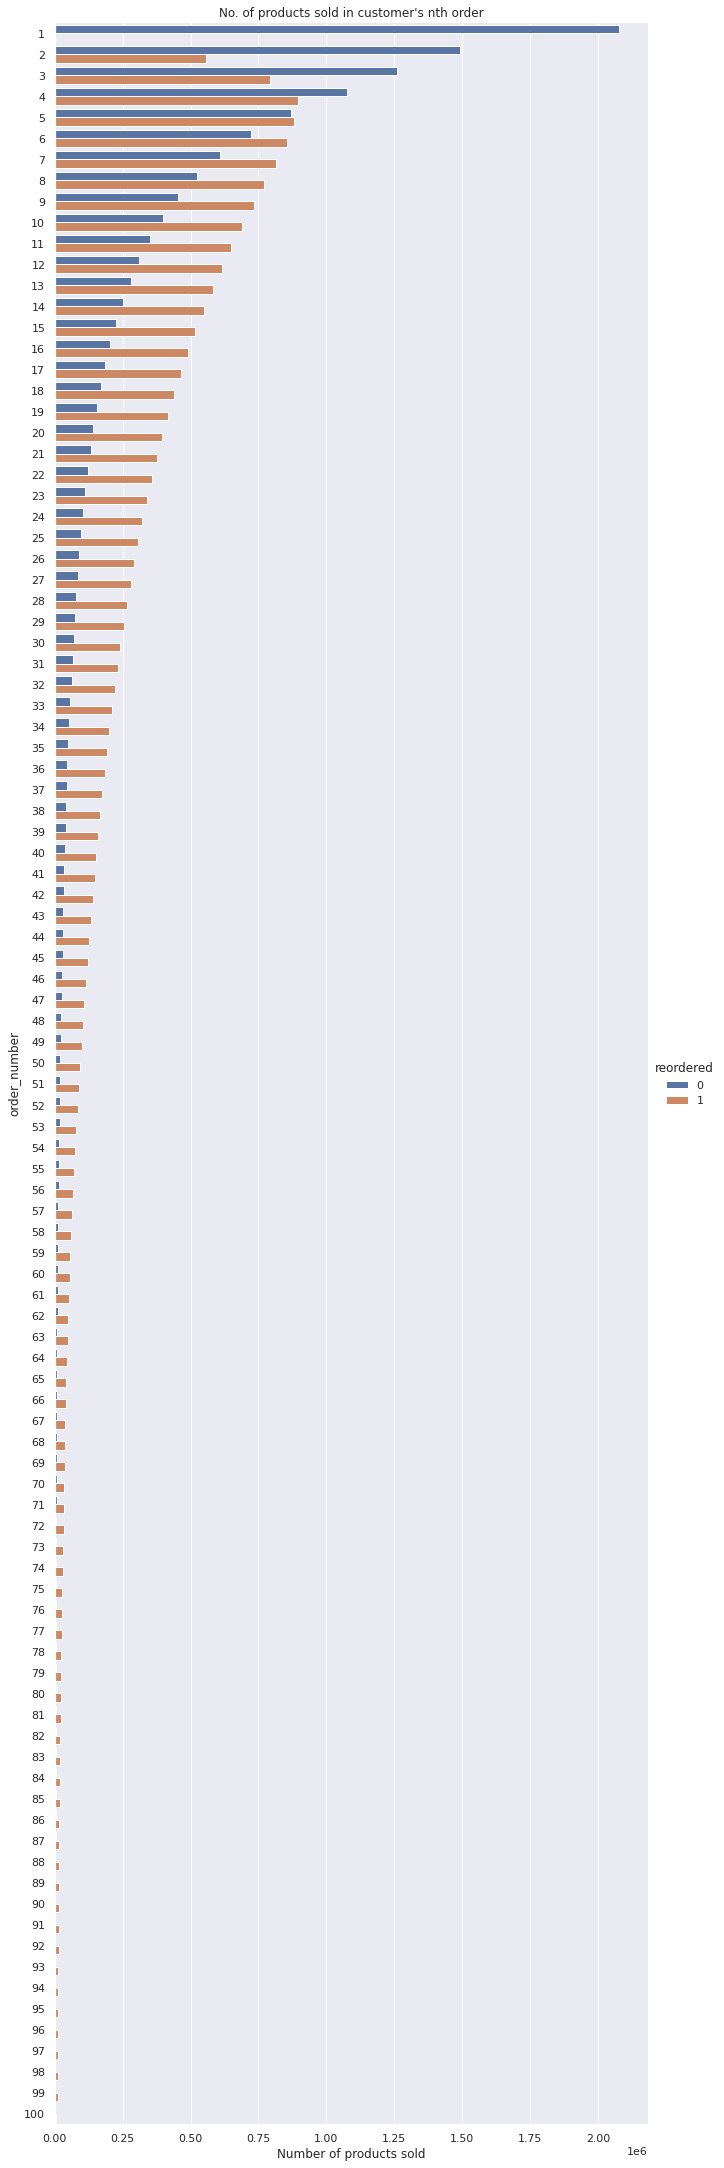

In [ ]:
sns.catplot(y='order_number',hue='reordered',data=data,kind='count',height=30,aspect=0.3)
plt.xlabel('Number of products sold')
plt.title("No. of products sold in customer's nth order");

**Analysis:**
- Number of products ordered decreases as the order_number increases. This is quite obvious as new and new customers join they place their first initial orders hence leading to more product sales for initial order numbers.

> **Conclusion:**
- No. of reordered products decreases with the increase in order number.

#### Q. What is the average no. of reordered products in a order for each order_number? 
- Barplot of avg no. of reorders for each order_number.
$$\text{#avg_reorders} = \frac{\text{#reorders for a order_number}}{\text{#order_ids for that order_number}} $$

In [ ]:
order_no_vs_reorder = data.groupby(['order_id','order_number'],
                                as_index=False)\
                                ['reordered'].sum()\
                                .rename(columns={'reordered':'#reorders'})
order_no_vs_reorder = order_no_vs_reorder.groupby('order_number',as_index=False)\
                                    ['#reorders'].mean()\
                                    .rename(columns={'#reorders':'#avg_reorders'})

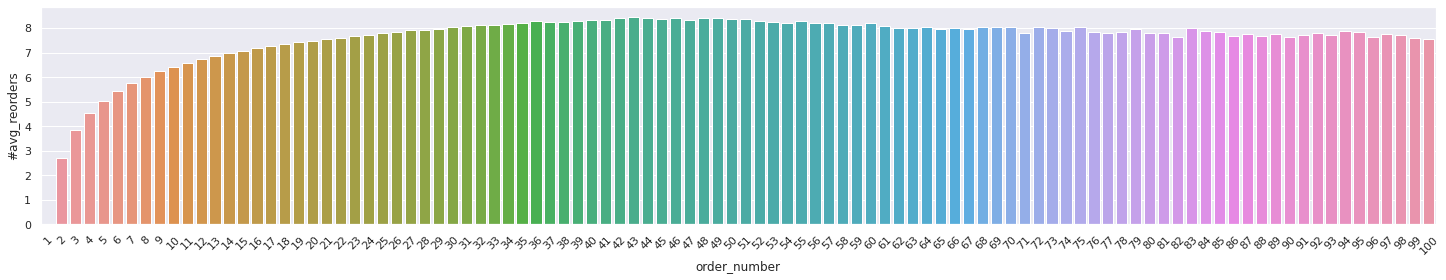

In [ ]:
fig,ax = plt.subplots(figsize=(25,4))
sns.barplot(data=order_no_vs_reorder,x='order_number',y='#avg_reorders',orient='v',ax=ax)
plt.title('Average no. of reorders per order_number.')
plt.xticks(rotation=45);

**Analysis:**
- Obviously, for order_number=1 there is are no reorders.
- The #avg_reorders keep increasing till order_number 43 and then it decreases very slowly.

**Conclusion:**
- The #avg_reorders is very low in the first few orders, then it increases sharply and then it saturates and then it again falls very slowly.

#### Q. What is the probability of reorder for each order_number?
- BarPlot of probability of reorder for each order_number.

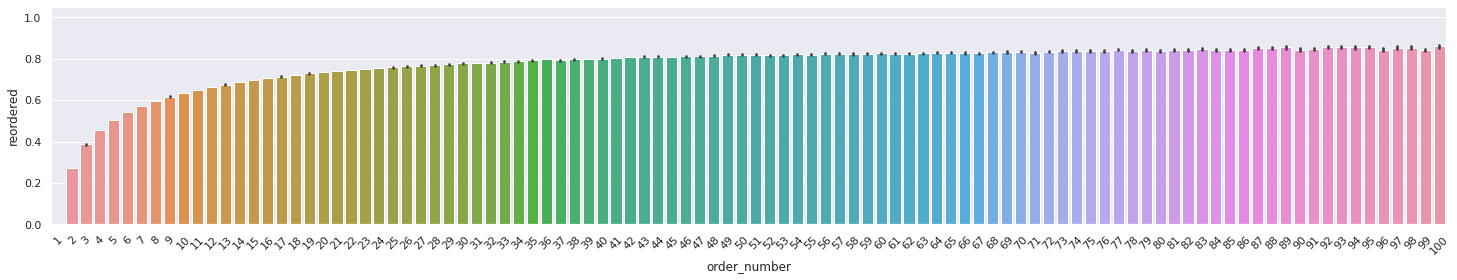

In [ ]:
fig,ax = plt.subplots(figsize=(25,4))
sns.barplot(data=data,x='order_number',y='reordered',estimator=np.mean,orient='v',ax=ax)
plt.ylabel('p(reorder|order_number')
plt.title('Probability of reorder for each order_number.')
plt.xticks(rotation=45)
plt.ylim(0,1.05);

**Conclusion:**
- Probability of reorder sharply increases in starting orders and then it gradually increases till the end.

#### Q. How many products are first_purchased or reordered at nth add_to_cart_value.
- BarPlot of reorders and first_purchases for each add_to_cart_value.

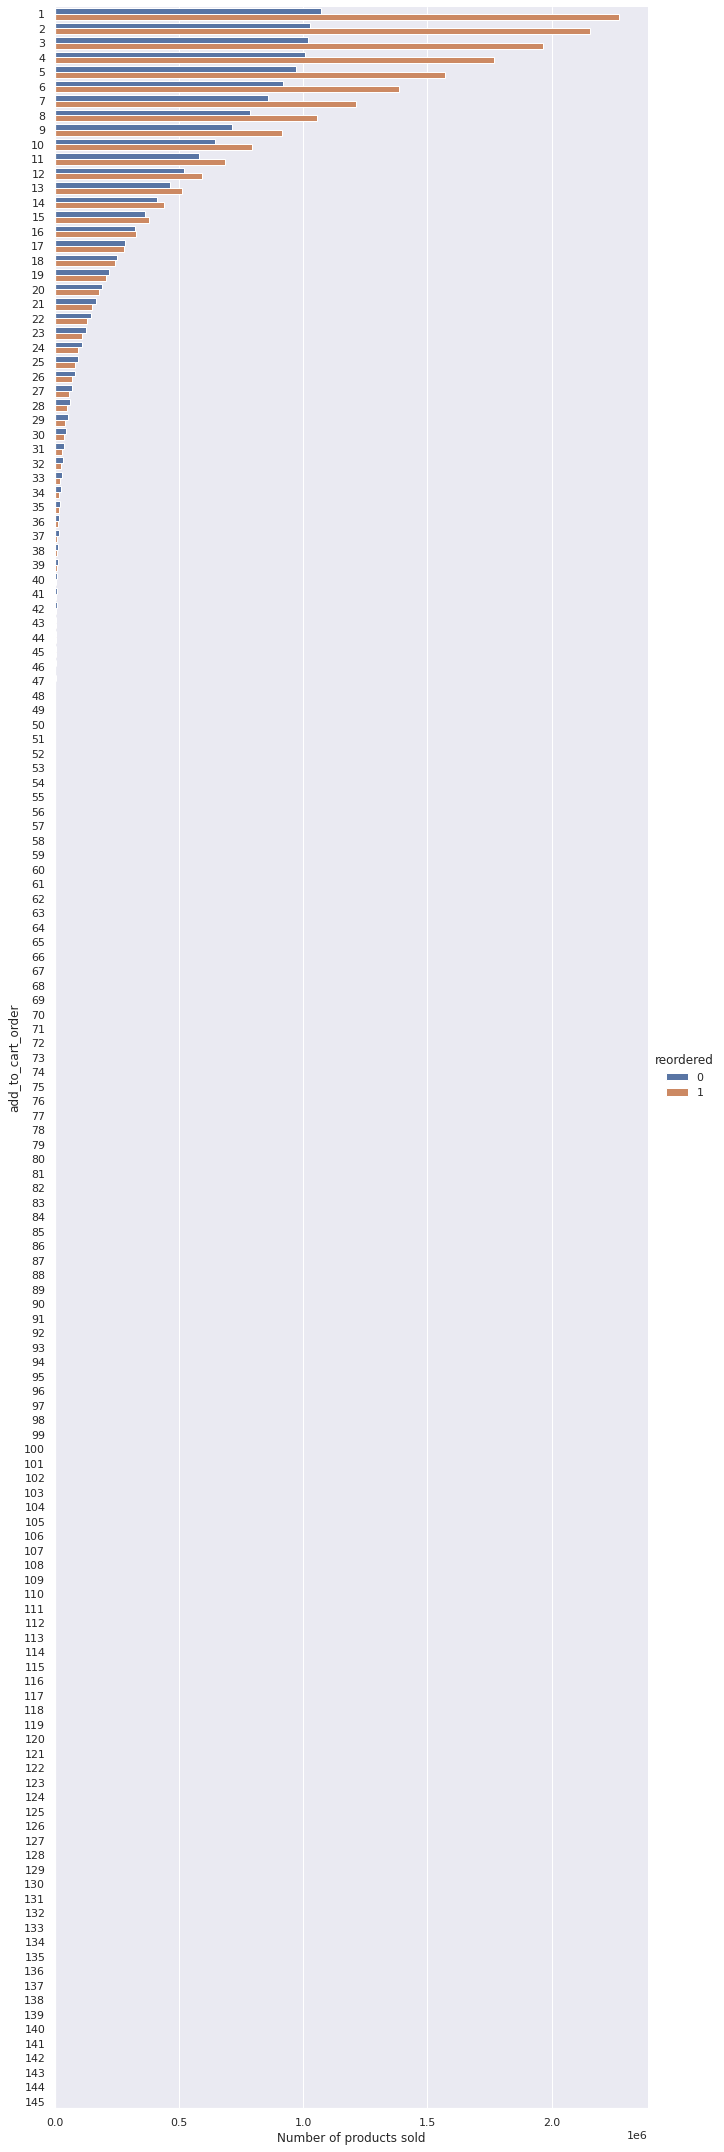

In [ ]:
sns.catplot(y='add_to_cart_order',
            hue='reordered',
            data=data,
            kind='count',
            height=30,
            aspect=0.3)
plt.xlabel('Number of products sold')
plt.title('First_Purchases and Reorders at each add_to_cart_value.')
plt.show()

**Analysis:**
- Mostly customers put that product in the cart first which is a reorder and as the add_to_cart_order increases there are more chances of customer putting new products in the cart.

> **Conclusion:**
- As the add_to_cart_order increases the no. of first_purchases and no. of reorders decreases.
- The decrease in no. of reorders is more sharp.

#### Q. What is the probability of reorder for each add_to_cart_order value?
- BarPlot of probability of reorder for each add_to_cart_order value.

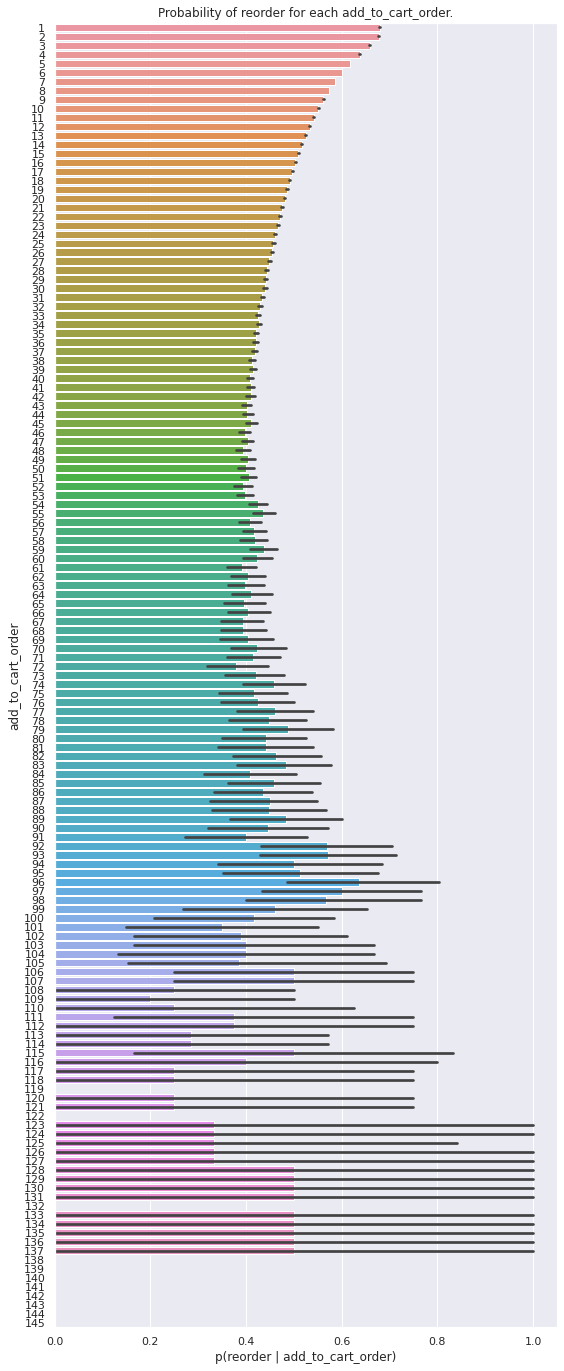

In [ ]:
fig,ax = plt.subplots(figsize=(9,24))
sns.barplot(data=data,
            y='add_to_cart_order',
            x='reordered',
            estimator=np.mean,
            orient='h',
            n_boot=500,
            ax=ax)
plt.title('Probability of reorder for each add_to_cart_order.')
plt.xlabel('p(reorder | add_to_cart_order)');

**Conclusion:**
- The probability of reorder decreases as the add_to_cart_order of products increases.
- The probabilty of reorder of large order_numbers cannot be inferred from the above plot as they have very large confidence intervals. This could be because there are very few orders having large order_numbers.

#### Q. How many products have n=add_to_cart_order place in a order?
- Histogram of no. of products in each add_to_cart_order

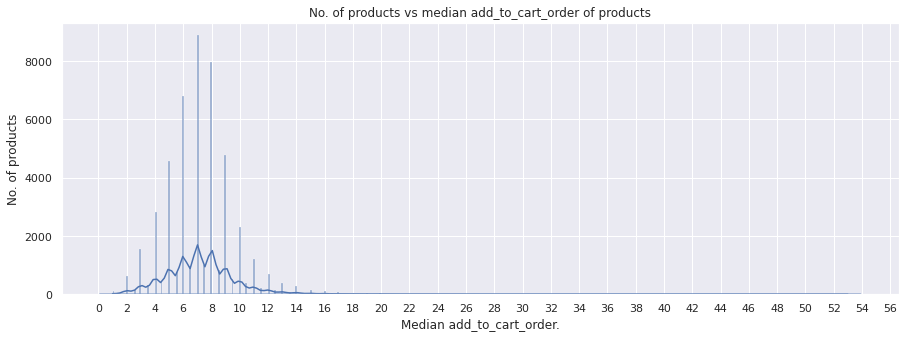

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(order_products.groupby('product_id')['add_to_cart_order'].median(),kde=True,ax=ax);
sns.kdeplot(order_products.groupby('product_id')['add_to_cart_order'].median(),ax=ax);
plt.ylabel('No. of products')
plt.xlabel('Median add_to_cart_order.')
plt.title('No. of products vs median add_to_cart_order of products')
plt.xticks(np.arange(0,58,2));

**Conclusion:**
- Most products have their median add_to_cart_order between 2 to 12. As we saw earlier that most orders have around 1-11 products. This could be the reason behind this graph.
- Some products have large(i.e. greater than 12) 

#### Q. What is the probability of reordering a product?
- PDF of p(reorder|product)

In [ ]:
num_of_times_product_ordered = order_products.merge(prod_info, on='product_id',how='right')\
                                            .groupby('product_id')['reordered'].count()\
                                            .rename('#times_ordered')\
                                            .reset_index()
num_of_times_product_reordered = order_products.merge(prod_info, on='product_id',how='right')\
                                            .groupby('product_id')['reordered'].sum()\
                                            .rename('#times_reordered')\
                                            .reset_index()\
                                            .astype({'#times_reordered':'int64'})

In [ ]:
prod_info = prod_info.merge(num_of_times_product_ordered,on='product_id',how='left')
prod_info = prod_info.merge(num_of_times_product_reordered,on='product_id',how='left')

In [ ]:
# probability of reorder of a product = (number of times reordered / number of times ordered)
prod_info['p(reorder|product)'] = prod_info.apply(lambda row: row['#times_reordered']/row['#times_ordered'] if (row['#times_ordered']!=0) else 0.0,axis='columns')
prod_info['#first_purchase'] = prod_info['#times_ordered'] - prod_info['#times_reordered']

In [ ]:
prod_info.head()

product_id  ... #first_purchase
0           1  ...             743
1          78  ...               8
2         102  ...             153
3         172  ...              27
4         285  ...             106

[5 rows x 11 columns]

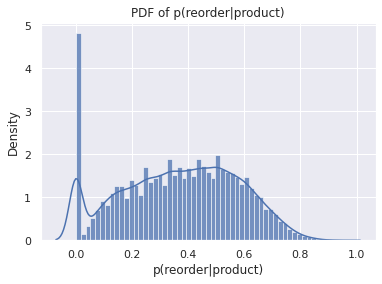

In [ ]:
sns.histplot(x=prod_info['p(reorder|product)'],stat='density')
sns.kdeplot(x=prod_info['p(reorder|product)'])
plt.title('PDF of p(reorder|product)');

**Analysis:**
- Many products are reordered 0 times. It means customers don't like these products.
- Otherwise, the PDF roughly looks like a bell-shaped curve with high std-dev.
- The PDF is little bit right skewed.

> **Conclusion:**
- There are only a few products with high reorder rate.
- Many product with reorder rate=0 are not liked by customers.

#### Q. Which products are best-sellers?
- BarPlot and Treemap of most reordered products.

In [ ]:
# products that are reordered most no. of times
top_reordered = prod_info.sort_values(['#times_reordered'],
                                      axis='index',
                                      ascending=False).iloc[:20,:]

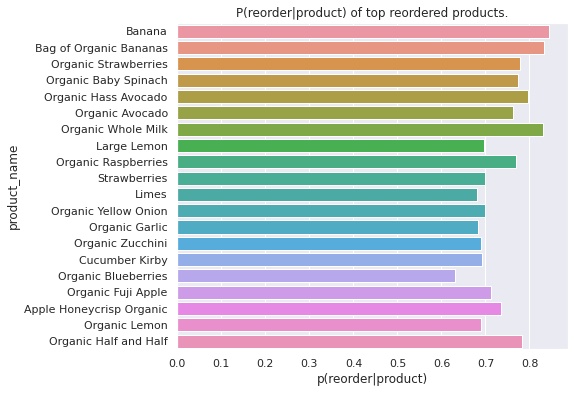

In [ ]:
fig,ax = plt.subplots(figsize=(7,6))
sns.barplot(y='product_name',x='p(reorder|product)',data=top_reordered,ax=ax)
plt.title('P(reorder|product) of top reordered products.')
plt.show()

# Treemap
fig = px.treemap(top_reordered, 
                 path=['department','aisle','product_name'],
                 values = 'p(reorder|product)',
                 title='P(reorder|product) of top reordered products with Department, Aisle')
fig.show()

**Analysis**
- Top 2 reordered products are Bananas with a very high order, reorder and probability value.
- People love to reorder organic products. 14 out of top 20 products are organic.
- Customers love to reorder fruits and vegetables. Except "Organic whole milk" & "Organic half and half" of "dairy eggs" department, all other products are either fruits or vegetables.
- Produce department has the largest number of top reordered products.
- P(reorder|products) of "Organic whole milk" & "Organic half and half" are comparable to that of "Bananas".

> **Conclusion:**
- Bananas, strawberries, raspberries, avocado, organic products, milk, Lemons are the most reordered and have a high p(reorder|product) value.

#### Q. Which products are the least reordered?
- Treemap of products reordered only 1-2 times.

In [ ]:
# products that are reordered least no. of times
least_reordered = prod_info.loc[prod_info['#times_reordered'].between(1,2),:]
print(f'{len(least_reordered)} products were reordered only 1-2 times.')

5173 products were reordered only 1-2 times.


In [ ]:
# Treemap
fig = px.treemap(least_reordered, 
                 path=['department','aisle','product_name'],
                 title='Treemap of least reordered products with Department, Aisle.')
# resizing figure
fig.update_layout(autosize=False,
                width=1050,
                height=1000,)
fig.show()

**Analysis:**
- Total more than 5K products which are reordered only 1-2 times.
- Personal care department alone has more than 1k products which are least reordered.
- Pantry and snacks department also has more than 500 products which are least reordered.
- Almost every department and aisle has some products which are least reordered.

> **Conclusion:**
- Around 10% percent of the total products are least reordered

#### Q. Which products are never reordered?
- Treemap of products which are never reordered.

In [ ]:
# products that are reordered least no. of times
never_reordered = prod_info.loc[prod_info['#times_reordered']==0,:]
print(f'{len(never_reordered)} products were never reordered.')
#never_reordered.head()

4085 products were never reordered.


In [ ]:
# Treemap
fig = px.treemap(never_reordered, 
                 path=['department','aisle','product_name'],
                 title='Treemap of never reordered products with Department, Aisle')
# resizing figure
fig.update_layout(autosize=False,
                width=1050,
                height=1000,)
fig.show()

In [ ]:
# products that are reordered least no. of times
never_ordered = prod_info.loc[prod_info['#times_ordered']==0,:]
print(f'{len(never_ordered)} products were never ordered.')
never_ordered.head()

3 products were never ordered.


product_id  ... p(reorder|product)
8574         7045  ...                0.0
14299       46625  ...                0.0
38861        3630  ...                0.0

[3 rows x 9 columns]

**Analysis:**
- Almost 4K products were never reordered.
- Again, Personal care department has more than 1k products that were never reordrered.
- Except bulk department each department has some products which were never reordered.
- Three products "Unpeeled Apricot Halves in Heavy Syrup", "Single Barrel Kentucky Straight Bourbon Whiskey" and "Protein Granola Apple Crisp" were never ordered at all.

> **Conclusion:**
- Almost 8% of total products were never reordered.
- 3 products were never ordered.
- Customers don't like most products of Personal Care department.

#### Q. What are some hidden popular categories in Product names?
- BarPlot of mean no. of times reordered the products of popular category.

As we saw previously that most best-sellers are organic products. Similarly, there can be some other hidden categories in product names. I will find those and analyse.

- Criteria for Popular category:
    - Each non-stopword in a product name represents a category.
    - The category which is present in a product name with more #reorders is more popular.
    - The category which is present in more product names is more popular.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords
stop = set(stopwords.words('english'))
stop = stop.union({'100','00', '001', '003', '004', '005', '007', '01', '013021', '02', '04', '09', '10', '1000', '10000', '10000mcg', '1000iu', '1000mcg', '1000mg', '100869', '100965', '100mg', '101', '101305', '101352', '101442', '101445', '101744', '103', '105', '105ct', '108', '10mg', '10n', '10oz', '11', '110', '1100', '112', '114', '115', '116', '118', '11oz', '11z', '12', '120', '1200', '1200mg', '1211062', '1211231', '123', '125', '1250', '125ct', '1280mg', '129', '12c', '12oz', '12z', '13', '1300', '132', '138', '14', '1400', '14000', '140ct', '144', '14oz', '15', '150', '1500', '150mg', '150w', '153', '156', '15oz', '16', '160ct', '166', '1664', '16oz', '17', '174', '1761', '18', '180', '1836', '1837', '185', '1879', '1893', '19', '192', '1942', '1f', '1n', '1pk', '1st', '1x', '20', '200', '2000', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200ck', '200ct', '200mg', '201', '2010', '2011', '2012', '2013', '2014', '2015', '2025', '203', '2032bp', '205', '209', '20mg', '20oz', '21', '210', '2115', '216', '22', '220', '2200', '220mg', '23', '230', '24', '240', '240ct', '24_7', '24hr', '24oz', '25', '250', '2500', '250mg', '25mg', '25w', '26', '260', '27', '270ct', '275', '28', '28mg', '29', '2chic', '2ct', '2in1', '2lt', '2n', '2nd', '2oz', '2pk', '2t', '2x', '2z', '30', '300', '3000', '30000', '3000mcg', '300mg', '301', '305', '30c', '30oz', '30x', '31', '310', '311', '312', '32', '32000', '325', '32510', '325mg', '328', '32mg', '33', '335', '337', '34', '35', '357', '36', '360', '37', '375', '38', '38210', '39', '39or', '3d', '3dwhite', '3f', '3mg', '3n', '3oz', '3rd', '3s', '3t', '3x', '3x35ct', '40', '400', '4000', '400mg', '40w', '41', '42', '4200', '43', '44', '440', '45', '45000', '450mg', '454', '45ct', '46', '475', '48', '485', '48h', '49', '490', '4g', '4kids', '4n', '4oz', '4pk12oz', '4t', '4x', '50', '500', '5000', '500mcg', '500mg', '50mg', '51', '511', '5129732', '5160628', '5160666', '525', '53', '530', '54', '55', '550', '56', '57', '570', '580mg', '595', '5a', '5g', '5lb', '5m', '5mg', '5n', '5nb', '5oz', '5ph', '5t', '5x', '60', '600', '6000', '60000', '600mg', '60ct', '610', '62', '625', '62oz', '63', '635', '64', '65', '650', '65w', '66', '660', '667', '66oz', '67', '67oz', '68', '680', '6b', '6c', '6g', '6l', '6m', '6n', '6oz', '6pk', '70', '705', '71', '715', '72', '72ct', '73', '74', '75', '750', '7500', '75ea', '75oz', '76', '76oz', '78', '79', '7in', '7in1', '7n1', '7oz', '7up', '80', '800', '805', '81', '810', '81mg', '82', '825', '83', '84', '85', '850', '86', '87', '872', '875', '88', '89', '8ct', '8oz', '8pk12oz', '90', '9000', '902', '90708', '90mg', '91', '92', '93', '94', '946', '95', '951', '96', '97', '98', '99', '9ct', '9n', '9oz', '9v', 'a21', 'aa', 'aaa'})
# department names and aisle names need not be in the list of categories 
# as we already have information about these.
stop = stop.union(set(dep.department))
stop = stop.union(set(aisles.aisle))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of product names is corpus and each product name is documnent.
# binary CountVectorizer will give an array showing if a product name belongs to a category or not.
vec = CountVectorizer(binary=True,stop_words=stop,)
vec.fit(prod_info.product_name)
X = vec.transform(prod_info.product_name)
print('Total number of hidden categories =',len(vec.get_feature_names()))
print('List of categories:',vec.get_feature_names())
# All the categories present in the product name is multiplied with the #times_reordered value
# to increase the weight of this category depicting how much this category is popular.
popularity_weight = prod_info['#times_reordered'].to_numpy().reshape(-1,1)
# multiplying each category with popularity weight and 
# summing the popularity of categories which are present in multiple product names.
popularity = (X.toarray()*popularity_weight).sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['accessories', 'aid', 'air', 'allergy', 'alternatives', 'appetizers', 'applesauce', 'asian', 'baby', 'bacon', 'bags', 'bake', 'baking', 'bars', 'bath', 'beans', 'beers', 'body', 'bouillon', 'bowls', 'breads', 'broth', 'buns', 'cakes', 'candles', 'candy', 'canned', 'care', 'cat', 'champagnes', 'cheese', 'cheeses', 'chips', 'chocolate', 'cleaning', 'cocoa', 'cold', 'cookies', 'coolers', 'counter', 'creams', 'cups', 'dairy', 'decor', 'dessert', 'desserts', 'detergents', 'diapers', 'dips', 'dish', 'dog', 'dogs', 'doughs', 'dressing', 'dried', 'drink', 'drinks', 'dry', 'ear', 'energy', 'eye', 'facial', 'feminine', 'first', 'flat', 'flatware', 'flu', 'food', 'foods', 'formula', 'fresh', 'fresheners', 'fruit', 'fruits', 'gelatins', 'goods', 'grains', 'gum', 'hair', 'herbs', 'honeys', 'hot', 'hygiene

Total number of hidden categories = 10271
List of categories: ['abate', 'abbey', 'abc', 'abrasive', 'abruzzese', 'absolute', 'absolutely', 'absorb', 'absorbancy', 'absorbencies', 'absorbency', 'absorbenncy', 'absorbent', 'absorber', 'absorbing', 'abuelita', 'abundant', 'ac', 'acacia', 'acai', 'accelerator', 'accent', 'accents', 'access', 'accurate', 'aceita', 'acetaminophen', 'acetone', 'acetyl', 'ache', 'aches', 'achiote', 'acid', 'acidil', 'acidophilus', 'acini', 'acme', 'acne', 'acnedote', 'acnewash', 'aconitum', 'acorn', 'act', 'acti', 'actin', 'acting', 'action', 'actionpacs', 'activ', 'activated', 'activating', 'activator', 'active', 'activedry', 'activia', 'activity', 'actvated', 'adavanced', 'add', 'added', 'addictives', 'addictivly', 'additives', 'ade', 'adhering', 'adhesive', 'adige', 'adjustable', 'adobo', 'adore', 'adorn', 'adrenal', 'adrenaline', 'aduki', 'adul', 'adult', 'adults', 'advance', 'advancecare', 'advanced', 'advantage', 'advantedge', 'adventure', 'adventures', 

In [ ]:
category = pd.DataFrame({'category':vec.get_feature_names(),
                         'popularity':popularity})\
                         .sort_values('popularity',ascending=False)\
                         .reset_index(drop=True)

In [ ]:
# picking popular categories with popularity more than 200k
category = category.loc[category.popularity>=200000,'category']
print(f'Total {len(category)} top hidden categories in product names.')
np.array(category)

Total 62 top hidden categories in product names.


array(['organic', 'percent', 'cheese', 'banana', 'whole', 'free', 'water',
       'strawberry', 'baby', 'fat', 'original', 'apple', 'chocolate',
       'large', 'red', 'chicken', 'sparkling', 'greek', 'bag', 'vanilla',
       'avocado', 'almond', 'natural', 'white', 'spinach', 'cheddar',
       'lemon', 'juice', 'chips', 'green', 'sweet', 'brown', 'gluten',
       'coconut', 'orange', 'hass', 'wheat', 'reduced', 'unsweetened',
       'tomato', 'rice', 'salt', 'potato', 'total', 'blueberry', 'grain',
       'low', 'carrots', 'lowfat', 'plain', 'bar', 'fruit', 'extra',
       'roasted', 'yellow', 'beans', 'pepper', 'honey', 'turkey', 'grade',
       'fresh', 'onion'], dtype=object)

In [ ]:
# Adding these categories in prod_info dataframe
for cat in category:
    prod_info[cat] = prod_info.product_name.str.contains(cat,case=False).astype('Sparse[uint8]')
prod_info.head()

product_id                                    product_name  ...  fresh  onion
0           1                      Chocolate Sandwich Cookies  ...      0      0
1          78               Nutter Butter Cookie Bites Go Pak  ...      0      0
2         102                           Danish Butter Cookies  ...      0      0
3         172  Gluten Free All Natural Chocolate Chip Cookies  ...      0      0
4         285                    Mini Nilla Wafers Munch Pack  ...      0      0

[5 rows x 72 columns]

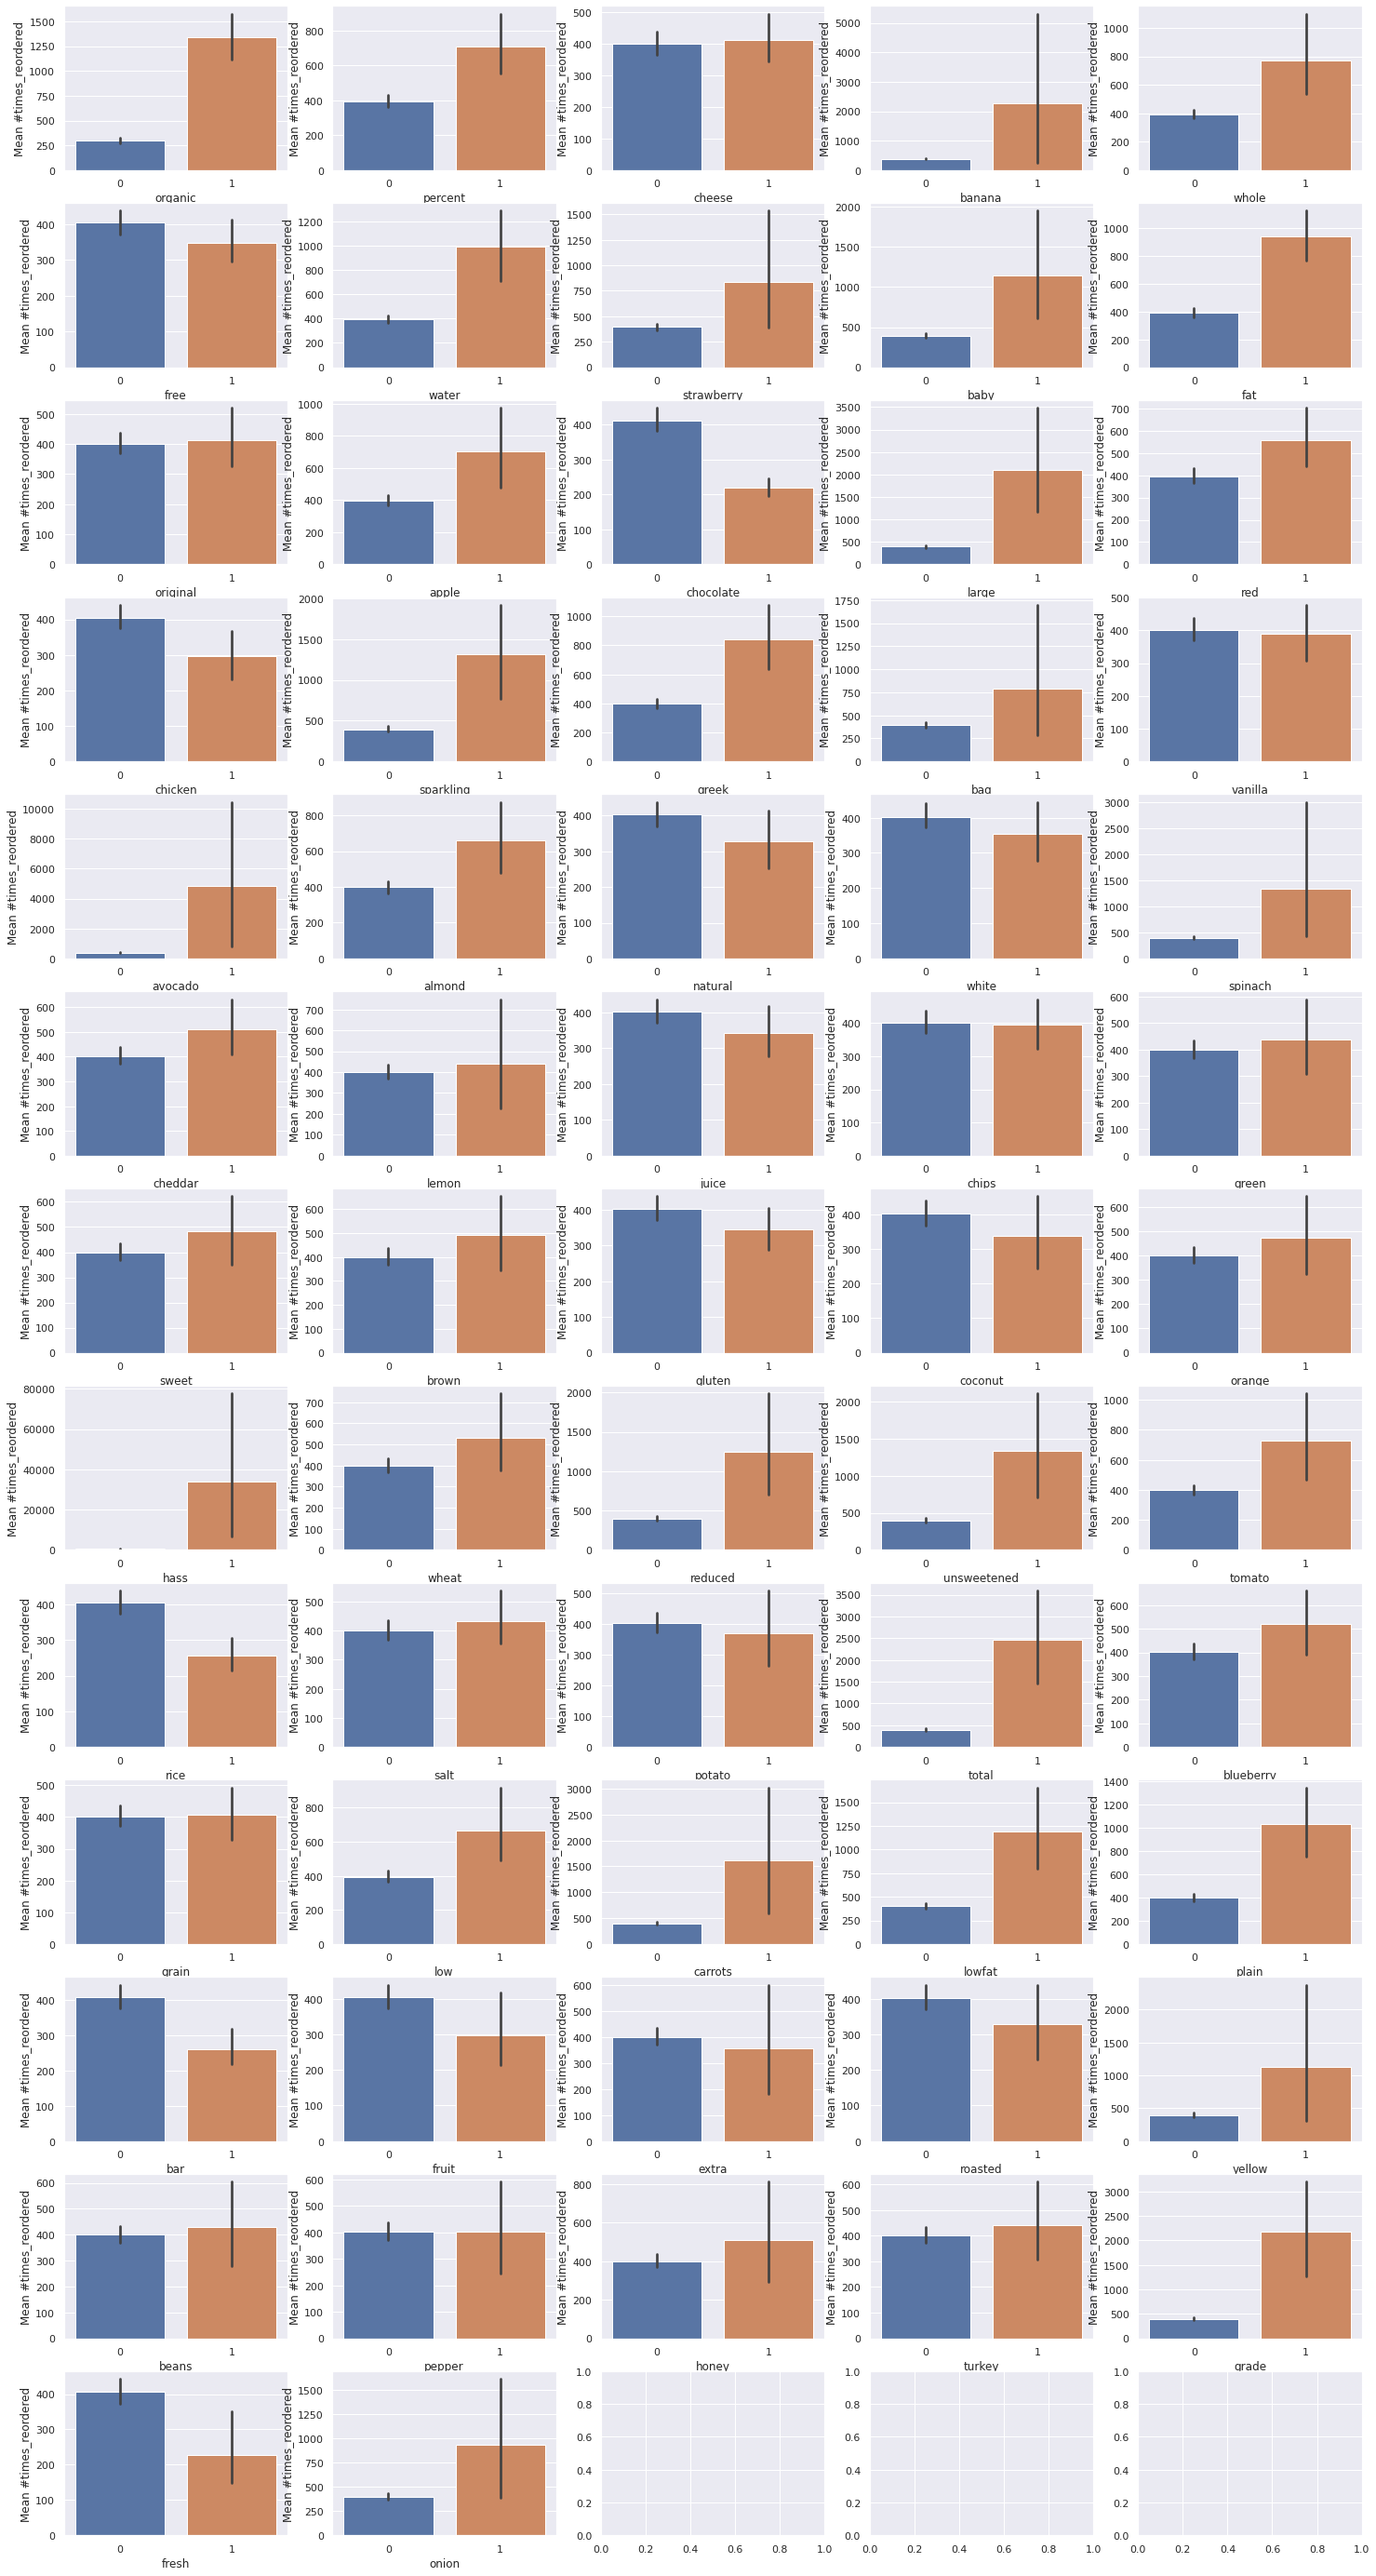

In [ ]:
fig, ax = plt.subplots(13,5,figsize=(25,50),)
i=0
for cat in category:
    plot = sns.barplot(data=prod_info,
                       x=cat,
                       y='#times_reordered',
                       estimator=np.mean,
                       ax=ax[i//5,i%5])
    plot.set_ylabel('Mean #times_reordered')
    i+=1
plt.show()

**Analysis:**
- Products of categories like organic, Banana, large, strawberry, hass, grade, carrots, total, plain, lowfat, unsweetened, reduced, sparkling, fat and baby categories are significantly ordered more.

> **Conclusion:**
- These 62 categories are important and tell a lot if a product belonging to these categories will be reordered or not.

#### Q. What is the probability of a customer reordering?
- PDF of p(reorder|user).

In [ ]:
user_info = data.groupby(['user_id'])['reordered'].agg(['sum','count','mean'])
user_info = user_info.reset_index().rename(columns={'sum':'#reordered_prod',
                                                    'count':'#ordered_prod',
                                                    'mean':'p(reorder|user)'})
# p(reorder|user) = #reordered products / #ordered products
user_info

user_id  #reordered_prod  #ordered_prod  p(reorder|user)
0             1             51.0             70         0.728571
1             2            105.0            226         0.464602
2             3             55.0             88         0.625000
3             4              1.0             18         0.055556
4             5             18.0             46         0.391304
...         ...              ...            ...              ...
206204   206205             14.0             51         0.274510
206205   206206            135.0            285         0.473684
206206   206207            131.0            223         0.587444
206207   206208            479.0            677         0.707533
206208   206209             65.0            137         0.474453

[206209 rows x 4 columns]

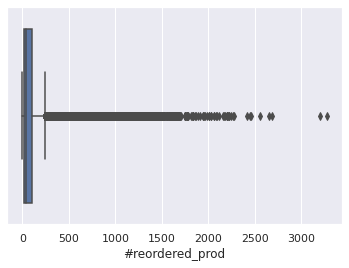

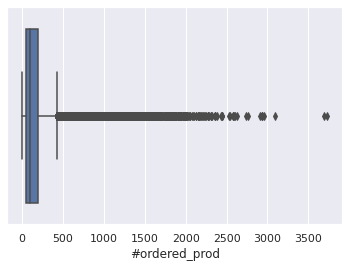

In [ ]:
sns.boxplot(data=user_info,x='#reordered_prod');
plt.title('BoxPlot of no. of reordered products by each user')
plt.show()
sns.boxplot(data=user_info,x='#ordered_prod');
plt.title('BoxPlot of no. of ordered products by each user')
plt.show()

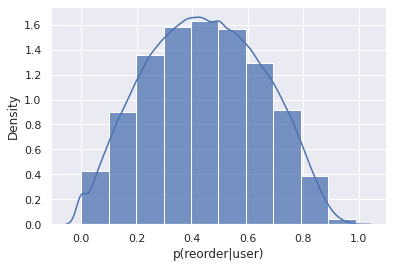

In [ ]:
sns.histplot(data=user_info,x='p(reorder|user)',bins=10,stat='density');
sns.kdeplot(data=user_info,x='p(reorder|user)')
plt.title('PDF of probability of reorder for each user.');

**Analysis:**
- Most users have ordered/reordered less than 250 products in total.
- There are some users who order/reorder very large no. of products.
- The pdf looks like a gaussian curve. Most of the customers have probability of 0.5 of reordering. And as we go away the probability decreases.

> **Conclusion:**
- Most of the customers try new products as well as they reorder the old products.

#### Q. What is the avg no. of products that a customer reorders?
- PDF of mean_#reordered_prod

In [ ]:
# number of reordered products in a user's order
num_prod = data.groupby(['user_id','order_id'])['reordered'].sum().reset_index()
# mean no. of products in user's all orders
mean_num_prod = num_prod.groupby('user_id')['reordered'].mean()\
                        .rename('mean_#reordered_prod')\
                        .reset_index()
# merge mean_num_prod and user_info
user_info = user_info.merge(mean_num_prod, on='user_id',)
user_info

user_id  #reordered_prod  ...  p(reorder|user)  mean_#reordered_prod
0             1             51.0  ...         0.728571              4.636364
1             2            105.0  ...         0.464602              7.000000
2             3             55.0  ...         0.625000              4.583333
3             4              1.0  ...         0.055556              0.200000
4             5             18.0  ...         0.391304              3.600000
...         ...              ...  ...              ...                   ...
206204   206205             14.0  ...         0.274510              3.500000
206205   206206            135.0  ...         0.473684              2.014925
206206   206207            131.0  ...         0.587444              8.187500
206207   206208            479.0  ...         0.707533              9.775510
206208   206209             65.0  ...         0.474453              4.642857

[206209 rows x 5 columns]

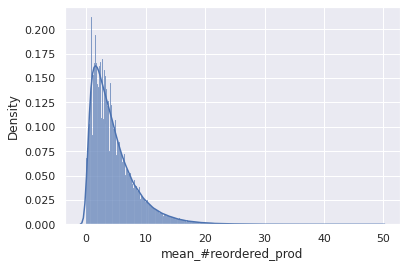

In [ ]:
sns.histplot(data=user_info,x='mean_#reordered_prod',stat='density');
sns.kdeplot(data=user_info,x='mean_#reordered_prod');

**Analysis:**
- Most customers reorder 5-10 products on avg in an order.
- As the pdf is right-skewed, there are some customers who reorder a lot on avg in an order.

> **Conclusion:**
- The average no. of reorders of customer is between 5-10.
- There are some customers who reorder a lot.

---



## **Dataset Preparation**

In [ ]:
# users and their prior order's products
users_prior_order_products = prior_data[['user_id','product_id']]\
                            .drop_duplicates(ignore_index=True)
users_prior_order_products

user_id  product_id
0               1         196
1               1       14084
2               1       12427
3               1       26088
4               1       26405
...           ...         ...
13307948   206209       39216
13307949   206209       38730
13307950   206209       31477
13307951   206209        6567
13307952   206209       22920

[13307953 rows x 2 columns]

In [ ]:
# users and their prior order's products and future_order_id
users = orders.loc[~orders.eval_set.str.contains('prior'),['user_id','order_id','eval_set']]
dataset = users_prior_order_products.merge(users,on='user_id',how='inner')
del users_prior_order_products
del users
dataset

user_id  product_id  order_id eval_set
0               1         196   1187899    train
1               1       14084   1187899    train
2               1       12427   1187899    train
3               1       26088   1187899    train
4               1       26405   1187899    train
...           ...         ...       ...      ...
13307948   206209       39216    272231    train
13307949   206209       38730    272231    train
13307950   206209       31477    272231    train
13307951   206209        6567    272231    train
13307952   206209       22920    272231    train

[13307953 rows x 4 columns]

In [ ]:
dataset = dataset.merge(order_products_train,on=['order_id','product_id'],how='left')
dataset.drop(columns=['add_to_cart_order'],inplace=True)
dataset.loc[(dataset['reordered'].isna()) & (dataset.eval_set.str.contains('train')),'reordered']=0
dataset

user_id  product_id  order_id eval_set  reordered
0               1         196   1187899    train        1.0
1               1       14084   1187899    train        0.0
2               1       12427   1187899    train        0.0
3               1       26088   1187899    train        1.0
4               1       26405   1187899    train        1.0
...           ...         ...       ...      ...        ...
13307948   206209       39216    272231    train        1.0
13307949   206209       38730    272231    train        0.0
13307950   206209       31477    272231    train        0.0
13307951   206209        6567    272231    train        0.0
13307952   206209       22920    272231    train        0.0

[13307953 rows x 5 columns]

**Train-validation split.**

In [ ]:
users_train = orders.loc[orders.eval_set.str.contains('train'),['user_id']]
users_train, users_cv = train_test_split(users_train,
                                         shuffle=True,
                                         test_size=0.3,
                                         random_state=31)
print(f'No. of train users = {len(users_train)}')
print(f'No. of cv users = {len(users_cv)}')

No. of train users = 91846
No. of cv users = 39363


In [ ]:
users_cv['set']='cv'
users_cv.head()

user_id set
36594       2260  cv
77977       4752  cv
1084601    65324  cv
2067224   124271  cv
1676808   100656  cv

In [ ]:
# adding cv to the eval_set for cv users
dataset = dataset.merge(users_cv,on='user_id',how='left')
dataset.loc[dataset['set']=='cv','eval_set']='cv'
dataset.drop(columns=['set'],inplace=True)
dataset

user_id  product_id  order_id eval_set  reordered
0               1         196   1187899       cv        1.0
1               1       14084   1187899       cv        0.0
2               1       12427   1187899       cv        0.0
3               1       26088   1187899       cv        1.0
4               1       26405   1187899       cv        1.0
...           ...         ...       ...      ...        ...
13307948   206209       39216    272231    train        1.0
13307949   206209       38730    272231    train        0.0
13307950   206209       31477    272231    train        0.0
13307951   206209        6567    272231    train        0.0
13307952   206209       22920    272231    train        0.0

[13307953 rows x 5 columns]

In [ ]:
print('No. of datapoints in each set:')
print('Train:'.ljust(12),len(dataset[dataset.eval_set=='train']))
print('Validation:'.ljust(12),len(dataset[dataset.eval_set=='cv']))
print('Test:'.ljust(12),len(dataset[dataset.eval_set=='test']))

No. of datapoints in each set:
Train:       5929287
Validation:  2545374
Test:        4833292


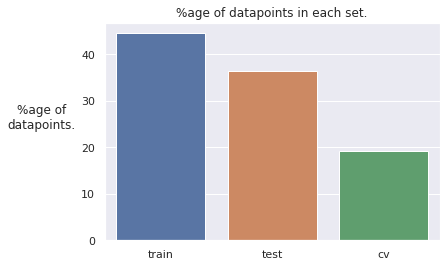

In [ ]:
eval_set_percentage = dataset['eval_set'].value_counts(normalize=True)*100
sns.barplot(x=eval_set_percentage.index,y=eval_set_percentage,orient='v')
plt.ylabel('%age of\ndatapoints.',rotation=0,labelpad=40,)
plt.title('%age of datapoints in each set.');

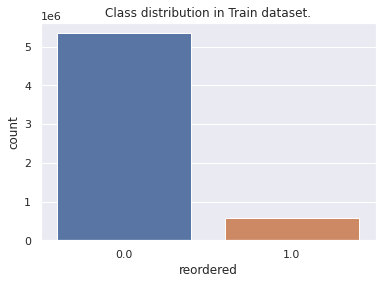

In [ ]:
# class distribution cv
sns.countplot(data=dataset[dataset.eval_set=='train'],x='reordered')
plt.title('Class distribution in Train dataset.');

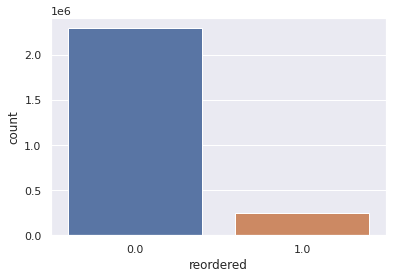

In [ ]:
# class distribution in train
sns.countplot(data=dataset[dataset.eval_set=='cv'],x='reordered');

### Feature Engineering

- user:
    - #reorders
        1. **#reorders_u:** Sum of #reorders of each order of the user.
        2. **mean_#reorders:** Avg. of #reorders of each order by the user.
        3. **median_#reorders:** Median of #reorders of each order by the user.
        4. **min_#reorders:** Min of #reorders of each order by the user.
        5. **max_#reorders:** Max of #reorders of each order by the user.
    - #purchases(or cart_size)
        6. **#purchases_u:** Sum of #purchases of each order by the user.
        7. **mean_#purchases:** Avg of #purchases of each order by the user.
        8. **median_#purchases:** Median of #purchases of each order by the user.
        9. **min_#purchases:** Min of #purchases of each order by the user.
        10. **max_#purchases:** Max of #purchases of each order by the user.
    - #first_purchase
        11. **#first_purchases_u:** Sum of no. of products in each order that has been purchased for the 1st time by the user.
        12. **mean_#first_purchases:** Mean of no. of products in each order that has been purchased for the 1st time by the user.
        13. **median_#first_purchases:** Median of no. of products in each order that has been purchased for the 1st time by the user.
        14. **min_#first_purchases:** Min of no. of products in each order that has been purchased for the 1st time by the user.
        15. **max_#first_purchases:** Max of no. of products in each order that has been purchased for the 1st time by the user.
    - probability
        16. **p(reorder|user):** #reorders_u/#Purchases_u
        17. **mean_p(reorder|user,order):** Mean of (#reorders in each order)/(#purchases in each order).
        18. **median_p(reorder|user,order):** Median of (#reorders in each order)/(#purchases in each order).
        19. **max_p(reorder|user,order):** Max of (#reorders in each order)/(#purchases in each order).
        20. **min_p(reorder|user,order):** Min of (#reorders in each order)/(#purchases in each order).

- product:
    21. **#reorders_p:** No. of times the product has been reordered.
    22. **#purchases_p:** No. of times the product has been purchased.
    23. **#first_purchases_p:** No. of times the product has been purchased for the first time by any user.
    24. **p(reorder|product):** #reorders_p/#purchases_p.
    - Department and aisle
        25. **dep_target_enc:** Target encoding of department: P(reordered=1| department).
        26. **aisle_target_enc:** Target encoding of aisle: P(reordered=1| aisle).
        27. **#avg_reorders_dep:** (Total #reorders from given department) / (Total #products in the department).
        28. **#avg_reorders_aisle:** (Total #reorders from given aisle) / (Total #products in the aisle).
        29. **p(reorder|dep_of_prod):** (Total #reorders from the given department in the past) / (Total #purchases from the department).
        30. **p(reorder|aisle_of_prod):** (Total #reorders from the given aisle in the past) / (Total #purchases from the aisle).
        31. **eatable:** 1 if product belongs to eatable department otherwise 0.

- user_product:
    32. **#reorders_up:** No. of times the user has reordered the given product.
    33. **p(reorder|user,product):** (#orders where given product was rerodered by user)/ (Total #orders by user)
    34. **reordered_in_last_order:** 1 if given user reordered the given product in his last order otherwise 0.
    35. **reordered_in_2ndlast_order:** 1 if given user reordered the given product in his 2nd last order otherwise 0.
    36. **reordered_in_3rdlast_order:** 1 if given user reordered the given product in his 3rd last order otherwise 0.

#### Adding user features:

In [ ]:
user_info = (
    prior_data.groupby('user_id')['reordered']
    .agg(['sum','count'])
    .rename(columns={'sum':'#reorders_u', 'count':'#purchases_u'})
    .reset_index()
)
user_info.head()

user_id  #reorders_u  #purchases_u
0        1         41.0            59
1        2         93.0           195
2        3         55.0            88
3        4          1.0            18
4        5         14.0            37

In [ ]:
user_info['#first_purchases_u'] = user_info['#purchases_u']-user_info['#reorders_u']
user_info['p(reorder|user)_u'] = user_info['#reorders_u']/user_info['#purchases_u']
user_info.head()

user_id  #reorders_u  #purchases_u  #first_purchases_u  p(reorder|user)_u
0        1         41.0            59                18.0           0.694915
1        2         93.0           195               102.0           0.476923
2        3         55.0            88                33.0           0.625000
3        4          1.0            18                17.0           0.055556
4        5         14.0            37                23.0           0.378378

In [ ]:
user_purchases_per_order = (
    prior_data[prior_data.order_number!=1].groupby(['user_id','order_id'])['reordered']
    .agg(['sum','count'])
    .rename(columns={'sum':'#reorders_u', 'count':'#purchases_u'})
    .reset_index()
)
# not considered order_number=1 because reorders will be 0 for this order.
user_purchases_per_order.head()

user_id  order_id  #reorders_u  #purchases_u
0        1    431534            5             8
1        1    473747            3             5
2        1    550135            5             5
3        1   2254736            5             5
4        1   2295261            6             6

In [ ]:
user_purchases_per_order['#first_purchases_u'] = user_purchases_per_order['#purchases_u']-user_purchases_per_order['#reorders_u']
user_purchases_per_order['p(reorder|user,order)_u'] = user_purchases_per_order['#reorders_u']/user_purchases_per_order['#purchases_u']
user_purchases_per_order.head()

user_id  order_id  ...  #first_purchases_u  p(reorder|user,order)_u
0        1    431534  ...                   3                    0.625
1        1    473747  ...                   2                    0.600
2        1    550135  ...                   0                    1.000
3        1   2254736  ...                   0                    1.000
4        1   2295261  ...                   0                    1.000

[5 rows x 6 columns]

In [ ]:
user_purchases_per_order.drop(columns=['order_id'],inplace=True)

In [ ]:
user_purchases_per_order = (
    user_purchases_per_order
    .groupby('user_id')
    .agg(['mean','median','min','max'])
)
user_purchases_per_order

#reorders_u             ... p(reorder|user,order)_u                    
               mean median min  ...                  median       min       max
user_id                         ...                                            
1          4.555556    5.0   3  ...                0.666667  0.500000  1.000000
2          7.153846    9.0   0  ...                0.571429  0.000000  0.888889
3          5.000000    5.0   1  ...                0.777778  0.200000  1.000000
4          0.250000    0.0   0  ...                0.000000  0.000000  0.142857
5          4.666667    4.0   2  ...                0.444444  0.400000  0.666667
...             ...    ...  ..  ...                     ...       ...       ...
206205     4.000000    4.0   2  ...                0.553571  0.250000  0.857143
206206     2.045455    2.0   0  ...                0.500000  0.000000  1.000000
206207     8.733333    8.0   1  ...                0.666667  0.200000  1.000000
206208     9.979167    9.0   2  ...                0.750000  0.285714  1.000000
206209     5.083333    4.0   1  ...                0.516667  0.250000  1.000000

[206209 rows x 16 columns]

In [ ]:
user_purchases_per_order.columns = ['_'.join(col[::-1]) for col in user_purchases_per_order.columns]

In [ ]:
user_info = user_info.merge(user_purchases_per_order, on='user_id')
del user_purchases_per_order
user_info

user_id  ...  max_p(reorder|user,order)_u
0             1  ...                     1.000000
1             2  ...                     0.888889
2             3  ...                     1.000000
3             4  ...                     0.142857
4             5  ...                     0.666667
...         ...  ...                          ...
206204   206205  ...                     0.857143
206205   206206  ...                     1.000000
206206   206207  ...                     1.000000
206207   206208  ...                     1.000000
206208   206209  ...                     1.000000

[206209 rows x 21 columns]

#### Adding product features:

In [ ]:
# collection of departments with eatable items
eatables_dep = {"pantry","snacks","frozen","dairy eggs","beverages","meat seafood",
                "deli","bakery","canned goods","alcohol","dry goods pasta",
                "produce","breakfast","international","bulk"}
# Adding eatables columns in prod_info
prod_info['eatable'] = prod_info.apply(lambda row: row['department'] in eatables_dep,axis=1).astype('uint8')

In [ ]:
dep_info = prior_data.merge(prod_info, on='product_id', how='right')\
                .groupby(['department_id','product_id'],as_index=False)\
                ['reordered'].sum()\
                .rename(columns={'reordered':'#reorders'})
dep_info = dep_info.groupby('department_id',as_index=False)\
                    .agg({'#reorders':'mean'})\
                    .rename(columns={'#reorders': '#avg_reorders_dep'})

prod_info = prod_info.merge(dep_info,on='department_id',how='left')
dep_info.head(3)
# #avg_reorders_dep = #reorders from dep / #products in dep

department_id  #avg_reorders_dep
0              1         302.443224
1              2          27.018248
2              3         487.591029

In [ ]:
dep_info = (
    prior_data.merge(prod_info[['product_id','department_id']],on='product_id')\
                .groupby(['department_id'],as_index=False)['reordered'].mean()\
                .rename(columns={'reordered':'p(reorder|dep_of_prod)'})
)
prod_info = prod_info.merge(dep_info,on='department_id',how='left')
dep_info.head(3)
# p(reorder|dep_of_prod) = #reorders from dep / #purchases from dep

department_id  p(reorder|dep_of_prod)
0              1                0.541885
1              2                0.407980
2              3                0.628141

In [ ]:
aisle_info = prior_data.merge(prod_info, on='product_id', how='right')\
                .groupby(['aisle_id','product_id'],as_index=False)\
                ['reordered'].sum()\
                .rename(columns={'reordered':'#reorders'})
aisle_info = aisle_info.groupby('aisle_id',as_index=False)\
                    .agg({'#reorders':'mean'})\
                    .rename(columns={'#reorders': '#avg_reorders_aisle'})
prod_info = prod_info.merge(aisle_info,on='aisle_id',how='left')
aisle_info.head(3)
# #avg_reorders_aisle : #reorders from aisle / #products in aisle

aisle_id  #avg_reorders_aisle
0         1           293.917808
1         2           148.948339
2         3           328.031250

In [ ]:
aisle_info = (
    prior_data.merge(prod_info[['product_id','aisle_id']],on='product_id')\
                .groupby(['aisle_id'],as_index=False)['reordered'].mean()\
                .rename(columns={'reordered':'p(reorder|aisle_of_prod)'})
)
prod_info = prod_info.merge(aisle_info,on='aisle_id',how='left')
aisle_info.head(3)
# p(reorder|aisle_of_prod) = #reorders from aisle / #purchases from aisle

aisle_id  p(reorder|aisle_of_prod)
0         1                  0.596597
1         2                  0.489326
2         3                  0.598007

In [ ]:
del aisle_info
del dep_info

In [ ]:
prod_reorder = (
    prior_data.groupby('product_id',as_index=False)
    .agg(**{
        '#reorders_p':('reordered','sum'),
        '#purchases_p': ('reordered','count')})
)
prod_reorder.head()

product_id  #reorders_p  #purchases_p
0           1       1136.0          1852
1           2         12.0            90
2           3        203.0           277
3           4        147.0           329
4           5          9.0            15

In [ ]:
prod_info = prod_info.merge(prod_reorder, on='product_id', how='left')
del prod_reorder
# filling nan with zero for the products which haven't been ordered once
prod_info.fillna(value=0,inplace=True)
prod_info['#first_purchases_p'] = prod_info['#purchases_p'] - prod_info['#reorders_p']
prod_info['p(reorder|product)_p'] = (
    prod_info.apply(lambda row: row['#reorders_p']/row['#purchases_p'] 
                                if (row['#purchases_p']!=0)
                                else 0,axis=1)
)
prod_info.head()

product_id  ... p(reorder|product)_p
0           1  ...             0.613391
1          78  ...             0.272727
2         102  ...             0.189189
3         172  ...             0.731959
4         285  ...             0.358974

[5 rows x 15 columns]

#### Adding user-product features:

In [ ]:
user_prod = (prior_data
            .groupby(['user_id','product_id'],
                     as_index=False)['reordered']
             .sum()
             .rename(columns={'reordered':'#reorders_up'})
)
user_prod

user_id  product_id  #reorders_up
0               1         196             9
1               1       10258             8
2               1       10326             0
3               1       12427             9
4               1       13032             2
...           ...         ...           ...
13307948   206209       43961             2
13307949   206209       44325             0
13307950   206209       48370             0
13307951   206209       48697             0
13307952   206209       48742             1

[13307953 rows x 3 columns]

In [ ]:
user_prod = user_prod.merge(prior_data.groupby(['user_id'],as_index=False)
                            ['order_number'].max()
                            .rename(columns={'order_number':'#orders'}),
                            on='user_id')
user_prod

user_id  product_id  #reorders_up  #orders
0               1         196             9       10
1               1       10258             8       10
2               1       10326             0       10
3               1       12427             9       10
4               1       13032             2       10
...           ...         ...           ...      ...
13307948   206209       43961             2       13
13307949   206209       44325             0       13
13307950   206209       48370             0       13
13307951   206209       48697             0       13
13307952   206209       48742             1       13

[13307953 rows x 4 columns]

In [ ]:
user_prod['p(reorder|user,product)_up'] = (
    user_prod['#reorders_up']/(user_prod['#orders'] -1)
)
user_prod.drop(columns=['#orders'],inplace=True)
user_prod

user_id  product_id  #reorders_up  p(reorder|user,product)_up
0               1         196             9                    1.000000
1               1       10258             8                    0.888889
2               1       10326             0                    0.000000
3               1       12427             9                    1.000000
4               1       13032             2                    0.222222
...           ...         ...           ...                         ...
13307948   206209       43961             2                    0.166667
13307949   206209       44325             0                    0.000000
13307950   206209       48370             0                    0.000000
13307951   206209       48697             0                    0.000000
13307952   206209       48742             1                    0.083333

[13307953 rows x 4 columns]

In [ ]:
def get_products(df):
    '''Returns DataFrame of reordered products of last order.'''
    max_order_num = df.order_number.max()
    return df.loc[(df.order_number==max_order_num) & (df.reordered==1),['product_id']]

user_last_order_prod = prior_data.groupby('user_id').apply(lambda df: get_products(df))
user_last_order_prod = user_last_order_prod.droplevel(level=1)
user_last_order_prod.reset_index(inplace=True)
user_last_order_prod['reordered_in_last_order'] = 1
user_last_order_prod

user_id  product_id  reordered_in_last_order
0              1         196                        1
1              1       46149                        1
2              1       25133                        1
3              1       10258                        1
4              1       13032                        1
...          ...         ...                      ...
1254588   206208       10385                        1
1254589   206209       24852                        1
1254590   206209        9405                        1
1254591   206209       16168                        1
1254592   206209       14197                        1

[1254593 rows x 3 columns]

In [ ]:
user_prod = user_prod.merge(user_last_order_prod, on=['user_id','product_id'],how='left')
del user_last_order_prod
user_prod['reordered_in_last_order'].fillna(0,inplace=True)
user_prod['reordered_in_last_order'] = user_prod['reordered_in_last_order'].astype('uint8')
user_prod

user_id  ...  reordered_in_last_order
0               1  ...                        1
1               1  ...                        1
2               1  ...                        0
3               1  ...                        1
4               1  ...                        1
...           ...  ...                      ...
13307948   206209  ...                        0
13307949   206209  ...                        0
13307950   206209  ...                        0
13307951   206209  ...                        0
13307952   206209  ...                        0

[13307953 rows x 5 columns]

In [ ]:
def get_products(df):
    '''Returns DataFrame of reordered products of 2nd last order.'''
    second_last_order_num = df.order_number.max()-1
    return df.loc[(df.order_number==second_last_order_num) & (df.reordered==1),['product_id']]

user_2ndlast_order_prod = prior_data.groupby('user_id').apply(lambda df: get_products(df))
user_2ndlast_order_prod = user_2ndlast_order_prod.droplevel(level=1)
user_2ndlast_order_prod.reset_index(inplace=True)
user_2ndlast_order_prod['reordered_in_2ndlast_order'] = 1
user_2ndlast_order_prod

user_id  product_id  reordered_in_2ndlast_order
0              1       49235                           1
1              1       46149                           1
2              1       25133                           1
3              1         196                           1
4              1       10258                           1
...          ...         ...                         ...
1188956   206209       23800                           1
1188957   206209       13838                           1
1188958   206209       48742                           1
1188959   206209       23594                           1
1188960   206209       23039                           1

[1188961 rows x 3 columns]

In [ ]:
user_prod = user_prod.merge(user_2ndlast_order_prod, on=['user_id','product_id'],how='left')
del user_2ndlast_order_prod
user_prod['reordered_in_2ndlast_order'].fillna(0,inplace=True)
user_prod['reordered_in_2ndlast_order'] = user_prod['reordered_in_2ndlast_order'].astype('uint8')
user_prod

user_id  ...  reordered_in_2ndlast_order
0               1  ...                           1
1               1  ...                           1
2               1  ...                           0
3               1  ...                           1
4               1  ...                           0
...           ...  ...                         ...
13307948   206209  ...                           1
13307949   206209  ...                           0
13307950   206209  ...                           0
13307951   206209  ...                           0
13307952   206209  ...                           1

[13307953 rows x 6 columns]

In [ ]:
def get_products(df):
    '''Returns DataFrame of reordered products of 3rd last order.'''
    third_last_order_num = df.order_number.max()-2
    return df.loc[(df.order_number==third_last_order_num) & (df.reordered==1),['product_id']]

user_3rdlast_order_prod = prior_data.groupby('user_id').apply(lambda df: get_products(df))
user_3rdlast_order_prod = user_3rdlast_order_prod.droplevel(level=1)
user_3rdlast_order_prod.reset_index(inplace=True)
user_3rdlast_order_prod['reordered_in_3rdlast_order'] = 1
user_3rdlast_order_prod

user_id  product_id  reordered_in_3rdlast_order
0              1       12427                           1
1              1         196                           1
2              1       10258                           1
3              1       25133                           1
4              2       32792                           1
...          ...         ...                         ...
1073754   206209        9405                           1
1073755   206209       41213                           1
1073756   206209       24852                           1
1073757   206209       19348                           1
1073758   206209       15700                           1

[1073759 rows x 3 columns]

In [ ]:
user_prod = user_prod.merge(user_3rdlast_order_prod, on=['user_id','product_id'],how='left')
del user_3rdlast_order_prod
user_prod['reordered_in_3rdlast_order'].fillna(0,inplace=True)
user_prod['reordered_in_3rdlast_order'] = user_prod['reordered_in_3rdlast_order'].astype('uint8')
user_prod

user_id  ...  reordered_in_3rdlast_order
0               1  ...                           1
1               1  ...                           1
2               1  ...                           0
3               1  ...                           1
4               1  ...                           0
...           ...  ...                         ...
13307948   206209  ...                           0
13307949   206209  ...                           0
13307950   206209  ...                           0
13307951   206209  ...                           0
13307952   206209  ...                           0

[13307953 rows x 7 columns]

In [ ]:
dataset = dataset.merge(user_info,on='user_id')
dataset.head(3)

user_id  ...  max_p(reorder|user,order)_u
0        1  ...                          1.0
1        1  ...                          1.0
2        1  ...                          1.0

[3 rows x 25 columns]

In [ ]:
ftrs = ['product_id','department','aisle','eatable','#avg_reorders_dep',
        'p(reorder|dep_of_prod)','#avg_reorders_aisle','p(reorder|aisle_of_prod)',
        '#reorders_p','#purchases_p','#first_purchases_p','p(reorder|product)_p']
dataset = dataset.merge(prod_info[ftrs],on='product_id')
dataset.head(3)

user_id  product_id  ...  #first_purchases_p p(reorder|product)_p
0        1         196  ...              8000.0              0.77648
1       15         196  ...              8000.0              0.77648
2       19         196  ...              8000.0              0.77648

[3 rows x 36 columns]

In [ ]:
dataset = dataset.merge(user_prod,on=['user_id','product_id'])
dataset.head(3)

user_id  product_id  ...  reordered_in_2ndlast_order reordered_in_3rdlast_order
0        1         196  ...                           1                          1
1       15         196  ...                           1                          0
2       19         196  ...                           0                          1

[3 rows x 41 columns]

In [ ]:
del user_info
del user_prod
prod_info = prod_info[['product_id','product_name','aisle_id','department_id','department','aisle','eatable']]

In [ ]:
gc.collect()

529

In [ ]:
# sorting
dataset.loc[dataset.eval_set=='train','sort']=1
dataset.loc[dataset.eval_set=='cv','sort']=2
dataset.loc[dataset.eval_set=='test','sort']=3
dataset.sort_values(['sort','user_id'],ignore_index=True,inplace=True)
del dataset['sort']
dataset.head(3)

user_id  product_id  ...  reordered_in_2ndlast_order reordered_in_3rdlast_order
0        2       13176  ...                           0                          0
1        2       41787  ...                           0                          0
2        2       32792  ...                           0                          1

[3 rows x 41 columns]

**Target-encoding(Bayesian Encoder) of aisle and department features:**

In [ ]:
# https://contrib.scikit-learn.org/category_encoders/
import category_encoders as ce  # compatible with sklearn pipeline

In [ ]:
#Create target encoding object
# https://contrib.scikit-learn.org/category_encoders/targetencoder.html
encoder=ce.TargetEncoder(cols=['department','aisle'])

#Fit Train Data
encoder.fit(dataset.loc[dataset.eval_set=='train'],dataset.loc[dataset.eval_set=='train','reordered'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



TargetEncoder(cols=['department', 'aisle'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              min_samples_leaf=1, return_df=True, smoothing=1.0, verbose=0)

In [ ]:
dataset = encoder.transform(dataset)
dataset = dataset.rename(columns={'department': 'dep_target_enc',
                                  'aisle'     : 'aisle_target_enc'})
dataset.head()

user_id  product_id  ...  reordered_in_2ndlast_order reordered_in_3rdlast_order
0        2       13176  ...                           0                          0
1        2       41787  ...                           0                          0
2        2       32792  ...                           0                          1
3        2       47766  ...                           0                          0
4        2       20574  ...                           0                          0

[5 rows x 41 columns]

In [ ]:
# Reducing space taken by dataframe
dataset = dataset.astype(dtype={'user_id' : np.uint32,
                                'product_id': np.uint16,
                                'order_id' : np.uint32,
                                'eval_set' : 'category',
                                'reordered': np.float16,
                                'reordered_in_last_order': np.uint8,
                                'reordered_in_2ndlast_order': np.uint8,
                                'reordered_in_3rdlast_order': np.uint8})

In [ ]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Data columns (total 41 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   user_id                         uint32  
 1   product_id                      uint16  
 2   order_id                        uint32  
 3   eval_set                        category
 4   reordered                       float16 
 5   #reorders_u                     float64 
 6   #purchases_u                    int64   
 7   #first_purchases_u              float64 
 8   p(reorder|user)_u               float64 
 9   mean_#reorders_u                float64 
 10  median_#reorders_u              float64 
 11  min_#reorders_u                 uint8   
 12  max_#reorders_u                 uint8   
 13  mean_#purchases_u               float64 
 14  median_#purchases_u             float64 
 15  min_#purchases_u                int64   
 16  max_#purchases_u                int64   
 17  mean_#



---




## Baseline(non-ML) Models:


### Utitlity Funcitons:

**Submission Function for test data:**

In [ ]:
def get_reordered_prod_string(df,target='reordered'):
    '''Returns string: space delimited product_ids of reordered products.'''
    reordered_prod_list = ' '.join(list(map(str,df.loc[df[target]==1,'product_id'])))
    if len(reordered_prod_list)!=0:
        return reordered_prod_list
    else:   # if no reordered products
        return 'None'

def submission(prediction,target='reordered',msg='',sub_file_name='submission.csv'):
    '''Submits the prediction and prints the result.'''

    # creating submission dataframe as mentioned here
    # https://www.kaggle.com/c/instacart-market-basket-analysis/overview/evaluation
    sub = prediction[['order_id','product_id','reordered',target]].groupby(['order_id'])\
                    .apply(lambda df: get_reordered_prod_string(df,target))\
                    .reset_index()

    sub.columns = ['order_id','products']
    sub.to_csv(sub_file_name,index=False)

    # Submit a competition
    # https://github.com/Kaggle/kaggle-api#submit-to-a-competition
    !kaggle competitions submit instacart-market-basket-analysis -f {sub_file_name} -m '{msg}'

    time.sleep(2)
    
    # List my competition submissions
    # https://github.com/Kaggle/kaggle-api#list-competition-submissions
    result = !kaggle competitions submissions instacart-market-basket-analysis
    result[3] = "\033[1;31;47m"+result[3]+"\033[0m" # changing string color & background. https://ozzmaker.com/add-colour-to-text-in-python/
    print('\n'.join(result[:-37]))

**F1-score calculation function for train and CV datasets:**

In [ ]:
def f_score_helper(df,target):
    '''
    Returns pd.Series of f1-score, precision and recall for given order_id.
    '''
    TP = df['reordered'] @ df[target] # true positive(numerator)
    den_pr = df[target].sum() # denominator for precision
    den_re = df['reordered'].sum()  # denominator for recall
    if (den_pr==0 and den_re==0):
        # if both the actual and prediction is None.
        TP+=1
    if den_pr==0:
        # if prediction is None.
        den_pr+=1
    if den_re==0:
        # if actual is None.
        den_re+=1
    
    return pd.Series({'f_score':2*TP/(den_re+den_pr),
                      'precision' :TP/(den_pr),
                      'recall': TP/(den_re)})

def f_score(dataset,target='reordered',pr_re=False):
    '''
    Returns Samples F1-score.

    pr_re : if True return (f-score, precision & recall) otherwise only f-score.
    '''
    # dataframe to contain contribution of each order_id to precision and recall.
    f_score,pr,re = dataset[['order_id','reordered',target]]\
                    .groupby('order_id')\
                    .apply(f_score_helper,target)\
                    .mean()
    
    if (pr_re==True):
        return f_score,pr,re
    return f_score

### 1.Dumb Model:
- This model predicts all prior purchased products of a user as reorder. This will have full recall but less precision.

In [ ]:
dataset['all_one_pred'] = 1

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'all_one_pred',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.13203255435741582
Recall   : 0.934520828343096
F1-score : 0.21561404547484328


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'all_one_pred',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.13150145762540513
Recall   : 0.9342529786855677
F1-score : 0.21490249759132454


In [ ]:
# for test datapoints prediction.
submission(dataset[dataset.eval_set=='test'],
           target='all_one_pred',
           msg='Dumb Baseline Model',
           sub_file_name='all_prior_prod.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
all_prior_prod.csv          2021-07-01 15:37:03  Dumb Baseline Model                             complete  0.21648      0.21527       


In [ ]:
del dataset['all_one_pred']

Data | F1-score
--- | ---
Train | 0.2156
CV | 0.2149
Test | 0.2153

**Any sensible ML model must give test f1-score of more than 0.2153.**

### 2.Predict random k prior purchased products as reorder.
k = avg no. of reorders over all orders.

In [ ]:
print('Avg no. of products purchased in an order:')
prior_data[prior_data.order_number!=1].groupby('order_id')['reordered'].sum().mean()

Avg no. of products purchased in an order:


6.357150430506554

In [ ]:
print('Median no. of products purchased in an order:')
prior_data[prior_data.order_number!=1].groupby('order_id')['reordered'].sum().median()

Median no. of products purchased in an order:


5.0

An order has almost **6** reordered products on average.

In [ ]:
avg = 6

In [ ]:
def get_products_dataframe(prod,avg):
    '''Returns DataFrame: random avg no. of product_ids as prediction.'''
    prod = np.random.choice(prod,
                            size=min(len(prod),avg),
                            replace=False)
    return pd.DataFrame(data={'product_id':prod})

prediction = dataset.groupby('user_id')['product_id']\
                    .apply(lambda prod: get_products_dataframe(prod,avg))
prediction = prediction.droplevel(level=1)
prediction = prediction.reset_index()
prediction['prediction'] = 1
prediction.head(3)

user_id  product_id  prediction
0        1       35951           1
1        1       26088           1
2        1       41787           1

In [ ]:
dataset = dataset.merge(prediction,on=['user_id','product_id'],how='left')
dataset['prediction'] = dataset['prediction'].fillna(0)
dataset.head(3)

user_id  product_id  ...  reordered_in_3rdlast_order prediction
0        2       13176  ...                           0        0.0
1        2       41787  ...                           0        1.0
2        2       32792  ...                           1        0.0

[3 rows x 42 columns]

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'prediction',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.1315992712438728
Recall   : 0.17775653719766146
F1-score : 0.12954642884935152


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'prediction',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.13176629491316202
Recall   : 0.17693998410726286
F1-score : 0.12942676394294883


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target='prediction',
           msg='Random 6 products per order',
           sub_file_name='random_6_prod.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
random_6_prod.csv           2021-07-01 15:45:50  Random 6 products per order                     complete  0.13114      0.13044       
all_prior_prod.csv          2021-07-01 15:37:03  Dumb Baseline Model                             complete  0.21648      0.21527       


In [ ]:
del dataset['prediction']

Data | F1-score
--- | ---
Train | 0.1295
CV | 0.1294
Test | 0.1304

**Worse than the Dumb model.**

### 3.Predict random k prior purchased products as reorder by giving more weightage to product that has been reordered more by all users.
k = avg no. of reorders over all orders of a user.

In [ ]:
def get_products_dataframe(prod):
    '''
    Returns DataFrame: random k no. of product_ids as prediction.
    k = avg no. of reorders over all orders of a user.
    '''
    user_mean_reorders = round(prod['mean_#reorders_u'].iloc[0])
    prob = np.asarray(prod['#reorders_p'])
    sum_= prob.sum()
    if(sum_==0):
        prod = []
    else:
        prob= prob/sum_
        prod = np.random.choice(prod['product_id'],
                                size=user_mean_reorders,
                                p=prob,
                                replace=False,)

    return pd.DataFrame(data={'product_id':prod})

prediction = dataset.groupby('user_id')\
                    .apply(lambda prod: get_products_dataframe(prod))
prediction = prediction.droplevel(level=1)
prediction = prediction.reset_index()
prediction['prediction'] = 1
prediction.head(3)

user_id  product_id  prediction
0        1       13176           1
1        1         196           1
2        1       38928           1

In [ ]:
dataset = dataset.merge(prediction,on=['user_id','product_id'],how='left')
dataset['prediction'] = dataset['prediction'].fillna(0)
dataset.head(3)

user_id  product_id  ...  reordered_in_3rdlast_order prediction
0        2       13176  ...                           0        1.0
1        2       41787  ...                           0        0.0
2        2       32792  ...                           1        0.0

[3 rows x 42 columns]

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'prediction',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.20281477926181793
Recall   : 0.16366686054301055
F1-score : 0.16830368494685785


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'prediction',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.2018252999490733
Recall   : 0.16265559340249897
F1-score : 0.1674412047461378


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           'prediction',
           msg='k most reordered prod by user',
           sub_file_name='random_k_prod.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
random_k_prod.csv           2021-07-01 16:10:04  k most reordered prod by user                   complete  0.16905      0.16757       
random_6_prod.csv           2021-07-01 15:45:50  Random 6 products per order                     complete  0.13114      0.13044       
all_prior_prod.csv          2021-07-01 15:37:03  Dumb Baseline Model                             complete  0.21648      0.21527       


In [ ]:
del dataset['prediction']

Data | F1-score
--- | ---
Train | 0.1683
CV | 0.1674
Test | 0.1676

**Worse than the Dumb model.**

### 4.Predict random k prior purchased products as reorder by giving more weightage to product that has been reordered more by the user.
k = avg no. of reorders over all orders of a user.

In [ ]:
def get_products_dataframe(prod):
    '''
    Returns DataFrame: random k no. of product_ids as prediction.
    k = avg no. of reorders over all orders of a user.
    '''
    user_mean_reorders = round(prod['mean_#reorders_u'].iloc[0])
    prob = np.asarray(prod['#reorders_up'])
    sum_= prob.sum()
    if(sum_==0):
        prod = []
    else:
        prob= prob/sum_
        prod = np.random.choice(prod['product_id'],
                                size=user_mean_reorders,
                                p=prob,
                                replace=False,)
    return pd.DataFrame(data={'product_id':prod})

prediction = dataset.groupby('user_id')\
                    .apply(lambda prod: get_products_dataframe(prod))
prediction = prediction.droplevel(level=1)
prediction = prediction.reset_index()
prediction['prediction'] = 1
prediction.head(3)

user_id  product_id  prediction
0        1     13176.0           1
1        1       196.0           1
2        1     12427.0           1

In [ ]:
dataset = dataset.merge(prediction,on=['user_id','product_id'],how='left')
dataset['prediction'] = dataset['prediction'].fillna(0)
dataset.head(3)

user_id  product_id  ...  reordered_in_3rdlast_order prediction
0        2       13176  ...                           0        0.0
1        2       41787  ...                           0        0.0
2        2       32792  ...                           1        1.0

[3 rows x 42 columns]

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'prediction',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.29788501750751745
Recall   : 0.24004032968391323
F1-score : 0.24712396386151955


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'prediction',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.29705093555004275
Recall   : 0.23930457982169814
F1-score : 0.24627466478839993


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           'prediction',
           msg='k most reordered prod(weighted) by user',
           sub_file_name='random_k_prod.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
random_k_prod.csv           2021-07-01 16:18:53  k most reordered prod(weighted) by user         complete  0.24865      0.24653       
random_k_prod.csv           2021-07-01 16:10:04  k most reordered prod by user                   complete  0.16905      0.16757       
random_6_prod.csv           2021-07-01 15:45:50  Random 6 products per order                     complete  0.13114      0.13044       
all_prior_prod.csv          2021-07-01 15:37:03  Dumb Baseline Model                             complete  0.21648      0.21527       


In [ ]:
del dataset['prediction']

Data | F1-score
--- | ---
Train | 0.2471
CV | 0.2463
Test | 0.2465

**Any sensible ML model must give test f1-score of more than 0.2465.**

### 5.Predict purchases of last order as reorder:

In [ ]:
def get_products_dataframe(df):
    """Returns string: space delimited product_ids of user's last order's purchased products."""
    last_order_number = df.order_number.max()
    reordered_prod = df.loc[df.order_number==last_order_number,['product_id']]
    return reordered_prod

In [ ]:
prediction = prior_data.groupby('user_id')\
                        .apply(get_products_dataframe)
prediction = prediction.droplevel(level=1)
prediction = prediction.reset_index()
prediction['prediction'] = 1
prediction.head(3)

user_id  product_id  prediction
0        1         196           1
1        1       46149           1
2        1       39657           1

In [ ]:
dataset = dataset.merge(prediction,on=['user_id','product_id'],how='left')
dataset['prediction'] = dataset['prediction'].fillna(0)
dataset.head(3)

user_id  product_id  ...  reordered_in_3rdlast_order prediction
0        2       13176  ...                           0        0.0
1        2       41787  ...                           0        0.0
2        2       32792  ...                           1        0.0

[3 rows x 42 columns]

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'prediction',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.28617361269170094
Recall   : 0.42907766220462307
F1-score : 0.31153070081836953


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'prediction',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.28414623956748736
Recall   : 0.4276941325218089
F1-score : 0.3095193525012776


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           'prediction',
           msg='purchases of last order as reorder',
           sub_file_name='last_order.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
last_order.csv              2021-07-01 16:34:08  purchases of last order as reorder              complete  0.31180      0.31202       
random_k_prod.csv           2021-07-01 16:18:53  k most reordered prod(weighted) by user         complete  0.24865      0.24653       
random_k_prod.csv           2021-07-01 16:10:04  k most reordered prod by user                   complete  0.16905      0.16757       
random_6_prod.csv           2021-07-01 15:45:50  Random 6 products per order                     complete  0.13114      0.13044       
all_prior_prod.csv          2021-07-01 15:37:03  Dumb Baseline Model                             complete  0.21648      0.21527       


In [ ]:
del dataset['prediction']

Data | F1-score
--- | ---
Train | 0.3115
CV | 0.3095
Test | 0.3120

**Any sensible ML model must give test f1-score of more than 0.3120.**

### 6.Predict reorders of last order as a reorder:

In [ ]:
def get_products_dataframe(df):
    """Returns string: space delimited product_ids of user's last order's reordered products."""
    last_order_number = df.order_number.max()
    reordered_prod = df.loc[(df.order_number==last_order_number) & (df.reordered==1),['product_id']]
    return reordered_prod

In [ ]:
prediction = prior_data.groupby('user_id')\
                        .apply(get_products_dataframe)
prediction = prediction.droplevel(level=1)
prediction = prediction.reset_index()
prediction['prediction'] = 1
prediction.head(3)

user_id  product_id  prediction
0        1         196           1
1        1       46149           1
2        1       25133           1

In [ ]:
dataset = dataset.merge(prediction,on=['user_id','product_id'],how='left')
dataset['prediction'] = dataset['prediction'].fillna(0)
dataset.head(2)

user_id  product_id  ...  reordered_in_3rdlast_order prediction
0        2       13176  ...                           0        0.0
1        2       41787  ...                           0        0.0

[2 rows x 42 columns]

In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='train'],'prediction',True)
printb('\tTrain')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	Train
------------------------------
Precision: 0.36659992740179564
Recall   : 0.3478140704088926
F1-score : 0.32665589705750153


In [ ]:
f,pr,re = f_score(dataset[dataset.eval_set=='cv'],'prediction',True)
printb('\tCV')
print('------------------------------')
print('Precision:',pr)
print('Recall   :',re)
print('F1-score :',f)

	CV
------------------------------
Precision: 0.36370208855045355
Recall   : 0.3445139459523401
F1-score : 0.3230913244011057


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           'prediction',
           msg='reorders of last order as prediction',
           sub_file_name='last_order.csv')

fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
last_order.csv              2021-07-01 16:47:38  reorders of last order as prediction            complete  0.32768      0.32763       
last_order.csv              2021-07-01 16:34:08  purchases of last order as reorder              complete  0.31180      0.31202       
random_k_prod.csv           2021-07-01 16:18:53  k most reordered prod(weighted) by user         complete  0.24865      0.24653       
random_k_prod.csv           2021-07-01 16:10:04  k most reordered prod by user                   complete  0.16905      0.16757       
random_6_prod.csv           2021-07-01 15:45:50  Random 6 products per order                     complete  0.13114      0.13044       
all_prior_prod.csv          2021-07-01 15:37:03  Dumb B

In [ ]:
del prediction

In [ ]:
del dataset['prediction']

Data | F1-score
--- | ---
Train | 0.3267
CV | 0.3231
Test | 0.3276

**Any sensible ML model must give test f1-score of more than 0.3276.**

### Summary of Baseline models:
Baseline-Model | Test F1-score | Rank
--- | --- | ---
1 | 0.2153 | 4th
2 | 0.1304 | 6th
3 | 0.1676 | 5th
4 | 0.2465 | 3rd
5 | 0.3120 | 2nd
6 | 0.3276 | 1st

**The best baseline model we got is when we predict reorders of last order of customer as reorder.
Any sensible ML model must perform better than this.**

---



## Feature scaling:

In [ ]:
# list of features that are not in the range 0-1.
scaling_ftrs = ['#reorders_u', '#purchases_u', '#first_purchases_u',
       'mean_#reorders_u', 'median_#reorders_u', 'min_#reorders_u', 'max_#reorders_u',
       'mean_#purchases_u', 'median_#purchases_u', 'min_#purchases_u', 'max_#purchases_u', 
       'mean_#first_purchases_u', 'median_#first_purchases_u', 'min_#first_purchases_u', 
       'max_#first_purchases_u', '#avg_reorders_dep', '#avg_reorders_aisle', '#reorders_p',
       '#purchases_p', '#first_purchases_p', '#reorders_up']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# feature scaling
scaler = MinMaxScaler()
scaler.fit(dataset.loc[dataset.eval_set=='train',scaling_ftrs])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
dataset[scaling_ftrs] = (
    scaler.transform(dataset[scaling_ftrs])
)
dataset.head()

user_id  product_id  ...  reordered_in_2ndlast_order reordered_in_3rdlast_order
0        2       13176  ...                           0                          0
1        2       41787  ...                           0                          0
2        2       32792  ...                           0                          1
3        2       47766  ...                           0                          0
4        2       20574  ...                           0                          0

[5 rows x 41 columns]



---



## Feature Extraction using **Denoising Auto-encoder**:
- To get non-linear relationships from the data.
- Denoising makes Auto-encoder more robust and prevent it from over-fitting.

In [ ]:
#importing tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,InputLayer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
tf.__version__

'2.5.0'

In [ ]:
import os
import numpy as np
import random as rn
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

In [ ]:
metadata = dataset.columns[:4]
# 4th index is the target variable
continuous_ftrs = list(dataset.columns[5:27]) + list(dataset.columns[28:38])
cat_ftrs = ['eatable',
            'reordered_in_last_order',
            'reordered_in_2ndlast_order',
            'reordered_in_3rdlast_order']
ftrs = continuous_ftrs + cat_ftrs

In [ ]:
print('No. of continous ftrs:'.ljust(24),len(continuous_ftrs))
print('No. of categorical ftrs:'.ljust(24),len(cat_ftrs))
print('Total no. of ftrs:'.ljust(24),len(ftrs))

No. of continous ftrs:   32
No. of categorical ftrs: 4
Total no. of ftrs:       36


In [ ]:
# tf_dataset_tr = tf.data.Dataset.from_tensor_slices(dataset.loc[dataset.eval_set=='train',ftrs])
# taking lot of RAM

In [ ]:
def noise_adder(x_train,y_train):
    '''Adds Gaussian noise to the input data.
    1. Makes auto-encoder robust to noise.
    2. Saves auto-encoder from overfitting.'''
    noise_factor = 0.2
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape,dtype=tf.float64) 
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.,)
    return x_train_noisy,y_train

In [ ]:
def data_generator_tr():
    '''Construct a data generator for tf.data.Dataset'''
    data = dataset.loc[dataset.eval_set=='train',ftrs]
    for row in data.itertuples(index=False, name=None):
        yield row,row

In [ ]:
def data_generator_cv():
    '''Construct a data generator for tf.data.Dataset'''
    data = dataset.loc[dataset.eval_set=='cv',ftrs]
    for row in data.itertuples(index=False, name=None):
        yield row,row

In [ ]:
# setting different parameters
train_len = (dataset.eval_set=='train').sum()
cv_len = (dataset.eval_set=='cv').sum()
epochs = 5
batch_size = 32
buffer_size_tr = 10000
buffer_size_cv = 5000
steps_per_epoch = np.ceil(train_len/batch_size)
validation_steps = np.ceil(cv_len/batch_size)
repeat_count = np.ceil((steps_per_epoch * epochs * batch_size) / train_len)    # repeat count

In [ ]:
tf_data_tr = tf.data.Dataset.from_generator(data_generator_tr,
                                            output_signature=(tf.TensorSpec(shape=(36,), dtype=tf.float64),
                                                               tf.TensorSpec(shape=(36,), dtype=tf.float64))
                                            )

tf_data_tr = tf_data_tr.map(noise_adder,num_parallel_calls=tf.data.AUTOTUNE)\
                        .shuffle(buffer_size_tr)\
                        .batch(batch_size,num_parallel_calls=tf.data.AUTOTUNE)\
                        .repeat(repeat_count)\
                        .prefetch(tf.data.AUTOTUNE)

In [ ]:
tf_data_cv = tf.data.Dataset.from_generator(data_generator_cv,
                                            output_signature=(tf.TensorSpec(shape=(36,), dtype=tf.float64),
                                                               tf.TensorSpec(shape=(36,), dtype=tf.float64))
                                            )

# noise should not be added to the validation data or test data.
# https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/#:~:text=Noise%20is%20only%20added%20during%20training.%20No%20noise%20is%20added%20during%20the%20evaluation%20of%20the%20model
tf_data_cv = tf_data_cv.shuffle(buffer_size_cv)\
                        .batch(batch_size,num_parallel_calls=tf.data.AUTOTUNE)\
                        .prefetch(tf.data.AUTOTUNE)

In [ ]:
# https://www.tensorflow.org/tutorials/generative/autoencoder
latent_dim = 8

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      InputLayer(input_shape=(36,),name='l0'),                                 
      Dense(16,activation='sigmoid',name='l1'),                     
      Dense(latent_dim, activation='sigmoid',name='l2'),
    ],name='encoder')

    self.decoder = tf.keras.Sequential([
      Dense(16,activation='sigmoid',name='l3'),   
      Dense(36, activation='sigmoid',name='l4')
    ],name='decoder')

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
autoencoder.fit(tf_data_tr,
                validation_data=tf_data_cv,
                epochs=epochs,
                steps_per_epoch=steps_per_epoch,
                validation_steps=validation_steps,
                verbose=1,
                use_multiprocessing=True,
                workers=4
                )

Epoch 1/5
185291/185291 [==============================] - 1949s 10ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 2/5
185291/185291 [==============================] - 1843s 10ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 3/5
185291/185291 [==============================] - 1837s 10ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 4/5
185291/185291 [==============================] - 1861s 10ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 5/5
185291/185291 [==============================] - 1854s 10ms/step - loss: 0.0045 - val_loss: 0.0023


In [ ]:
# Save the entire model as a SavedModel.
"""
!mkdir -p saved_model
autoencoder.save('saved_model/my_model')
"""

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
"""
!zip -r ./autoencoder.zip ./saved_model
"""

  adding: saved_model/ (stored 0%)
  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 89%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: saved_model/my_model/variables/variables.index (deflated 65%)
  adding: saved_model/my_model/saved_model.pb (deflated 89%)
  adding: saved_model/my_model/assets/ (stored 0%)


In [ ]:
!unzip ./autoencoder.zip

Archive:  ./autoencoder.zip
   creating: saved_model/
   creating: saved_model/my_model/
  inflating: saved_model/my_model/keras_metadata.pb  
   creating: saved_model/my_model/variables/
  inflating: saved_model/my_model/variables/variables.data-00000-of-00001  
  inflating: saved_model/my_model/variables/variables.index  
  inflating: saved_model/my_model/saved_model.pb  
   creating: saved_model/my_model/assets/


In [ ]:
autoencoder = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 8)                 728       
_________________________________________________________________
decoder (Sequential)         (None, 36)                756       
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 16)                592       
_________________________________________________________________
l2 (Dense)                   (None, 8)                 136       
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l3 (Dense)                   (None, 16)                144       
_________________________________________________________________
l4 (Dense)                   (None, 36)                612       
Total params: 756
Trainable params: 756
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_ftrs = autoencoder.encoder.predict(dataset[ftrs])

In [ ]:
enc_ftr_names = ['enc1','enc2','enc3','enc4','enc5','enc6','enc7','enc8']
dataset[enc_ftr_names] = encoded_ftrs

In [ ]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Data columns (total 49 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   user_id                       uint32  
 1   product_id                    uint16  
 2   order_id                      uint32  
 3   eval_set                      category
 4   reordered                     float16 
 5   #reorders_u                   float64 
 6   #purchases_u                  float64 
 7   #first_purchases_u            float64 
 8   p(reorder|user)               float64 
 9   mean_#reorders                float64 
 10  median_#reorders              float64 
 11  min_#reorders                 float64 
 12  max_#reorders                 float64 
 13  mean_#purchases               float64 
 14  median_#purchases             float64 
 15  min_#purchases                float64 
 16  max_#purchases                float64 
 17  mean_#first_purchases         float64 
 18  

In [ ]:
%%time
# Saving dataset locally
dataset.to_feather('dataset.feather')

CPU times: user 8.96 s, sys: 1.46 s, total: 10.4 s
Wall time: 4.09 s


In [ ]:
kaggle_file_uploader(files = ['/content/dataset.feather'],
                     folder='data',
                     id = 'shubhamscifi/instacart',
                     title = 'instacart',
                     msg='demo',
                     first_time=False,
                     del_after_upload=True)

Data package template written to: data/dataset-metadata.json
Starting upload for file dataset.feather
100% 0.99G/0.99G [00:10<00:00, 106MB/s]
Upload successful: dataset.feather (1009MB)
Starting upload for file dataset-prev.feather
100% 603M/603M [00:06<00:00, 96.1MB/s]
Upload successful: dataset-prev.feather (603MB)
Dataset version is being created. Please check progress at /api/v1/datasets/status/shubhamscifi/instacart


In [ ]:
%%time
dataset = pd.read_feather('dataset.feather')

CPU times: user 2.92 s, sys: 19.8 s, total: 22.7 s
Wall time: 1.35 s


In [ ]:
metadata = dataset.columns[:4]
# 4th index is the target variable
continuous_ftrs = list(dataset.columns[5:27]) + list(dataset.columns[28:38]) + list(dataset.columns[41:49])
cat_ftrs = ['eatable',
            'reordered_in_last_order',
            'reordered_in_2ndlast_order',
            'reordered_in_3rdlast_order']
ftrs = continuous_ftrs + cat_ftrs

In [ ]:
print('No. of continous ftrs:'.ljust(24),len(continuous_ftrs))
print('No. of categorical ftrs:'.ljust(24),len(cat_ftrs))
print('Total no. of ftrs:'.ljust(24),len(ftrs))

No. of continous ftrs:   40
No. of categorical ftrs: 4
Total no. of ftrs:       44




---



## First-Cut Approach
- Logistic Regression

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import GroupShuffleSplit

### Utility Functions:

In [ ]:
def batch_predict_proba(clf,dataset,batch_size):
    '''
    Return the predicted probability for each class for each sample; one batch at a time.
    Saves RAM.
    '''
    if(isinstance(batch_size,float)):
        if(batch_size>1):
            print(r"batch_size must be b\w [0,1].")
            return
        batch_size = round(len(dataset)*batch_size)

    loop_size = len(dataset)//batch_size
    rem = len(dataset)%batch_size
    prob_pred = []
    for i in range(loop_size):
        start = i*batch_size
        end = start+batch_size
        prob_pred_batch = list(clf.predict_proba(dataset.iloc[start:end,:]))
        prob_pred.extend(prob_pred_batch)
    prob_pred_batch = list(clf.predict_proba(dataset.iloc[end:end+rem,:]))
    prob_pred.extend(prob_pred_batch)
    prob_pred = np.array(prob_pred)
    del prob_pred_batch
    return prob_pred

In [ ]:
def plot_confusion_matrix(y_true,y_pred,title='',ax=None,cmap='Blues',fmt='d',normalize=None,):
    """
    Plot confusion matrix to evaluate the accuracy of a classification.

    title : str, plot title.

    fmt : str, optional
    String formatting code to use when adding annotations.

    normalize : {'true', 'pred', 'all'}, default=None
    Normalizes confusion matrix over the true (rows), predicted (columns)
    conditions or all the population. If None, confusion matrix will not be
    normalized.
    """
    cm = confusion_matrix(y_true,
                          y_pred,
                          normalize=normalize)
    sns.heatmap(data=cm,annot=True,fmt=fmt,cmap=cmap,ax=ax)
    if(ax!=None):
        ax.set_xlabel('Predicted label',)
        ax.set_ylabel('True label')
        ax.set_title(title);
    else:
        plt.xlabel('Predicted label',)
        plt.ylabel('True label')
        plt.title(title);        

In [ ]:
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
def plot_feature_importance(importance,ftrs,model_name,labelpad=40,figsize=(10,10),return_ftr_imp=False):
    '''
    Plots Feature importance plot.
    return_ftr_imp : returns a dataframe of (features,importance) 
                    sorted in descending order of importance.
    '''
    ftr_imp = pd.DataFrame(data= {'Feature':ftrs,
                                'Importance':importance})
    ftr_imp.sort_values(['Importance'],
                        key=abs,
                        ascending=False,
                        inplace=True,
                        ignore_index=True)
    plt.figure(figsize=figsize)
    sns.barplot(data=ftr_imp,x='Importance',y='Feature')
    plt.ylabel('Feature',rotation=0,labelpad=labelpad)
    plt.title(model_name+' Feature Importance.');
    if(return_ftr_imp):
        return ftr_imp

In [ ]:
def plot_calibration_curve(y_true, y_pred, n_bins=10, **kwargs):
    prob_true, prob_pred = calibration_curve(y_true,
                                             y_pred,
                                             n_bins=n_bins,
                                             **kwargs)
    plt.plot(prob_pred,prob_true)
    plt.title(f'Calibration plot (reliability curve) - n_bins = {n_bins}.')
    plt.xlabel('Mean predicted probability.')
    plt.ylabel('Fraction of positives.');

### Hyperparameter Tuning:

In [ ]:
## optimal learning with encoded ftrs
clf_list = []
f_score_tr_list = []
f_score_cv_list = []
best_score_cv = 0

alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
prob_thresh = [0.18, 0.2, 0.22, 0.5, 0.7]

t = tqdm(alpha_list)
for alpha in t:
    clf = SGDClassifier(loss='log',
                        alpha=alpha,
                        class_weight='balanced',
                        penalty='elasticnet',
                        n_jobs=-1,
                        random_state=34)
    
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2)\
                .split(dataset.loc[dataset.eval_set=='train',ftrs],
                        dataset.loc[dataset.eval_set=='train','reordered'],
                        dataset.loc[dataset.eval_set=='train','order_id'])
                
    calib_clf = CalibratedClassifierCV(clf,
                                        method='isotonic',
                                        cv=gss,)

    calib_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
                dataset.loc[dataset.eval_set=='train','reordered'])    
    prob_pred = calib_clf.predict_proba(dataset[ftrs])

    clf_list.append(calib_clf)
    score_tr = []
    score_cv = []

    def get_f_score(th):
        '''Returns F1-score by using given th as probability threshold.'''
        pred = (prob_pred[:,1]>=th).astype(np.uint8)
        pred_name = f'prediction_{th}'
        dataset[pred_name] = pred

        f_score_tr = f_score(dataset[dataset.eval_set=='train'],
                            target=pred_name,
                            pr_re=False)       
        f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                            target=pred_name,
                            pr_re=False)
        del dataset[pred_name]
        return f_score_tr, f_score_cv

    out = Parallel(n_jobs=-1)(delayed(get_f_score)(th) for th in prob_thresh)
    score_tr,score_cv = zip(*out)

    max_score_cv_idx = np.argmax(score_cv)
    if (score_cv[max_score_cv_idx] > best_score_cv):
        best_clf = calib_clf
        best_th = prob_thresh[max_score_cv_idx]
        best_alpha = alpha
        best_score_cv = score_cv[max_score_cv_idx]
        best_score_tr = score_tr[max_score_cv_idx]
        
    # print parameters of the best CV score.
    t.set_postfix({'Best CV score':best_score_cv,
                    'Best alpha':best_alpha,
                    'Best threshold':best_th})
    
    f_score_tr_list.append(score_tr)
    f_score_cv_list.append(score_cv)

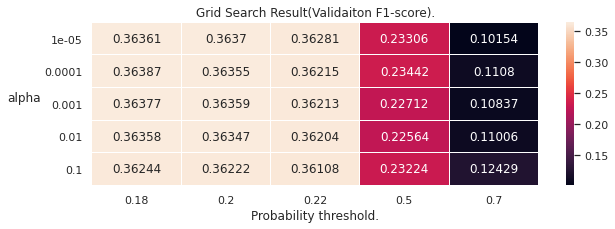

In [ ]:
plt.subplots(figsize=(10,3))
sns.heatmap(f_score_cv_list,annot=True,fmt='.5g',linewidths=0.01,
            xticklabels=prob_thresh,yticklabels=alpha_list)
plt.xlabel('Probability threshold.')
plt.ylabel('alpha',rotation=0,labelpad=20)
plt.title('Grid Search Result(Validaiton F1-score).');

In [ ]:
print("Classifier having best cross-validation F1-score:")
print('-'*50)
print(best_clf)
print('Prob threshold:'.ljust(15),best_th)
print('alpha:'.ljust(15),best_alpha)
print('Train F1-score:'.ljust(15),best_score_tr)
print('CV F1-score:'.ljust(15),best_score_cv)

Classifier having best cross-validation F1-score:
--------------------------------------------------
CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1,
                                                    penalty='elasticnet',
                                                    power_t=0.5,
                       

### Best Classifier:
- alpha = 1e-4
- Probability threshold = 0.18

In [ ]:
%%time
best_alpha = 1e-4
best_th = 0.18
clf = SGDClassifier(loss='log',
                        alpha=best_alpha,
                        class_weight='balanced',
                        penalty='elasticnet',
                        n_jobs=-1,
                        random_state=34)
    
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)\
            .split(dataset.loc[dataset.eval_set=='train',ftrs],
                    dataset.loc[dataset.eval_set=='train','reordered'],
                    dataset.loc[dataset.eval_set=='train','order_id'])
            
best_clf = CalibratedClassifierCV(clf,
                                    method='isotonic',
                                    cv=gss,)

best_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
            dataset.loc[dataset.eval_set=='train','reordered'])  

CPU times: user 35.2 s, sys: 6.52 s, total: 41.7 s
Wall time: 36.8 s


In [ ]:
%%time
prob_pred = best_clf.predict_proba(dataset[ftrs])
pred = (prob_pred[:,1]>=best_th).astype(np.uint8)
dataset['log_reg_pred'] = pred

CPU times: user 7.03 s, sys: 4.27 s, total: 11.3 s
Wall time: 4.57 s


Train:


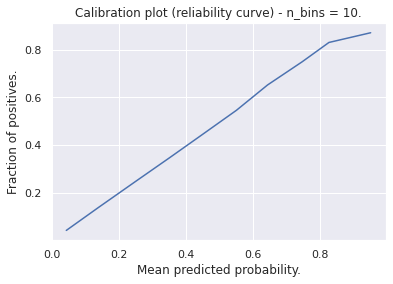

Validation:


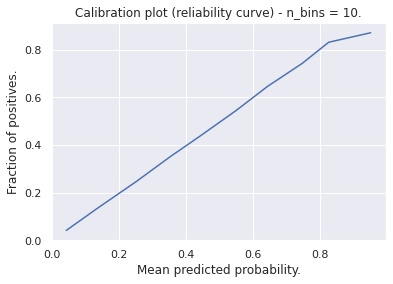

In [ ]:
# checking if probabilities are well calibrated or not
printb('Train:')
eval_set = 'train'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

printb('Validation:')
eval_set = 'cv'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

> Calibration curve is an almost straight line. Hence, the probabilities are well calibrated.

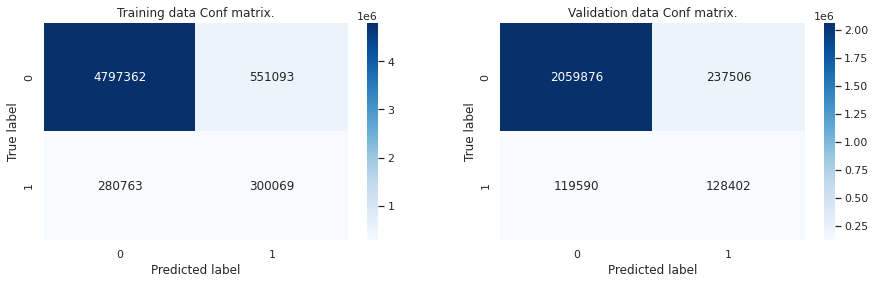

In [ ]:
# confusion matrix
fig,ax = plt.subplots(1,2,figsize=(15,4))
plot_confusion_matrix(dataset.loc[dataset.eval_set=='train','reordered'],
                 dataset.loc[dataset.eval_set=='train','log_reg_pred'],
                 title='Training data Conf matrix.',
                 ax=ax[0])

plot_confusion_matrix(dataset.loc[dataset.eval_set=='cv','reordered'],
                 dataset.loc[dataset.eval_set=='cv','log_reg_pred'],
                 title='Validation data Conf matrix.',
                 ax=ax[1])

In [ ]:
%%time
best_score_tr = f_score(dataset[dataset.eval_set=='train'],
                    target='log_reg_pred',
                    pr_re=False)       
best_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                    target='log_reg_pred',
                    pr_re=False)
print('Train F1-score:'.ljust(15),best_score_tr)
print('CV F1-score:'.ljust(15),best_score_cv)

Train F1-score: 0.3653548339783208
CV F1-score:    0.36378059503346777
CPU times: user 1min 36s, sys: 7.1 s, total: 1min 43s
Wall time: 1min 36s


In [ ]:
tr_acc = accuracy_score(dataset.loc[dataset.eval_set=='train','reordered'],
                        dataset.loc[dataset.eval_set=='train','log_reg_pred'],)
cv_acc = accuracy_score(dataset.loc[dataset.eval_set=='cv','reordered'],
                        dataset.loc[dataset.eval_set=='cv','log_reg_pred'])

print(f'Train Accuracy: {tr_acc*100} %')
print(f'Validation Accuracy: {cv_acc*100} %')

Train Accuracy: 85.97038733324935 %
Validation Accuracy: 85.97078464697134 %


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target='log_reg_pred',
           msg='1st-cut Approach Log-Reg th:0.18')

100% 4.43M/4.43M [00:01<00:00, 2.49MB/s]
Successfully submitted to Instacart Market Basket AnalysisWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission.csv              2021-07-01 19:01:01  1st-cut Approach Log-Reg th:0.18                complete  0.36886      0.36742       
last_order.csv              2021-07-01 16:47:38  reorders of last order as prediction            complete  0.32768      0.32763       
last_order.csv              2021-07-01 16:34:08  purchases of last order as reorder              complete  0.31180      0.31202       
random_k_prod.csv           2021-07-01 16:21:23  k most reordered prod(weighted) by user         complete  0.248

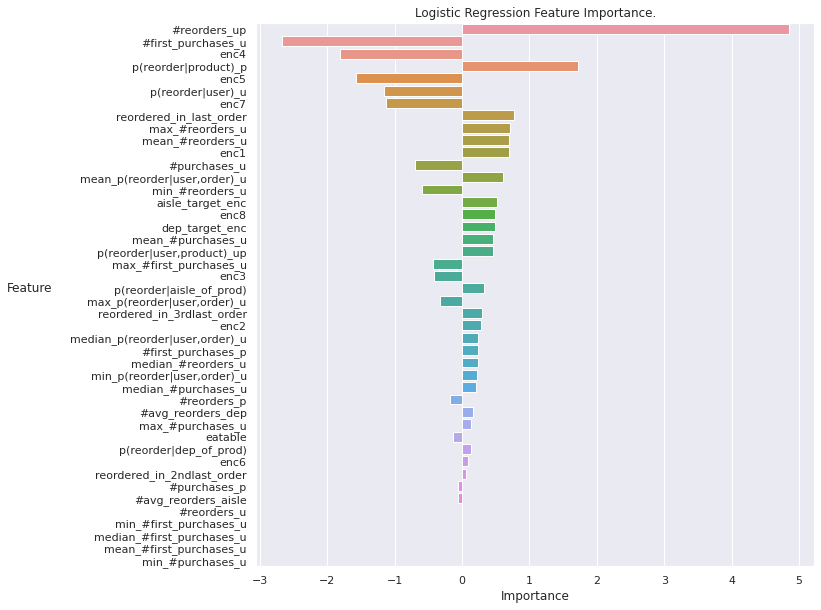

In [ ]:
ftr_imp = plot_feature_importance(best_clf.calibrated_classifiers_[0].base_estimator.coef_[0],
                                  ftrs,
                                  'Logistic Regression',
                                  figsize=(10,10),
                                  return_ftr_imp=True);

In [ ]:
# Saving
pickle.dump(best_clf,open('best_Log_Reg.pkl','wb'))

In [ ]:
best_clf = pickle.load(open('/content/best_Log_Reg.pkl','rb'))

In [ ]:
dataset.to_feather('dataset.feather')
kaggle_file_uploader(files = ['/content/dataset.feather'],
                     id = 'shubhamscifi/instacart',
                     title = 'instacart',
                     folder = 'data',
                     msg = 'dataset with log-reg prediction',
                     del_after_upload=False)

Data package template written to: data/dataset-metadata.json
Starting upload for file dataset-unscaled.feather
100% 529M/529M [00:10<00:00, 54.8MB/s]
Upload successful: dataset-unscaled.feather (529MB)
Starting upload for file dataset.feather
100% 0.99G/0.99G [00:16<00:00, 62.8MB/s]
Upload successful: dataset.feather (1014MB)
Starting upload for file dataset-prev.feather
100% 603M/603M [00:12<00:00, 50.1MB/s]
Upload successful: dataset-prev.feather (603MB)
Dataset version is being created. Please check progress at /api/v1/datasets/status/shubhamscifi/instacart




---



## More feature Engineering

- **order_number:** order number of the future order of user.
- **days_since_prior_order:** days_since_prior_order of the future order of user.
- **avg_#reorders_hour:** Avg of no. of reorders of all prior orders at a given hour.
- **p(reorder|hour_of_day):** (Total no. of reorders)/(Total no. of purchases) at a given hour.
- **avg_#reorders_dow:** Avg of no. of reorders of all prior orders at a given day of week.
- **p(reorder|dow):** (Total no. of reorders)/(Total no. of purchases) at a given day of week.
- **avg_#reorders_order_number:** Avg of no. of reorders of all prior orders at a given order_number.
- **p(reorder|order_number):** (Total no. of reorders)/(Total no. of purchases) at a given order_number.
- **#orders_u:** Total no. of prior orders placed by the user.
- **avg_#reorders_dspo:** Avg of no. of reorders of all prior orders at a given days_since_prior_order.
- **p(reorder|dspo):** (Total no. of reorders)/(Total no. of purchases) at a given days_since_prior_order.
- **is_weekly_user:** Is the user a weekly user.
- **is_monthly_user:** Is the user a monthly user.
- **Median_lifetime_days_gap_up:** Median no. of days gap after which the user purchases the product again.
- **Max_lifetime_days_gap_up:** Max no. of days gap after which the user purchases the product again.
- **Median_lifetime_orders_gap_up:** Median of no. of orders gap after which the user purchases the product again.
- **Max_lifetime_orders_gap_up:** Max of no. of orders gap after which the user purchases the product again.
- **#none_orders_u:** No. of None orders placed by the user.
- **fraction_none_orders_u:** (No. of None orders)/(Total no. of orders) placed by the user.
- **Median_days_gap_none_order_u:** Median of days gap after which the user places a None order again.
- **Max_days_gap_none_order_u:** Max of days gap after which the user places a None order again.
- **Median_orders_gap_none_order_u:** Median of no. of orders gap after which the user places a None order again.
- **Max_orders_gap_none_order_u:** Max of no. of orders gap after which the user places a None order again.
- **median_add_to_cart_order_p:** Median add_to_cart_order of product.
- **p(reorder|add_to_cart_order):** (No. of reorders)/(No. of purchases) for the prior products at the given add_to_cart_order of product.
- **#purchases_in_last_3_orders_up:** No. of times user has purchased the given product in his/her last 3 orders.
- **user_base_like_p:** No. of distinct users who have reordered the product atleast once.
- **user_base_dislike_p:** No. of distinct users who have purchased the product but then never reordered it.
- **user_base_unknown_p:** No. of distinct users who have never purchased the product.
- **avg_#reorders_hour_p:** Avg no. of reorders in all the prior orders that are placed at the hour at which the product is averagely purchased.
- **p(reorder|hour_of_day)_p:** Probability of reorder in all the prior orders that are placed at the hour at which the product is averagely purchased.
- **avg_#reorders_dow_p:** Avg no. of reorders in all the prior orders that are placed at the day of week at which the product is averagely purchased.
- **p(reorder|dow)_p:** Probability of reorder in all the prior orders that are placed at the day of week at which the product is averagely purchased.
- **purchase_weight_days_up:** Weight of user-product pair based on frequency of purchase and recency(days) of purchase.
- **reorder_weight_days_up:** Weight of user-product pair based on frequency of reorder and recency(days) of reorder.
- **purchase_weight_order_up:** Weight of user-product pair based on frequency of purchase and recency(order) of purchase.
- **reorder_weight_order_up:** Weight of user-product pair based on frequency of reorder and recency(order) of reorder.
- **change_avg_order_hour_of_day_p:** Absolute change in order's hour_of_day and product's avg order hour_of_day.
- **change_avg_order_dow_p:** Absolute change in order's day_of_week and product's avg order day_of_week.
- **#orders_since_last_none_order_up:** No. of orders placed since user's last None order.
- **days_since_last_none_order_up:** No. of days passed since user's last None order.
- **exceed_in_median_days_gap_none_order_u:** days_since_last_none_order_up - Median_days_gap_none_order_u
- **exceed_in_max_days_gap_none_order_up:** days_since_last_none_order_up - Max_days_gap_none_order_u
- **exceed_in_median_orders_gap_none_order_u:** days_since_last_none_order_up - Median_orders_gap_none_order_u
- **exceed_in_max_orders_gap_none_order_up:** days_since_last_none_order_up - Max_orders_gap_none_order_u
- **#reorders_in_last_3_orders_up:** No. of times user has reordered the given product in his/her last 3 orders.
- **#orders_since_last_purchase_up:** No. of orders placed by the user after his/her last purchase of the given product.
- **days_since_last_purchase_up:** No. of days passed after the last purchase of the given product by the user.
- **exceed_in_median_lifetime_days_up:** days_since_last_purchase_up - Median_lifetime_days_gap_up
- **exceed_in_max_lifetime_days_up:** days_since_last_purchase_up - Max_lifetime_days_gap_up
- **exceed_in_median_lifetime_orders_up:** #orders_since_last_purchase_up - Median_lifetime_orders_gap_up
- **exceed_in_max_lifetime_orders_up:** #orders_since_last_purchase_up - Max_lifetime_orders_gap_up

### order_hour_of_day

In [ ]:
hour_of_day_info = prior_data[prior_data.order_number!=1]\
                            .groupby(['order_id','order_hour_of_day'],as_index=False)\
                            .agg(**{'#reorders': ('reordered','sum'),
                                    '#purchases': ('reordered','count')})
hour_of_day_info = hour_of_day_info.groupby(['order_hour_of_day'],as_index=False)\
                            .agg(**{'avg_#reorders_hour': ('#reorders','mean'),
                                    '#reorders': ('#reorders','sum'),
                                    '#purchases': ('#purchases','sum')})
hour_of_day_info['p(reorder|hour_of_day)'] = hour_of_day_info['#reorders']/hour_of_day_info['#purchases']
hour_of_day_info.drop(columns=['#purchases','#reorders'],inplace=True,)
hour_of_day_info.head(3)

order_hour_of_day  avg_#reorders_hour  p(reorder|hour_of_day)
0                  0            6.228432                0.608057
1                  1            5.954034                0.596218
2                  2            5.885644                0.601381

### order_dow

In [ ]:
dow_info = prior_data[prior_data.order_number!=1]\
                            .groupby(['order_id','order_dow'],as_index=False)\
                            .agg(**{'#reorders': ('reordered','sum'),
                                    '#purchases': ('reordered','count')})
dow_info = dow_info.groupby(['order_dow'],as_index=False)\
                            .agg(**{'avg_#reorders_dow': ('#reorders','mean'),
                                    '#reorders': ('#reorders','sum'),
                                    '#purchases': ('#purchases','sum')})
dow_info['p(reorder|dow)'] = dow_info['#reorders']/dow_info['#purchases']
dow_info.drop(columns=['#purchases','#reorders'],inplace=True,)
dow_info

order_dow  avg_#reorders_dow  p(reorder|dow)
0          0           6.999193        0.628329
1          1           6.557553        0.644431
2          2           6.007180        0.629552
3          3           5.827394        0.625348
4          4           5.940309        0.629098
5          5           6.268048        0.633661
6          6           6.625115        0.616244

### order_number

In [ ]:
order_number_info = (
    prior_data[prior_data.order_number!=1]\
                .groupby(['order_id','order_number'],as_index=False)\
                .agg(**{'#reorders': ('reordered','sum'),
                        '#purchases': ('reordered','count')})
)
order_number_info = (
    order_number_info.groupby(['order_number'],as_index=False)\
                .agg(**{'avg_#reorders_order_number': ('#reorders','mean'),
                        '#reorders': ('#reorders','sum'),
                        '#purchases': ('#purchases','sum')})
)
order_number_info['p(reorder|order_number)'] = order_number_info['#reorders']/order_number_info['#purchases']
order_number_info.drop(columns=['#purchases','#reorders'],inplace=True,)
order_number_info.head(3)

order_number  avg_#reorders_order_number  p(reorder|order_number)
0             2                    2.705435                 0.272361
1             3                    3.841544                 0.386282
2             4                    4.578588                 0.458345

In [ ]:
# Total no. of orders each user has placed in the past.
user_info = orders.loc[orders.eval_set=='prior',['user_id','order_number']]\
                    .groupby('user_id',as_index=False)['order_number'].max()\
                    .rename(columns={'order_number':'#orders_u'})
user_info.head(3)

user_id  #orders_u
0        1         10
1        2         14
2        3         12

### days_since_prior_order

In [ ]:
days_since_prior_order_info = (
    prior_data[prior_data.order_number!=1]\
                .groupby(['order_id','days_since_prior_order'],as_index=False)\
                .agg(**{'#reorders': ('reordered','sum'),
                        '#purchases': ('reordered','count')})
)
days_since_prior_order_info = (
    days_since_prior_order_info.groupby(['days_since_prior_order'],as_index=False)\
                .agg(**{'avg_#reorders_dspo': ('#reorders','mean'),
                        '#reorders': ('#reorders','sum'),
                        '#purchases': ('#purchases','sum')})
)
days_since_prior_order_info['p(reorder|dspo)'] = days_since_prior_order_info['#reorders']/days_since_prior_order_info['#purchases']
days_since_prior_order_info.drop(columns=['#purchases','#reorders'],inplace=True,)
days_since_prior_order_info.head(3)

days_since_prior_order  avg_#reorders_dspo  p(reorder|dspo)
0                     0.0            5.144314         0.738757
1                     1.0            4.122061         0.617624
2                     2.0            5.036607         0.645439

### Weekly and Monthly customers

In [ ]:
user = orders.groupby('user_id')['days_since_prior_order']\
                    .agg(['mean']).reset_index()

# weekly customer: customers whose avg days_since_prior_order is between 6-8
weekly_user = user.loc[user['mean'].between(6,8),['user_id']].reset_index(drop=True)
weekly_user['is_weekly_user'] = 1

# monthly customer: customers whose avg days_since_prior_order is between 28-30
monthly_user = user.loc[(user['mean'].between(28,30)), ['user_id']].reset_index(drop=True)
monthly_user['is_monthly_user'] = 1
del user

### days_since_first_order
- No. of days passed since the user's very 1st order.

In [ ]:
# adding days_since_first_order column to orders and prior_data tables.
orders['days_since_first_order'] = orders.groupby(['user_id'])['days_since_prior_order'].cumsum()
orders['days_since_first_order'] = orders['days_since_first_order'].fillna(0)

prior_data = prior_data.merge(orders[['order_id','days_since_first_order']],on=['order_id'])
prior_data.sort_values(['user_id','order_number','add_to_cart_order'],
                       inplace=True,
                       axis='index',
                       ignore_index=True)
prior_data.head(3)

order_id  user_id  ... reordered  days_since_first_order
0   2539329        1  ...         0                     0.0
1   2539329        1  ...         0                     0.0
2   2539329        1  ...         0                     0.0

[3 rows x 11 columns]

### Lifetime of product
- Once a user purchases a product, after how much time does he/she needs it again.

In [ ]:
# lifetime of product(p) for a user(u): No. of days after which u purchases p again.
def get_lifetime_up(df):
    """
    Returns user's median and max of days & orders gap between every two consecutive purchase of a product.
    """
    days_gap_up = df.days_since_first_order.diff().agg({'Median_lifetime_days_gap_up':'median',
                                                        'Max_lifetime_days_gap_up':'max'})
    orders_gap_up = df.order_number.diff().agg({'Median_lifetime_orders_gap_up':'median',
                                                'Max_lifetime_orders_gap_up':'max'})

    return pd.concat([days_gap_up,orders_gap_up])

prod_lifetime_up = prior_data.groupby(['user_id','product_id'])\
                                    .apply(get_lifetime_up)\
                                    .reset_index()

In [ ]:
# filling nan in  with mean lifetime of the same products
filled_nan = prod_lifetime_up.groupby("product_id")\
                        [['Median_lifetime_days_gap_up','Max_lifetime_days_gap_up','Median_lifetime_orders_gap_up','Max_lifetime_orders_gap_up']]\
                        .transform(lambda x: x.fillna(x.mean()))
prod_lifetime_up['Median_lifetime_days_gap_up'] = filled_nan['Median_lifetime_days_gap_up']
prod_lifetime_up['Max_lifetime_days_gap_up'] = filled_nan['Max_lifetime_days_gap_up']
prod_lifetime_up['Median_lifetime_orders_gap_up'] = filled_nan['Median_lifetime_orders_gap_up']
prod_lifetime_up['Max_lifetime_orders_gap_up'] = filled_nan['Max_lifetime_orders_gap_up']
del filled_nan
prod_lifetime_up.head(3)

user_id  ...  Max_lifetime_orders_gap_up
0        1  ...                    1.000000
1        1  ...                    1.000000
2        1  ...                    6.052841

[3 rows x 6 columns]

In [ ]:
# Some products are purchased 1st time but never reordered by its user.
# setting a very high lifetime value for such products.
prod_lifetime_up.fillna(value=9999, inplace=True)
prod_lifetime_up.head(3)

user_id  ...  Max_lifetime_orders_gap_up
0        1  ...                    1.000000
1        1  ...                    1.000000
2        1  ...                    6.052841

[3 rows x 6 columns]

In [ ]:
prod_lifetime_up.to_feather('prod_lifetime_up.feather')

### None orders
- An order is a None order when **none of the products purchased is a reorder**.

In [ ]:
# What is the count and fraction of None orders by each user?
none_info = prior_data[prior_data.order_number!=1]\
                    .groupby(['user_id','order_id','order_number','days_since_first_order'],
                             as_index=False)\
                    ['reordered'].sum()\
                    .rename(columns={'reordered':'#reorders'})
none_info['is_none_order'] = (none_info['#reorders']==0).astype('uint8')
none_orders_count = none_info.groupby('user_id',as_index=False)\
                                .agg(**{'#none_orders_u':('is_none_order','sum'),
                                        'fraction_none_orders_u':('is_none_order','mean')})
none_orders_count.head(3)

user_id  #none_orders_u  fraction_none_orders_u
0        1               0                0.000000
1        2               1                0.076923
2        3               0                0.000000

In [ ]:
# Information of user's last none order
none_info = none_info[none_info['is_none_order']==1]
none_info = none_info.drop(columns=['#reorders','is_none_order'])
none_info.sort_values(by=['user_id','order_number'],
                      inplace=True,
                      axis='index',
                      ignore_index=True)
user_most_recent_none_order = (
    none_info.drop_duplicates(['user_id'],keep='last',ignore_index=True)\
    [['user_id','order_number','days_since_first_order']]\
    .rename(columns={'days_since_first_order' : 'days_since_first_order_last_none_order_u',
                     'order_number' : 'order_number_last_none_order_u'})
)
user_most_recent_none_order.head(3)

user_id  ...  days_since_first_order_last_none_order_u
0        2  ...                                     185.0
1        4  ...                                      55.0
2        6  ...                                      18.0

[3 rows x 3 columns]

In [ ]:
# How often does a user places a None order?
def get_stats_of_consecutive_none_order(df):
    """
    Returns user's median and max of days & orders gap between every two consecutive None order.
    """
    days_gap = df.days_since_first_order.diff().agg({'Median_days_gap_none_order_u':'median',
                                                     'Max_days_gap_none_order_u':'max'})
    orders_gap = df.order_number.diff().agg({'Median_orders_gap_none_order_u':'median',
                                             'Max_orders_gap_none_order_u':'max'})

    return pd.concat([days_gap,orders_gap])

none_info = none_info.groupby(['user_id'])\
                        .apply(get_stats_of_consecutive_none_order)\
                        .reset_index()
none_info = none_info.fillna(value=none_info.mean())
none_info.head(3)

user_id  ...  Max_orders_gap_none_order_u
0        2  ...                     6.453813
1        4  ...                     2.000000
2        6  ...                     6.453813

[3 rows x 5 columns]

### add_to_cart_order

In [ ]:
add_to_cart_order_info = prior_data[prior_data.order_number!=1]\
                            .groupby(['add_to_cart_order'],as_index=False)\
                            .agg(**{'#reorders': ('reordered','sum'),
                                    '#purchases': ('reordered','count')})
add_to_cart_order_info['p(reorder|add_to_cart_order)'] = add_to_cart_order_info['#reorders']/add_to_cart_order_info['#purchases']
add_to_cart_order_info.drop(columns=['#purchases','#reorders'],inplace=True,)
add_to_cart_order_info.head(3)

add_to_cart_order  p(reorder|add_to_cart_order)
0                  1                      0.723970
1                  2                      0.722250
2                  3                      0.702757

### Median add_to_cart_order of each product.

In [ ]:
prod_add_to_cart_order = prior_data.groupby('product_id',as_index=False)\
                                    ['add_to_cart_order'].median()\
                                    .rename(columns={'add_to_cart_order':'median_add_to_cart_order_p'})

prod_add_to_cart_order['median_add_to_cart_order_p'] = np.round(prod_add_to_cart_order['median_add_to_cart_order_p'],0)
prod_add_to_cart_order.head(3)

product_id  median_add_to_cart_order_p
0           1                         4.0
1           2                         8.0
2           3                         4.0

### No. of times product is purchased in user's last three orders.

In [ ]:
last_order_number = prior_data.groupby(['user_id'],as_index=False)\
                                ['order_number'].max()\
                                .rename(columns={'order_number':'last_order_number'})
prior_data = prior_data.merge(last_order_number,on='user_id')
purchase_in_last_3_orders = prior_data[(prior_data.order_number>(prior_data.last_order_number - 3))]\
                                        .groupby(['user_id','product_id'],as_index=False)\
                                        ['reordered'].count()\
                                        .rename(columns={'reordered':'#purchases_in_last_3_orders_up'})
del last_order_number,prior_data['last_order_number']
purchase_in_last_3_orders.head(3)

user_id  product_id  #purchases_in_last_3_orders_up
0        1         196                               3
1        1       10258                               3
2        1       12427                               3

### User base of a product
1. user_base_like_p: No. of customers who like the product.( user reordered the product)
2. user_base_dislike_p: No. of customers who dislike the product. (user purchased but never reordered)
3. user_base_unknown_p: No. of customers who don't know about the product.(user never purchased the product)

In [ ]:
user_prod = (prior_data
            .groupby(['user_id','product_id'],
                     as_index=False)['reordered']
             .sum()
             .rename(columns={'reordered':'#reorders_up'})
)
user_prod.head(3)

user_id  product_id  #reorders_up
0        1         196             9
1        1       10258             8
2        1       10326             0

In [ ]:
def get_user_base(df):
    user_base_like = len(df[df['#reorders_up']!=0])
    user_base_dislike = len(df[df['#reorders_up']==0])
    return pd.Series(data={'user_base_like_p'   : user_base_like,
                           'user_base_dislike_p': user_base_dislike})

user_base = user_prod.groupby('product_id',as_index=False).apply(get_user_base)
del user_prod
total_user_count = len(orders.user_id.unique())
user_base['user_base_unknown_p'] = total_user_count - (user_base['user_base_like_p'] + user_base['user_base_dislike_p'])
user_base.head(3)

product_id  user_base_like_p  user_base_dislike_p  user_base_unknown_p
0           1               276                  440               205493
1           2                 8                   70               206131
2           3                36                   38               206135

### Product average hour_of_day and day_of_week.

In [ ]:
prod_time = prior_data.groupby('product_id',as_index=False)['order_hour_of_day'].mean().round()
temp = prior_data.groupby('product_id',as_index=False)['order_dow'].mean().round()
prod_time = prod_time.merge(temp,on='product_id')\
                        .rename(columns={'order_hour_of_day':'avg_order_hour_of_day_p',
                                         'order_dow': 'avg_order_dow_p'})
del temp
prod_time.head(3)

product_id  avg_order_hour_of_day_p  avg_order_dow_p
0           1                     13.0              3.0
1           2                     13.0              3.0
2           3                     12.0              3.0

In [ ]:
prod_time = prod_time.merge(hour_of_day_info,
                            left_on=['avg_order_hour_of_day_p'],
                            right_on=['order_hour_of_day'])
del prod_time['order_hour_of_day']
prod_time = prod_time.merge(dow_info,
                            left_on=['avg_order_dow_p'],
                            right_on=['order_dow'])
del prod_time['order_dow']
prod_time.rename(columns={'avg_#reorders_hour':'avg_#reorders_hour_p',
                          'p(reorder|hour_of_day)':'p(reorder|hour_of_day)_p',
                          'avg_#reorders_dow':'avg_#reorders_dow_p',
                          'p(reorder|dow)':'p(reorder|dow)_p'},
                 inplace=True)
prod_time.head()

product_id  avg_order_hour_of_day_p  ...  avg_#reorders_dow_p  p(reorder|dow)_p
0           1                     13.0  ...             5.827394          0.625348
1           2                     13.0  ...             5.827394          0.625348
2           8                     13.0  ...             5.827394          0.625348
3          10                     13.0  ...             5.827394          0.625348
4          11                     13.0  ...             5.827394          0.625348

[5 rows x 7 columns]

### User's most recent purchase of product

In [ ]:
# Information of user's most recent purchase of the product.
most_recent_purchase_up = prior_data.drop_duplicates(['user_id','product_id'],keep='last')[['user_id','product_id','order_number','days_since_first_order']]
most_recent_purchase_up.rename(columns={'days_since_first_order': 'days_since_first_order_last_purchase_up',
                                        'order_number'          : 'last_purchase_order_number_up'}, 
                               inplace=True)
most_recent_purchase_up.head(3)

user_id  ...  days_since_first_order_last_purchase_up
1         1  ...                                      0.0
9         1  ...                                     15.0
15        1  ...                                     36.0

[3 rows x 4 columns]

### Future order information.

In [ ]:
# order information of future order ids.
future_order_info = orders[orders.eval_set!='prior']
del future_order_info['eval_set']
future_order_info.head(3)

order_id  user_id  ...  days_since_prior_order  days_since_first_order
10   1187899        1  ...                    14.0                   190.0
25   1492625        2  ...                    30.0                   228.0
38   2774568        3  ...                    11.0                   144.0

[3 rows x 7 columns]

### Giving recent purchases more weight than older ones.
- Weight Decay based on recency.
- The more a user purchases/reorders the product, the more the weight.

In [ ]:
# recency_order: How many orders back was the order placed?
# recency_days: How many days back was the order placed?
weight_decay = prior_data[['user_id','product_id','order_number','days_since_first_order','reordered']].merge(future_order_info[['user_id','order_number','days_since_first_order']],on='user_id',suffixes=('','_future'),)
weight_decay['recency_order'] = weight_decay['order_number_future'] - weight_decay['order_number']
weight_decay['recency_days'] = weight_decay['days_since_first_order_future'] - weight_decay['days_since_first_order']
weight_decay.head(3)

user_id  product_id  ...  recency_order  recency_days
0        1         196  ...             10         190.0
1        1       14084  ...             10         190.0
2        1       12427  ...             10         190.0

[3 rows x 9 columns]

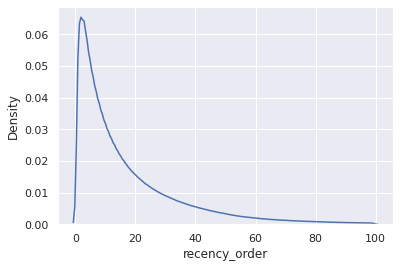

In [ ]:
sns.kdeplot(data=weight_decay,x='recency_order')

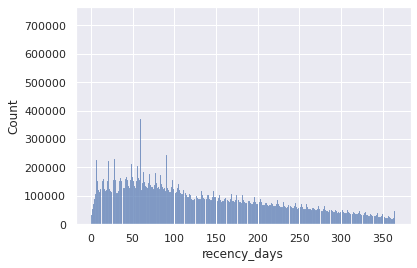

In [ ]:
sns.histplot(data=weight_decay,x='recency_days')

In [ ]:
dataset= pd.read_feather('dataset.feather')

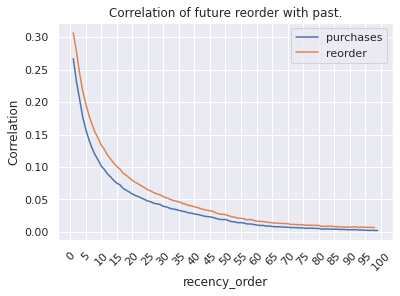

In [ ]:
# How much is the future reorder correlated with the past purcahses and reorders based on orders gap?
recency_list_order = sorted(weight_decay.recency_order.unique())
corr_pur_list_order = []
corr_reord_list_order = [] 
for recency in recency_list_order:
    weight_decay['purchase_weight_order'] = 0
    weight_decay.loc[weight_decay.recency_order==recency,'purchase_weight_order'] = 1
    weight_decay['reorder_weight_order'] = weight_decay['reordered']*weight_decay['purchase_weight_order']
    df = weight_decay.groupby(['user_id','product_id'],as_index=False)[['purchase_weight_order','reorder_weight_order']].sum()
    df = df.merge(dataset[['user_id','product_id','reordered','eval_set']],on=['user_id','product_id'])
    corr_pur = df.loc[df.eval_set=='train','purchase_weight_order'].corr(df.loc[df.eval_set=='train','reordered'],)
    corr_reord = df.loc[df.eval_set=='train','reorder_weight_order'].corr(df.loc[df.eval_set=='train','reordered']) 
    corr_pur_list_order.append(corr_pur)
    corr_reord_list_order.append(corr_reord)
plt.plot(recency_list_order,corr_pur_list_order,label='purchases')
plt.plot(recency_list_order,corr_reord_list_order,label='reorder')
plt.xticks(range(0,101,5),rotation=45)
plt.legend()
plt.xlabel('recency_order')
plt.ylabel('Correlation')
plt.title('Correlation of future reorder with past.')
plt.show()

In [ ]:
# recency_list_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
# corr_pur_list_order = [0.2668280928682746, 0.2320996359047009, 0.20533519910323805, 0.17784803557016762, 0.1582815717892301, 0.14250743777643268, 0.12938585996788177, 0.11893415534767943, 0.11063338568765067, 0.10148809498878711, 0.09603742111872386, 0.0893584321084112, 0.08479597753041299, 0.07939561013364317, 0.07513307011815105, 0.07259068762159572, 0.06720582303314354, 0.06435167161227213, 0.0615597463735406, 0.05847646949135879, 0.056079021430445006, 0.054172706284917924, 0.051869154523953735, 0.04979390979807281, 0.04748601551672607, 0.04638764892567949, 0.04389532342403714, 0.043143762887875636, 0.04213634955169352, 0.039376558422370124, 0.03837843555629439, 0.036568305390431995, 0.035213096699016865, 0.03453184905405174, 0.0332641040158919, 0.0318524072614341, 0.031187922131165773, 0.029321358560369215, 0.02905424303502794, 0.027525927454686638, 0.026788478147750806, 0.025783233118540087, 0.024408275594265224, 0.023676840386840658, 0.023182429789066924, 0.022172647036765237, 0.020763162273343908, 0.019281891909646305, 0.018987578753608726, 0.019097327807029874, 0.017419244794596618, 0.01570025207124487, 0.015445377498246485, 0.014073204512106922, 0.014301540936340078, 0.013551136568874087, 0.01218535619275664, 0.012240835130984208, 0.011514490666757074, 0.010596430316238171, 0.009908497632720475, 0.010044490534652612, 0.008915611862828887, 0.009083377284459121, 0.008449233209849926, 0.007829311715024224, 0.007946232046174494, 0.007660524429064535, 0.0072562712617457665, 0.0072090977749768, 0.006664734250746775, 0.006581956287301868, 0.006517231019061514, 0.006180638471556714, 0.006066642520578219, 0.005385237514731449, 0.0057433201772201905, 0.005632557373660381, 0.005378996388261228, 0.005295994437834474, 0.004054785705020802, 0.004484270448539453, 0.004584310598399934, 0.004196380451318104, 0.004089264567087954, 0.00417192091795145, 0.0036317196628964667, 0.003785855992605996, 0.003505646736574852, 0.0031683482605196975, 0.003357582437114988, 0.0034719975075962147, 0.0028810784112213725, 0.0029890226277359934, 0.002544267088816011, 0.0022462119079982453, 0.0024560778579372205, 0.0021354328866940377, 0.002166716293882253]
# corr_reord_list_order = [0.3067427147489088, 0.2785599337181917, 0.24544978852093893, 0.2178581314734607, 0.1978169085575058, 0.18023475747477125, 0.16601599881019613, 0.15358627159533964, 0.144170378083226, 0.1337574342678048, 0.12705428911317526, 0.11857298412668375, 0.11231134544365488, 0.10614964094196284, 0.10089469194492069, 0.09676221459642743, 0.09063508651607131, 0.0873405659939687, 0.08333160241497026, 0.07941737223598684, 0.07643358522565664, 0.07365817026518065, 0.07066688164637364, 0.06796427817969874, 0.06500143838437102, 0.0629768238302073, 0.06028718426750047, 0.0584102353742034, 0.05688896577675207, 0.05432658378144615, 0.05271665369296893, 0.05049522143946234, 0.04873718689497338, 0.04730396277235254, 0.04647685890209937, 0.04428462578819118, 0.04281016493630424, 0.04091562846318555, 0.04028497997092081, 0.03859673930858013, 0.037386857214298574, 0.03594041916553702, 0.03439236184827929, 0.03330501921323337, 0.0326615622145297, 0.031577921822176315, 0.029161824505014023, 0.027597305148800072, 0.02708740837164394, 0.02656935199252876, 0.024880311264819783, 0.0233327694689947, 0.022546062008007878, 0.02122921311918332, 0.020878631666711542, 0.020222162248754373, 0.018420597985735757, 0.019200923536685593, 0.01783737741726839, 0.016707153238183274, 0.01607068087453255, 0.01610741845178255, 0.015243690306456625, 0.01455799406415641, 0.013991223847165505, 0.013679251537938954, 0.013287977147031163, 0.013118465499127098, 0.012726460085965324, 0.012804216506705806, 0.011501849728250874, 0.011628558476425375, 0.011114419048931179, 0.011194213246901336, 0.010740748182583157, 0.01022893076393762, 0.010341255257856244, 0.010074661700449856, 0.010056382465009603, 0.010126037150471678, 0.008353881855402322, 0.008611459217920735, 0.008872891144602418, 0.008693417953466977, 0.008209474164047085, 0.008136655824496766, 0.007699168063899154, 0.007485157184395367, 0.007505851248734732, 0.007144688073513367, 0.007485176290415874, 0.007829886974671747, 0.006889905879126794, 0.007313423005609981, 0.007106158815509828, 0.006902267461206726, 0.006991982844144218, 0.006593744020375746, np.nan]

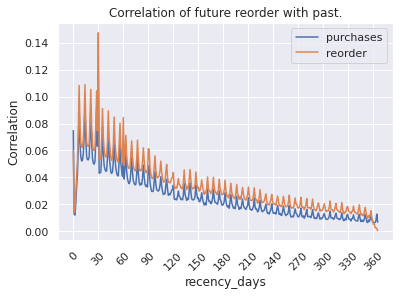

In [ ]:
# How much is the future reorder correlated with the past purcahses and reorders based on days gap?
recency_list_days = sorted(weight_decay.recency_days.unique())
corr_pur_list_days = []
corr_reord_list_days = [] 
for recency in recency_list_days:
    weight_decay['purchase_weight_days'] = 0
    weight_decay.loc[weight_decay.recency_days==recency,'purchase_weight_days'] = 1
    weight_decay['reorder_weight_days'] = weight_decay['reordered']*weight_decay['purchase_weight_days']
    df = weight_decay.groupby(['user_id','product_id'],as_index=False)[['purchase_weight_days','reorder_weight_days']].sum()
    df = df.merge(dataset[['user_id','product_id','reordered','eval_set']],on=['user_id','product_id'])
    corr_pur = df.loc[df.eval_set=='train','purchase_weight_days'].corr(df.loc[df.eval_set=='train','reordered'],)
    corr_reord = df.loc[df.eval_set=='train','reorder_weight_days'].corr(df.loc[df.eval_set=='train','reordered']) 
    corr_pur_list_days.append(corr_pur)
    corr_reord_list_days.append(corr_reord)
plt.plot(recency_list_days,corr_pur_list_days,label='purchases')
plt.plot(recency_list_days,corr_reord_list_days,label='reorder')
plt.xticks(range(0,366,30),rotation=45)
plt.legend()
plt.xlabel('recency_days')
plt.ylabel('Correlation')
plt.title('Correlation of future reorder with past.')
plt.show()

In [ ]:
# recency_list_days = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 355.0, 356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0]
# corr_pur_list_days = [0.07477417939802881, 0.012838499006962132, 0.011995686324486844, 0.02080802371167175, 0.032943050033947256, 0.04285524194828235, 0.063229985300334, 0.09471157983166134, 0.06594344299641555, 0.055287092558826495, 0.05216693048193241, 0.05263780769404096, 0.05769809587097678, 0.07056797893271816, 0.09462525155169445, 0.06835774205802286, 0.055364865092710366, 0.05321760920383057, 0.05311808904163172, 0.05484709874199711, 0.06957176715165417, 0.09177945583077055, 0.066441803235502, 0.0540955811597885, 0.050753052911836544, 0.04979837266291414, 0.05193406706966127, 0.06736207160584402, 0.09084502050496848, 0.06306000241288064, 0.11705489230231454, 0.04304858481294807, 0.04345721497342076, 0.04383658179222508, 0.056710711430998255, 0.07756869914079707, 0.05790812857510681, 0.048692093056577866, 0.04600720632865342, 0.04447125310427386, 0.04490173467300842, 0.054838845558262, 0.07506430169794345, 0.05650162979857076, 0.05008117201938431, 0.04391128329870169, 0.04290734705932714, 0.044131547819916066, 0.052205429781274536, 0.07141068856846652, 0.05375139967083085, 0.04693468476943519, 0.043006182675304004, 0.04143103607627174, 0.041099307097221, 0.05233258558425806, 0.06631093134571955, 0.05064095506364101, 0.045269090850783844, 0.04081541244770213, 0.0635425439047195, 0.03874412504400952, 0.04722457803602901, 0.05892669669411567, 0.04463937412662067, 0.03894774793189232, 0.03643207988565956, 0.035331515023077374, 0.03687933048821326, 0.04390760830086672, 0.05466816805982057, 0.04343418356055836, 0.03762502190087446, 0.03546195064494014, 0.034451581457996254, 0.03483815513682465, 0.042018185053716954, 0.05459772698325683, 0.042919372224090556, 0.036376755646290386, 0.03416880977999116, 0.03560747656840961, 0.03466956163369214, 0.039735354128979286, 0.04916386436016204, 0.04045991447633794, 0.03480430587698826, 0.03333689357924597, 0.03432508967354129, 0.03276285115087827, 0.04726273444256414, 0.04882741081214827, 0.0364000955085058, 0.03194198693066191, 0.02957334163938289, 0.029547708230006933, 0.02986678514992945, 0.03720624346492186, 0.044372622382256734, 0.0347007339465863, 0.030930543319288538, 0.030289159008428088, 0.029809953160166873, 0.030881371942702834, 0.03422514554606688, 0.040563058359806656, 0.033357436684052624, 0.029680550990174453, 0.027244262454245948, 0.028046145268403114, 0.02786109175509929, 0.034510172905825705, 0.038696387482421046, 0.031210357262593958, 0.026716828739111596, 0.027875529017923867, 0.027068120132706066, 0.028565819314345053, 0.03048127691190879, 0.03121042628050228, 0.03418852014054558, 0.0239326973268421, 0.023526903854499372, 0.024085553456643222, 0.02332602107778487, 0.025723280048365202, 0.02987002545475792, 0.025961262056989252, 0.02546422775986688, 0.023526046987860063, 0.0238588831698439, 0.023283926442803, 0.02691064979545623, 0.03546787649441534, 0.027807175140552535, 0.025090780855655203, 0.022901917997705655, 0.024429511270568957, 0.023661478099836108, 0.02978004178458194, 0.035922170538063826, 0.029317710905206913, 0.02412161859486356, 0.02337668852328119, 0.023324197061193742, 0.023646041344874233, 0.025900038358084968, 0.03427091869220968, 0.0279548564960103, 0.02423915041298369, 0.024740710693319234, 0.021890864000376473, 0.02217087356399427, 0.024533192694850214, 0.028628293575908594, 0.024070262777052407, 0.021283537969021726, 0.019468503106677987, 0.021009946978189534, 0.01950900084388602, 0.023605455986974718, 0.03128066213998192, 0.0241336870659429, 0.02194497947549048, 0.022214040351662353, 0.02041674035338808, 0.02141396994948803, 0.024411089502724064, 0.031235884788416143, 0.02469519259780998, 0.02139955837119516, 0.02122811119436432, 0.02059558590985866, 0.019987574167104383, 0.023380816943246396, 0.02997131809005197, 0.02391710265102579, 0.02262485546522866, 0.01961871799357132, 0.01928549006544878, 0.02006312424007035, 0.022260593626151456, 0.028672574958668144, 0.0224747488282273, 0.019171350930426236, 0.0179819015107169, 0.01909447253036408, 0.01708587760852612, 0.021883363315701232, 0.02731130299334627, 0.02106539786847047, 0.019364815168533778, 0.017131759144048433, 0.0177894307666799, 0.016754889533245065, 0.02038924342944827, 0.026057512630404338, 0.019942966048741722, 0.018525482835369297, 0.016248490215725605, 0.017605858495703237, 0.016812365442578435, 0.020061355281174514, 0.0239071442624179, 0.019390482250502487, 0.017444245833977638, 0.016976733720036524, 0.016181647757244885, 0.017688668475248567, 0.019298235406137, 0.02493438697815068, 0.019455616588553357, 0.016286798886202533, 0.0161505675967798, 0.015581721910233368, 0.016452194397929356, 0.018448676192670082, 0.024587350548623023, 0.018300617109833914, 0.016327801741451656, 0.016420456122790826, 0.014380666107180418, 0.015179010024185542, 0.017751150582273646, 0.022981375157558798, 0.01767362036299463, 0.014872697481189091, 0.01447100760055844, 0.015349020290683133, 0.015504553411220087, 0.017981530785009667, 0.02022964563384586, 0.015315918916823417, 0.013174340710801369, 0.013688057558471262, 0.012783566520790709, 0.01491044558653455, 0.016416067064462588, 0.020311273776474566, 0.014881475761767177, 0.013347775833719178, 0.01343583383024836, 0.013695000348447162, 0.012779391878826728, 0.015881654209370766, 0.019106762364862816, 0.015435065322556427, 0.012562937467157104, 0.013226567442112, 0.011919632700248563, 0.011810173695063209, 0.014990009672278032, 0.018621740576303957, 0.014801605263696161, 0.012748628064936722, 0.011571799970113802, 0.012441326345046492, 0.012592173241881954, 0.014799613233146701, 0.01911368732857653, 0.012790032979209087, 0.010679180324262827, 0.010597051193532906, 0.01126118567917212, 0.010618958266439561, 0.013111850480441603, 0.01664201530079218, 0.01347408254789228, 0.012885677227185834, 0.01111909705448395, 0.010568467865500801, 0.011368176433971137, 0.013248585656986039, 0.017169143402475343, 0.011257426802363763, 0.010675890296533675, 0.011428438782367408, 0.009664671572639005, 0.011084551333860911, 0.013300090883209553, 0.016182781593526974, 0.010908305291345512, 0.01106078972306578, 0.010777965653947558, 0.010967485778317347, 0.010164653972840693, 0.012560986331659496, 0.016047673420260516, 0.011889008177363693, 0.009525188227514076, 0.010006957309556528, 0.009349034219987363, 0.009563353541921032, 0.012066710727843665, 0.01366335701927808, 0.010848050677687243, 0.008962812151144051, 0.009876968556454726, 0.009259168192581829, 0.010127519920213409, 0.011601764306872903, 0.013207055853815939, 0.010519390071557815, 0.008950353498277146, 0.008744891241804822, 0.009072331454014464, 0.009432377221770863, 0.011346790131745277, 0.01483822014317096, 0.010033766921157034, 0.00979731915624678, 0.010079118666177151, 0.008855357573936361, 0.009353452199530113, 0.011532633604667167, 0.013403867076362498, 0.009889997499551002, 0.009416742845413564, 0.009485502104530174, 0.008606711467006511, 0.008866042634764626, 0.010131144698661432, 0.01379761944632279, 0.009975192717506017, 0.007899856136452672, 0.008050359979379616, 0.009249905390549408, 0.008424928508552889, 0.011642513378729975, 0.012585754781047256, 0.009647473198877933, 0.00877702810112622, 0.008960351743532298, 0.007649800648501012, 0.009381555412971136, 0.009482094312226635, 0.012167857822210955, 0.009229166347035196, 0.00831027019667641, 0.007772566486692045, 0.00763253816220081, 0.007540159779966121, 0.010945529187731081, 0.012557302719331873, 0.009105914287941752, 0.007141469129453388, 0.008407015917771066, 0.007261659017558639, 0.007303085463871877, 0.009147458731363639, 0.012346224313843936, 0.010554993443678792, 0.006930595799704233, 0.006430649472189423, 0.00832970098415285, 0.007150126046949164, 0.008863472790119713, 0.012008245756725298, 0.008557793964771646, 0.007102343847267761, 0.006304219489110503, 0.006326027983628603, 0.006601416611519578, 0.008204573498182415, 0.012709255921007582, 0.006689968406150319]
# corr_reord_list_days = [0.060046349113919206, 0.013909516845813177, 0.017096306298243904, 0.027623668562355843, 0.04138716890334456, 0.05230861481544428, 0.07427049044099446, 0.10829486349978959, 0.077877074485218, 0.06572437705204652, 0.062488486698421976, 0.06245148381319611, 0.06835894559653835, 0.0829342531046079, 0.10891526752333086, 0.08020712325455738, 0.06613695723220415, 0.06341431916254746, 0.06304866184322591, 0.06484153807621408, 0.08097752084661639, 0.10536693240152034, 0.07790832131438308, 0.06465153806258281, 0.060633226279990945, 0.060035495402979276, 0.061942940070286605, 0.07860497412061879, 0.10429902584431351, 0.0747336557580022, 0.14740682111980968, 0.053251686527962805, 0.05337017943868219, 0.053619963504951546, 0.06878961983857994, 0.09113555953150769, 0.07005773501674913, 0.06052428788095948, 0.05654918739820231, 0.05517333295160284, 0.05598028773556749, 0.06665285748575678, 0.0893476981187945, 0.06872203389909516, 0.06165800762822273, 0.05498043690809325, 0.0527262411765629, 0.05501546982732877, 0.06440989189177575, 0.08490210068211027, 0.06571524186230723, 0.05869189908575587, 0.054126724043151046, 0.0516087780257817, 0.05203897676957489, 0.06428616965385243, 0.08025527835834126, 0.06249483746195054, 0.057006055994643694, 0.05116691449751248, 0.08444839299735286, 0.04883500484924458, 0.0585267605516935, 0.07114105812365873, 0.055812312882326624, 0.04960470694349503, 0.04722918641229637, 0.046631985798370586, 0.047943422168900796, 0.05610636525983266, 0.06710362665609194, 0.05515311867075012, 0.04851660057160779, 0.045831242179968146, 0.044863442252851826, 0.045320956672062894, 0.053388163794393026, 0.06769387971438218, 0.054454583455005194, 0.04678514902952838, 0.0447729131580878, 0.04598969111215106, 0.04518666469481101, 0.051086713092947905, 0.06195798823682355, 0.052561984447986015, 0.04566407899814885, 0.04362557790501509, 0.044907483905891665, 0.04319528414104534, 0.061316530726327576, 0.06058687376137726, 0.04703575694068125, 0.04244079145890746, 0.039842792171100934, 0.039036158384998444, 0.039461520964903705, 0.04801169106496673, 0.05604240833011146, 0.045446902141619706, 0.040818866122672895, 0.03988194468797702, 0.040069771347713175, 0.041011499983127364, 0.045148897809365915, 0.052107267179455415, 0.04359689141831363, 0.03978311928254019, 0.03642706635420693, 0.03697066247183476, 0.0371740377958685, 0.044157565430682055, 0.04958312892937717, 0.040383703266675126, 0.03632104131781548, 0.03648333611237014, 0.03587725083493034, 0.03716906298117083, 0.03948657252339833, 0.040286941319547694, 0.043581156755987636, 0.03292407693464447, 0.03177499425999949, 0.03293595907532007, 0.03197515398392774, 0.03493884901243198, 0.03929510602122493, 0.034664011531725346, 0.03429823566748739, 0.03216482613907671, 0.032473694656148806, 0.031399007808576074, 0.0359080712024944, 0.04548161598107524, 0.03655863558600716, 0.03378140198366537, 0.030941950210689215, 0.03323082302314449, 0.03198462033694428, 0.039036488963583985, 0.045850705314190145, 0.038240750136553925, 0.03222405405351515, 0.0313980710269162, 0.03213311701127479, 0.03207941935481459, 0.03478443877316916, 0.04399788829357572, 0.036124065713350376, 0.032040797561288505, 0.032761441097133456, 0.02976042403479148, 0.0303104527697536, 0.03326049706055516, 0.038110417241121484, 0.0331616566609175, 0.030204436328118426, 0.02748605120522639, 0.029065882391672147, 0.028171009121122498, 0.03210195690792091, 0.04033065769142132, 0.03214507544618402, 0.029920701298130407, 0.029656771201795443, 0.02789193903682876, 0.02962453286649992, 0.03229448900406973, 0.04010310556177765, 0.03257699153911544, 0.029057837498988902, 0.029171789492499777, 0.027226276918829923, 0.027716032770937624, 0.030856093370349606, 0.03868031235932774, 0.03203627981516748, 0.030069143962684307, 0.027324806603172314, 0.027155660499205887, 0.027682405640994733, 0.030678763159399963, 0.03786774532843878, 0.030464485428506348, 0.02671047010458849, 0.02547180640673548, 0.026840693894119284, 0.024651528559152945, 0.02963483585550863, 0.03567566958560112, 0.028772974664696315, 0.027223712935147335, 0.024802400317477713, 0.025211692499398825, 0.02392853781492037, 0.02841241867552059, 0.03482351071086681, 0.02799002220450996, 0.026069726769393075, 0.023781590987517597, 0.025563643446804892, 0.023770193059499848, 0.028235051194365195, 0.032526301083197526, 0.0274956223915474, 0.02481599883532101, 0.02385484053675922, 0.023102567543919327, 0.02464397708695305, 0.02684001275440062, 0.03284147265011676, 0.02714772628415762, 0.023188063028365468, 0.02288390046133239, 0.022692025834646082, 0.023534596323952967, 0.026147984686750152, 0.03231309560015959, 0.025754517993296287, 0.02302437913651246, 0.02319988148540371, 0.02084468862757643, 0.02189789095749921, 0.025221104898690203, 0.03094109734415652, 0.024913480312410287, 0.02124659615381797, 0.02141085724818514, 0.0219164856514455, 0.022238259844703966, 0.025209533655629633, 0.027839539969326695, 0.022195772638220646, 0.01959165661302512, 0.020127744374650456, 0.019420301918716434, 0.02166085443989223, 0.023555047197324996, 0.027309579810139737, 0.02226569179564445, 0.0204155381959992, 0.020060350984994205, 0.020338072471499036, 0.01945687796657742, 0.0225894264486889, 0.026123976620639745, 0.022667096695881198, 0.01896995567827765, 0.019337461348804964, 0.01836874673266724, 0.018500456301991434, 0.021471991495969494, 0.026004231584664257, 0.021904732732913587, 0.019103075096270863, 0.01812554677131575, 0.018402731362165123, 0.019095177220175712, 0.021586119015511426, 0.026826077321028298, 0.019992859352091944, 0.01763076945000139, 0.017198468224940974, 0.017624086689779606, 0.017219501747640167, 0.02017365725765858, 0.024720221084558316, 0.02021731070274082, 0.02013902367500724, 0.01776208769074858, 0.017152587482687505, 0.01779289545827254, 0.01988072319740012, 0.025226898723566614, 0.018378326712535867, 0.017639431190506726, 0.01795683230836287, 0.01611680819799137, 0.0173817559985874, 0.019945262739742894, 0.024308023924278194, 0.017385290186049573, 0.017487252564908178, 0.01737606966844009, 0.0173247947496796, 0.016353432298174146, 0.01947255690737367, 0.023853464110292853, 0.018512141609116683, 0.015990491038264044, 0.015828714816236898, 0.01526892865199567, 0.016530821818805445, 0.01906024948536723, 0.021011773731191983, 0.017649451381009925, 0.01487120181718723, 0.015975288203833243, 0.01549561895142045, 0.015953892204073446, 0.01776331800326871, 0.02047581586043587, 0.017306027315147604, 0.014734231236748406, 0.015236811383699539, 0.015043914114357782, 0.015347908681739799, 0.018175471424167224, 0.022498637769834202, 0.016311901092899362, 0.015990659162908028, 0.01585398436565783, 0.014270885753259823, 0.015645309083626404, 0.017530071322240742, 0.020654262059362674, 0.016119674111860598, 0.015779683592144815, 0.014931631425309783, 0.014241562479080698, 0.014003049442001802, 0.01652509634405052, 0.021373108438565117, 0.016496072492446372, 0.013136944958511091, 0.013087706642600156, 0.014414152232048054, 0.014480335043488533, 0.01775208013949009, 0.018439672925583298, 0.015060463629920227, 0.01459533051347272, 0.013639909054719053, 0.0131055450780973, 0.014792876910785789, 0.014948382758580734, 0.018709655640383127, 0.014978995711405579, 0.01382036137067379, 0.013728860013876333, 0.013057891858613781, 0.012645189625207786, 0.01627512716032097, 0.019630451083258917, 0.01495376302103684, 0.012016822512103833, 0.012821205772688552, 0.011995815256145983, 0.011633566844892421, 0.01427525175068178, 0.01780364060874024, 0.014418913701903844, 0.010260388788281838, 0.009732743004436396, 0.011587905708322051, 0.010284590308363116, 0.012070943594847849, 0.015221595011535511, 0.009578408359542689, 0.00797649695051519, 0.00511728639667002, 0.005287076538164462, 0.002644557568100536, 0.0026225930463652345, 0.0019465322180169731, 0.0005544211968337207]

In [ ]:
corr_pur_list_days = dict(zip(recency_list_days,corr_pur_list_days))
corr_pur_list_days

{0.0: 0.07477417939802881,
 1.0: 0.012838499006962132,
 2.0: 0.011995686324486844,
 3.0: 0.02080802371167175,
 4.0: 0.032943050033947256,
 5.0: 0.04285524194828235,
 6.0: 0.063229985300334,
 7.0: 0.09471157983166134,
 8.0: 0.06594344299641555,
 9.0: 0.055287092558826495,
 10.0: 0.05216693048193241,
 11.0: 0.05263780769404096,
 12.0: 0.05769809587097678,
 13.0: 0.07056797893271816,
 14.0: 0.09462525155169445,
 15.0: 0.06835774205802286,
 16.0: 0.055364865092710366,
 17.0: 0.05321760920383057,
 18.0: 0.05311808904163172,
 19.0: 0.05484709874199711,
 20.0: 0.06957176715165417,
 21.0: 0.09177945583077055,
 22.0: 0.066441803235502,
 23.0: 0.0540955811597885,
 24.0: 0.050753052911836544,
 25.0: 0.04979837266291414,
 26.0: 0.05193406706966127,
 27.0: 0.06736207160584402,
 28.0: 0.09084502050496848,
 29.0: 0.06306000241288064,
 30.0: 0.11705489230231454,
 31.0: 0.04304858481294807,
 32.0: 0.04345721497342076,
 33.0: 0.04383658179222508,
 34.0: 0.056710711430998255,
 35.0: 0.07756869914079707,


In [ ]:
corr_reord_list_days = dict(zip(recency_list_days,corr_reord_list_days))
corr_reord_list_days

{0.0: 0.060046349113919206,
 1.0: 0.013909516845813177,
 2.0: 0.017096306298243904,
 3.0: 0.027623668562355843,
 4.0: 0.04138716890334456,
 5.0: 0.05230861481544428,
 6.0: 0.07427049044099446,
 7.0: 0.10829486349978959,
 8.0: 0.077877074485218,
 9.0: 0.06572437705204652,
 10.0: 0.062488486698421976,
 11.0: 0.06245148381319611,
 12.0: 0.06835894559653835,
 13.0: 0.0829342531046079,
 14.0: 0.10891526752333086,
 15.0: 0.08020712325455738,
 16.0: 0.06613695723220415,
 17.0: 0.06341431916254746,
 18.0: 0.06304866184322591,
 19.0: 0.06484153807621408,
 20.0: 0.08097752084661639,
 21.0: 0.10536693240152034,
 22.0: 0.07790832131438308,
 23.0: 0.06465153806258281,
 24.0: 0.060633226279990945,
 25.0: 0.060035495402979276,
 26.0: 0.061942940070286605,
 27.0: 0.07860497412061879,
 28.0: 0.10429902584431351,
 29.0: 0.0747336557580022,
 30.0: 0.14740682111980968,
 31.0: 0.053251686527962805,
 32.0: 0.05337017943868219,
 33.0: 0.053619963504951546,
 34.0: 0.06878961983857994,
 35.0: 0.091135559531507

In [ ]:
corr_reord_list_order = dict(zip(recency_list_order,corr_reord_list_order))
corr_reord_list_order

{1: 0.3067427147489088,
 2: 0.2785599337181917,
 3: 0.24544978852093893,
 4: 0.2178581314734607,
 5: 0.1978169085575058,
 6: 0.18023475747477125,
 7: 0.16601599881019613,
 8: 0.15358627159533964,
 9: 0.144170378083226,
 10: 0.1337574342678048,
 11: 0.12705428911317526,
 12: 0.11857298412668375,
 13: 0.11231134544365488,
 14: 0.10614964094196284,
 15: 0.10089469194492069,
 16: 0.09676221459642743,
 17: 0.09063508651607131,
 18: 0.0873405659939687,
 19: 0.08333160241497026,
 20: 0.07941737223598684,
 21: 0.07643358522565664,
 22: 0.07365817026518065,
 23: 0.07066688164637364,
 24: 0.06796427817969874,
 25: 0.06500143838437102,
 26: 0.0629768238302073,
 27: 0.06028718426750047,
 28: 0.0584102353742034,
 29: 0.05688896577675207,
 30: 0.05432658378144615,
 31: 0.05271665369296893,
 32: 0.05049522143946234,
 33: 0.04873718689497338,
 34: 0.04730396277235254,
 35: 0.04647685890209937,
 36: 0.04428462578819118,
 37: 0.04281016493630424,
 38: 0.04091562846318555,
 39: 0.04028497997092081,
 40: 

In [ ]:
corr_reord_list_order[99] = corr_reord_list_order[98]
corr_pur_list_order = dict(zip(recency_list_order,corr_pur_list_order))
corr_pur_list_order

{1: 0.2668280928682746,
 2: 0.2320996359047009,
 3: 0.20533519910323805,
 4: 0.17784803557016762,
 5: 0.1582815717892301,
 6: 0.14250743777643268,
 7: 0.12938585996788177,
 8: 0.11893415534767943,
 9: 0.11063338568765067,
 10: 0.10148809498878711,
 11: 0.09603742111872386,
 12: 0.0893584321084112,
 13: 0.08479597753041299,
 14: 0.07939561013364317,
 15: 0.07513307011815105,
 16: 0.07259068762159572,
 17: 0.06720582303314354,
 18: 0.06435167161227213,
 19: 0.0615597463735406,
 20: 0.05847646949135879,
 21: 0.056079021430445006,
 22: 0.054172706284917924,
 23: 0.051869154523953735,
 24: 0.04979390979807281,
 25: 0.04748601551672607,
 26: 0.04638764892567949,
 27: 0.04389532342403714,
 28: 0.043143762887875636,
 29: 0.04213634955169352,
 30: 0.039376558422370124,
 31: 0.03837843555629439,
 32: 0.036568305390431995,
 33: 0.035213096699016865,
 34: 0.03453184905405174,
 35: 0.0332641040158919,
 36: 0.0318524072614341,
 37: 0.031187922131165773,
 38: 0.029321358560369215,
 39: 0.029054243035

In [ ]:
# idea: the more the correlation the more should be the weight.
weight_decay['purchase_weight_days_up'] = weight_decay.recency_days.map(corr_pur_list_days)
weight_decay.loc[weight_decay.recency_days<=90,'purchase_weight_days_up'] = 1  # this gives better results(experimentation)

weight_decay['reorder_weight_days_up'] = weight_decay.recency_days.map(corr_reord_list_days)
weight_decay.loc[weight_decay.recency_days<=60,'reorder_weight_days_up'] = 1   # this gives better results(experimentation)
weight_decay['reorder_weight_days_up'] = weight_decay['reorder_weight_days_up'] * weight_decay['reordered']

weight_decay['purchase_weight_order_up'] = weight_decay.recency_order.map(corr_pur_list_order)
weight_decay.loc[weight_decay.recency_order<=7,'purchase_weight_order_up'] = 1  # this gives better results(experimentation)

weight_decay['reorder_weight_order_up'] = weight_decay.recency_order.map(corr_reord_list_order)
weight_decay.loc[weight_decay.recency_order<=5,'reorder_weight_order_up'] = 1   # this gives better results(experimentation)
weight_decay['reorder_weight_order_up'] = weight_decay['reorder_weight_order_up'] * weight_decay['reordered']

In [ ]:
weight_agg = weight_decay.groupby(['user_id','product_id'],as_index=False)\
                [['purchase_weight_days_up','reorder_weight_days_up','purchase_weight_order_up','reorder_weight_order_up']]\
                .sum()
weight_agg.head(3)

user_id  product_id  ...  purchase_weight_order_up  reorder_weight_order_up
0        1         196  ...                  7.331056                 5.644007
1        1       10258  ...                  7.229568                 5.499837
2        1       10326  ...                  1.000000                 0.000000

[3 rows x 6 columns]

In [ ]:
del weight_decay,df

### Merging features to the dataset.

In [ ]:
del orders,order_products_prior,order_products_train,products,dep,aisles,prior_data

In [ ]:
dataset.shape

(13307953, 50)

In [ ]:
dataset = dataset.merge(future_order_info, on=['order_id','user_id'], how='left')
dataset = dataset.merge(hour_of_day_info, on=['order_hour_of_day'], how='left')
dataset = dataset.merge(dow_info, on=['order_dow'], how='left')
dataset = dataset.merge(order_number_info, on=['order_number'], how='left')
dataset['avg_#reorders_order_number'] = (
    dataset['avg_#reorders_order_number'].fillna(order_number_info['avg_#reorders_order_number'].mean())
)
dataset['p(reorder|order_number)'] = (
    dataset['p(reorder|order_number)'].fillna(order_number_info['p(reorder|order_number)'].mean())
)
dataset = dataset.merge(user_info, on=['user_id'], how='left')
dataset = dataset.merge(days_since_prior_order_info, on=['days_since_prior_order'], how='left')
dataset = dataset.merge(weekly_user, on=['user_id'], how='left')
dataset = dataset.merge(monthly_user, on=['user_id'], how='left')
dataset['is_weekly_user'] = dataset['is_weekly_user'].fillna(value=0).astype('uint8')
dataset['is_monthly_user'] = dataset['is_monthly_user'].fillna(value=0).astype('uint8')
dataset.head(3)

user_id  product_id  ...  is_weekly_user is_monthly_user
0        2       13176  ...               0               0
1        2       41787  ...               0               0
2        2       32792  ...               0               0

[3 rows x 66 columns]

In [ ]:
del future_order_info,hour_of_day_info,dow_info,user_info,days_since_prior_order_info,weekly_user,monthly_user,order_number_info

In [ ]:
dataset = dataset.merge(prod_lifetime_up, on=['user_id','product_id'], how='left')
dataset = dataset.merge(none_orders_count, on=['user_id'], how='left')
dataset = dataset.merge(user_most_recent_none_order, on=['user_id'], how='left')
dataset = dataset.merge(none_info, on=['user_id'], how='left')
# filling gap of None orders with large values for users who never placed a None order.
dataset['Median_days_gap_none_order_u'] = dataset['Median_days_gap_none_order_u'].fillna(value=9999)
dataset['Max_days_gap_none_order_u'] = dataset['Max_days_gap_none_order_u'].fillna(value=9999)
dataset['Median_orders_gap_none_order_u'] = dataset['Median_orders_gap_none_order_u'].fillna(value=9999)
dataset['Max_orders_gap_none_order_u'] = dataset['Max_orders_gap_none_order_u'].fillna(value=9999)
dataset.head(3)

user_id  ...  Max_orders_gap_none_order_u
0        2  ...                     6.453813
1        2  ...                     6.453813
2        2  ...                     6.453813

[3 rows x 78 columns]

In [ ]:
del prod_lifetime_up,none_orders_count,user_most_recent_none_order,none_info

In [ ]:
dataset = dataset.merge(prod_add_to_cart_order, on=['product_id'], how='left')
dataset = dataset.merge(add_to_cart_order_info,left_on=['median_add_to_cart_order_p'],right_on=['add_to_cart_order'], how='left',)
del dataset['add_to_cart_order']
dataset = dataset.merge(purchase_in_last_3_orders, on=['user_id','product_id'], how='left')
dataset['#purchases_in_last_3_orders_up'] = dataset['#purchases_in_last_3_orders_up'].fillna(value=0)
dataset = dataset.merge(user_base,on=['product_id'], how='left')
dataset = dataset.merge(prod_time,on=['product_id'], how='left')
dataset = dataset.merge(most_recent_purchase_up,on=['user_id','product_id'], how='left')
dataset = dataset.merge(weight_agg,on=['user_id','product_id'], how='left')
dataset.head(3)

user_id  product_id  ...  purchase_weight_order_up reorder_weight_order_up
0        2       13176  ...                  0.079396                0.000000
1        2       41787  ...                  0.229568                0.153586
2        2       32792  ...                  4.494359                2.889635

[3 rows x 96 columns]

In [ ]:
del prod_add_to_cart_order,add_to_cart_order_info,purchase_in_last_3_orders,user_base,prod_time,most_recent_purchase_up,weight_agg

In [ ]:
dataset['change_avg_order_hour_of_day_p'] = abs(dataset['order_hour_of_day'] - dataset['avg_order_hour_of_day_p'])
dataset['change_avg_order_dow_p'] = abs(dataset['avg_order_dow_p'] - dataset['avg_order_dow_p'])

# how many orders have been placed after the last None order by user?
dataset['#orders_since_last_none_order_up'] = dataset['order_number']-dataset['order_number_last_none_order_u']
# how many days have passed after the last None order by user?
dataset['days_since_last_none_order_up'] = dataset['days_since_first_order']-dataset['days_since_first_order_last_none_order_u']
dataset['#orders_since_last_none_order_up'] = dataset['#orders_since_last_none_order_up'].fillna(0)
dataset['days_since_last_none_order_up'] = dataset['days_since_last_none_order_up'].fillna(0)

# Has the no. of days since last None order exceeded the Median/Max days gap of None order?
dataset['exceed_in_median_days_gap_none_order_u'] = dataset['days_since_last_none_order_up']-dataset['Median_days_gap_none_order_u']
dataset['exceed_in_max_days_gap_none_order_up'] = dataset['days_since_last_none_order_up']-dataset['Max_days_gap_none_order_u']

# Has the no. of orders since last None order exceeded the Median/Max orders gap of None order?
dataset['exceed_in_median_orders_gap_none_order_u'] = dataset['#orders_since_last_none_order_up']-dataset['Median_orders_gap_none_order_u']
dataset['exceed_in_max_orders_gap_none_order_up'] = dataset['#orders_since_last_none_order_up']-dataset['Max_orders_gap_none_order_u']

In [ ]:
dataset['#reorders_in_last_3_orders_up'] = (
    dataset['reordered_in_last_order'] + dataset['reordered_in_2ndlast_order'] + dataset['reordered_in_3rdlast_order']
)

# how many orders have been placed after the last purchase of the product?
dataset['#orders_since_last_purchase_up'] = dataset['order_number']-dataset['last_purchase_order_number_up']

# How many days have passed after the last purchase of the product?
dataset['days_since_last_purchase_up'] = dataset['days_since_first_order']-dataset['days_since_first_order_last_purchase_up']

# Has the no. of days since last purchase exceeded the lifetime(days gap) of product?
dataset['exceed_in_median_lifetime_days_up'] = dataset['days_since_last_purchase_up']-dataset['Median_lifetime_days_gap_up']
dataset['exceed_in_max_lifetime_days_up'] = dataset['days_since_last_purchase_up']-dataset['Max_lifetime_days_gap_up']

# Has the no. of orders since last purchase exceeded the lifetime(order gap) of product?
dataset['exceed_in_median_lifetime_orders_up'] = dataset['#orders_since_last_purchase_up']-dataset['Median_lifetime_orders_gap_up']
dataset['exceed_in_max_lifetime_orders_up'] = dataset['#orders_since_last_purchase_up']-dataset['Max_lifetime_orders_gap_up']
dataset.head(3)

user_id  ...  exceed_in_max_lifetime_orders_up
0        2  ...                          8.745263
1        2  ...                          7.000000
2        2  ...                          1.000000

[3 rows x 111 columns]

In [ ]:
dataset = dataset.drop(columns=['last_purchase_order_number_up',
                                'days_since_first_order_last_purchase_up',
                                'days_since_first_order_last_none_order_u',
                                'order_number_last_none_order_u',
                                'days_since_first_order',
                                'order_dow',
                                'order_hour_of_day',
                                'avg_order_hour_of_day_p',
                                'avg_order_dow_p',])
dataset.head(3)

user_id  ...  exceed_in_max_lifetime_orders_up
0        2  ...                          8.745263
1        2  ...                          7.000000
2        2  ...                          1.000000

[3 rows x 102 columns]

In [ ]:
dataset.to_feather('dataset.feather')

In [ ]:
kaggle_file_uploader(['./dataset.feather'],
                     msg='Full Dataset.',)

Data package template written to: data/dataset-metadata.json
Starting upload for file dataset.feather
100% 2.01G/2.01G [00:30<00:00, 71.0MB/s]
Upload successful: dataset.feather (2GB)
Dataset version is being created. Please check progress at /api/v1/datasets/status/shubhamscifi/instacart


In [ ]:
dataset.shape

(13307953, 102)

In [ ]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Columns: 102 entries, user_id to exceed_in_max_lifetime_orders_up
dtypes: category(1), float16(3), float32(8), float64(72), int64(3), uint16(1), uint32(2), uint8(12)
memory usage: 8.2 GB


In [ ]:
dataset = pd.read_feather('dataset.feather')

In [ ]:
ftrs = list(dataset.columns[5:49]) + list(dataset.columns[50:]) # 49th idx is log-reg prediction
print("No. of features in data:",len(ftrs))

No. of features in data: 96


## Decision Tree

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import GroupShuffleSplit
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
# Hyperparameter tuning of further models was taking lot of resources and time becuase
# of the huge dataset. Hence only best classifiers have been shown in the futher models.
clf = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=500,
                             max_features=0.9,
                             random_state=9)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)\
            .split(dataset.loc[dataset.eval_set=='train',ftrs],
                    dataset.loc[dataset.eval_set=='train','reordered'],
                    dataset.loc[dataset.eval_set=='train','order_id'])

calibrated_clf = CalibratedClassifierCV(base_estimator=clf,
                                        method='isotonic',
                                        cv=gss)

calibrated_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
                   dataset.loc[dataset.eval_set=='train','reordered'])

CPU times: user 5min 34s, sys: 9.91 s, total: 5min 44s
Wall time: 5min 42s


In [ ]:
%%time
prob_pred = batch_predict_proba(calibrated_clf,dataset[ftrs],1000)

CPU times: user 34.9 s, sys: 2.09 s, total: 37 s
Wall time: 36.9 s


Train:


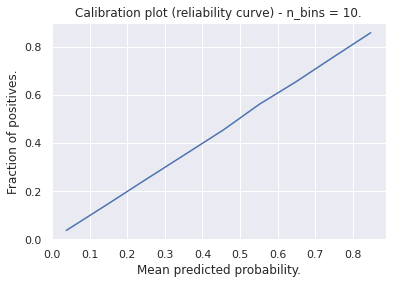

Validation:


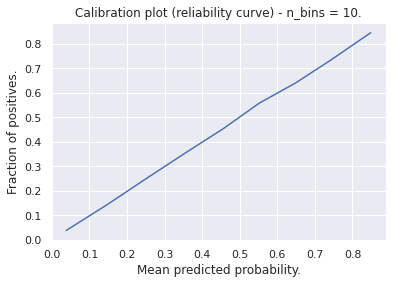

In [ ]:
# checking if probabilities are well calibrated or not
printb('Train:')
eval_set = 'train'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

printb('Validation:')
eval_set = 'cv'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

> Calibration curve is an almost straight line. Hence, the probabilities are well calibrated.

In [ ]:
# Finding best threshold
thresh_list = [0.18, 0.19, 0.20, 0.21, 0.22]
f_score_cv_list = []
best_f_score_cv = 0

tqdm_obj = tqdm(thresh_list)
for th in tqdm_obj:
    pred = (prob_pred[:,1]>=th).astype(np.uint8)
    target = 'dt_pred'
    dataset[target] = pred
    f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                        target=target,
                        pr_re=False)
    f_score_cv_list.append(f_score_cv)

    if(f_score_cv > best_f_score_cv):
        best_f_score_cv = f_score_cv
        best_thresh = th

    tqdm_obj.set_postfix({'Best Threshold':best_thresh,
                          'Best CV F1-score': best_f_score_cv})

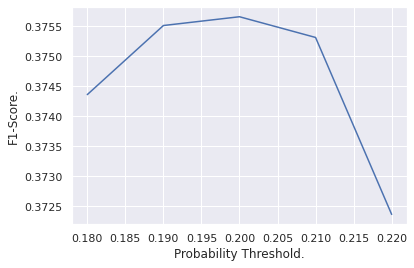

In [ ]:
plt.plot(thresh_list, f_score_cv_list)
plt.xlabel("Probability Threshold.")
plt.ylabel("F1-Score.");

> 0.20 is the best probability threshold.

In [ ]:
pred = (prob_pred[:,1]>=0.20).astype(np.uint8)
target = 'dt_pred'
dataset[target] = pred

In [ ]:
%%time
f_score_tr = f_score(dataset[dataset.eval_set=='train'],
                     target=target,
                     pr_re=False)
f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                     target=target,
                     pr_re=False)
print('Train F1-score     :',f_score_tr)
print('Validation F1-score:',f_score_cv)

Train F1-score     : 0.37837260199264927
Validation F1-score: 0.3756575239131667
CPU times: user 1min 46s, sys: 5.45 s, total: 1min 51s
Wall time: 1min 43s


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target=target,
           msg='Decision Tree. th: 0.2')

100% 4.30M/4.30M [00:01<00:00, 2.97MB/s]
Successfully submitted to Instacart Market Basket AnalysisWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission.csv              2021-07-16 15:14:26  Decision Tree. th: 0.2                          complete  0.37913      0.37745       
submission.csv              2021-07-01 19:01:01  1st-cut Approach Log-Reg th:0.18                complete  0.36886      0.36742       
last_order.csv              2021-07-01 16:47:38  reorders of last order as prediction            complete  0.32768      0.32763       
last_order.csv              2021-07-01 16:34:08  purchases of last order as reorder              complete  0.311

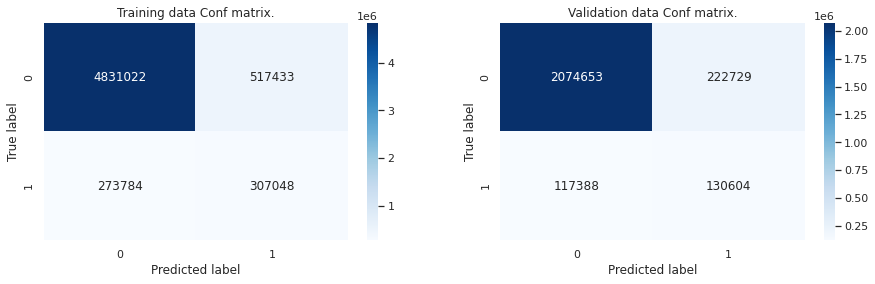

In [ ]:
# confusion matrix
fig,ax = plt.subplots(1,2,figsize=(15,4))
plot_confusion_matrix(dataset.loc[dataset.eval_set=='train','reordered'],
                 dataset.loc[dataset.eval_set=='train',target],
                 title='Training data Conf matrix.',
                 ax=ax[0])

plot_confusion_matrix(dataset.loc[dataset.eval_set=='cv','reordered'],
                 dataset.loc[dataset.eval_set=='cv',target],
                 title='Validation data Conf matrix.',
                 ax=ax[1])

In [ ]:
importance = calibrated_clf.calibrated_classifiers_[0].base_estimator.feature_importances_

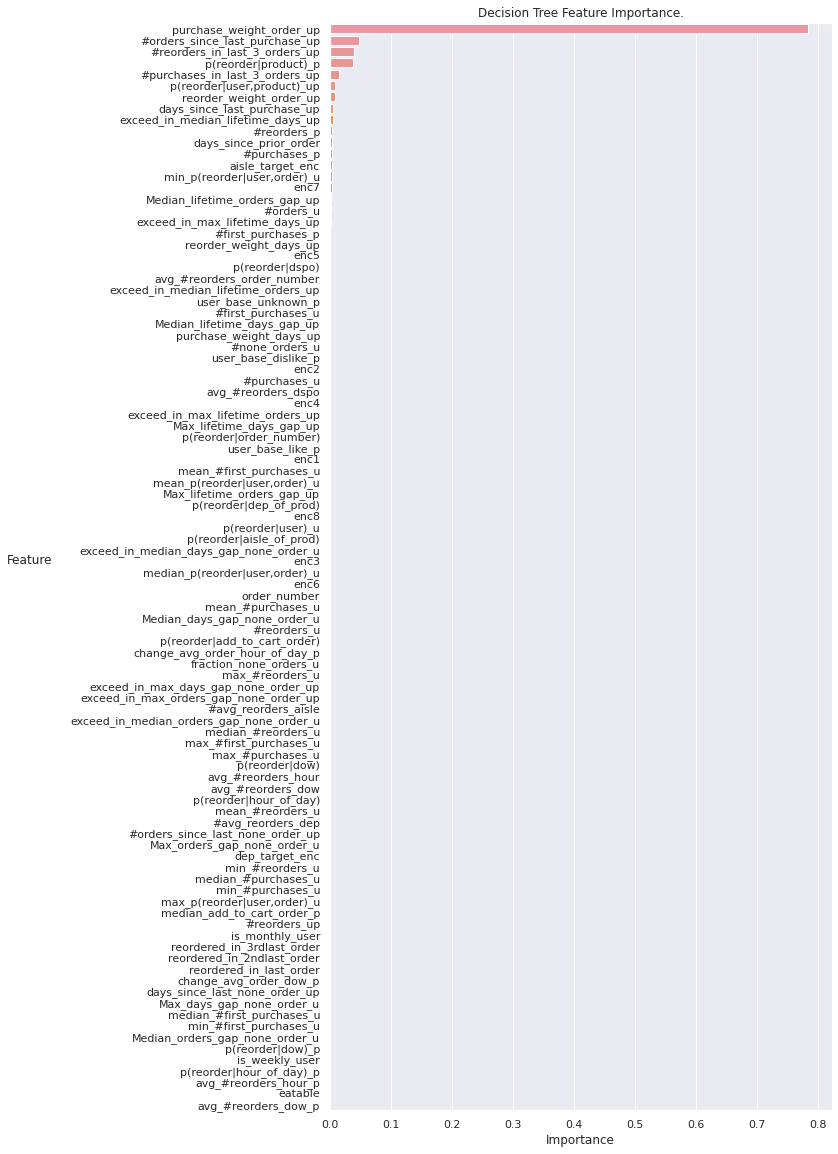

In [ ]:
ftr_imp = plot_feature_importance(importance,
                                  ftrs,
                                  'Decision Tree',
                                  figsize=(9,20),
                                  return_ftr_imp=True)

## Random Forest

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
clf = RandomForestClassifier(class_weight='balanced_subsample',
                             n_estimators=150,
                             max_features="auto",
                             max_samples=2/3,
                             max_depth=None,
                             min_weight_fraction_leaf=0.00035,
                             random_state=9,
                             n_jobs=30)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)\
            .split(dataset.loc[dataset.eval_set=='train',ftrs],
                    dataset.loc[dataset.eval_set=='train','reordered'],
                    dataset.loc[dataset.eval_set=='train','order_id'])

calibrated_clf = CalibratedClassifierCV(base_estimator=clf,
                                        method='isotonic',
                                        cv=gss)

calibrated_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
                   dataset.loc[dataset.eval_set=='train','reordered'])

CPU times: user 2h 14s, sys: 1min 3s, total: 2h 1min 18s
Wall time: 5min 6s


In [ ]:
%%time
prob_pred = batch_predict_proba(calibrated_clf,dataset[ftrs],batch_size=0.1)

CPU times: user 9min 40s, sys: 4.1 s, total: 9min 44s
Wall time: 41.1 s


Train:


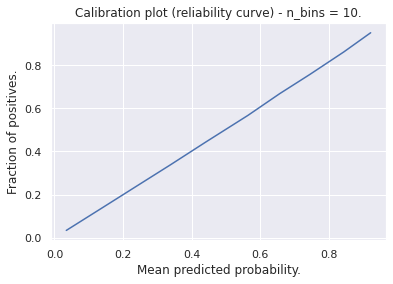

Validation:


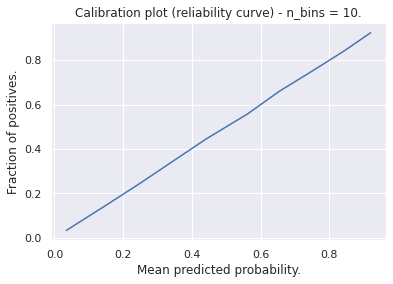

In [ ]:
# checking if probabilities are well calibrated or not
printb('Train:')
eval_set = 'train'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

printb('Validation:')
eval_set = 'cv'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

> Calibration curve is an almost straight line. Hence, the probabilities are well calibrated.

In [ ]:
# Finding best threshold
thresh_list = [0.18, 0.19, 0.20, 0.21, 0.22]
f_score_cv_list = []
best_f_score_cv = 0

tqdm_obj = tqdm(thresh_list)
for th in tqdm_obj:
    pred = (prob_pred[:,1]>=th).astype(np.uint8)
    target = 'rf_pred'
    dataset[target] = pred
    f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                        target=target,
                        pr_re=False)
    f_score_cv_list.append(f_score_cv)

    if(f_score_cv > best_f_score_cv):
        best_f_score_cv = f_score_cv
        best_thresh = th

    tqdm_obj.set_postfix({'Best Threshold':best_thresh,
                          'Best CV F1-score': best_f_score_cv})

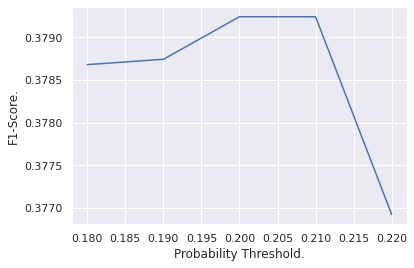

In [ ]:
plt.plot(thresh_list, f_score_cv_list)
plt.xlabel("Probability Threshold.")
plt.ylabel("F1-Score.");

> 0.20 is the best probability threshold.

In [ ]:
pred = (prob_pred[:,1]>=0.2).astype(np.uint8)
target = 'rf_pred'
dataset[target] = pred

In [ ]:
%%time
f_score_tr = f_score(dataset[dataset.eval_set=='train'],
                     target=target,
                     pr_re=False)
f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                     target=target,
                     pr_re=False)
print('Train F1-score     :',f_score_tr)
print('Validation F1-score:',f_score_cv)

Train F1-score     : 0.3829364175140252
Validation F1-score: 0.37923951424968283
CPU times: user 1min 49s, sys: 5.57 s, total: 1min 55s
Wall time: 1min 46s


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target=target,
           msg='Random Forest. th: 0.2')

100% 4.28M/4.28M [00:01<00:00, 3.16MB/s]
Successfully submitted to Instacart Market Basket AnalysisWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission.csv              2021-07-24 14:56:45  Random Forest. th: 0.2                          complete  0.38282      0.38121       
submission.csv              2021-07-16 15:14:26  Decision Tree. th: 0.2                          complete  0.37913      0.37745       
submission.csv              2021-07-01 19:01:01  1st-cut Approach Log-Reg th:0.18                complete  0.36886      0.36742       
last_order.csv              2021-07-01 16:47:38  reorders of last order as prediction            complete  0.327

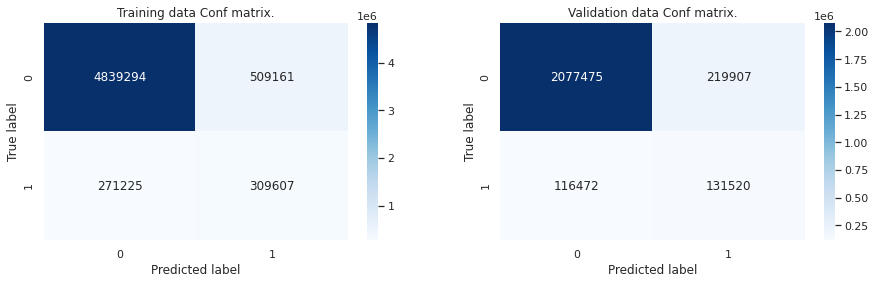

In [ ]:
# confusion matrix
fig,ax = plt.subplots(1,2,figsize=(15,4))
plot_confusion_matrix(dataset.loc[dataset.eval_set=='train','reordered'],
                 dataset.loc[dataset.eval_set=='train',target],
                 title='Training data Conf matrix.',
                 ax=ax[0])

plot_confusion_matrix(dataset.loc[dataset.eval_set=='cv','reordered'],
                 dataset.loc[dataset.eval_set=='cv',target],
                 title='Validation data Conf matrix.',
                 ax=ax[1])

In [ ]:
importance = calibrated_clf.calibrated_classifiers_[0].base_estimator.feature_importances_

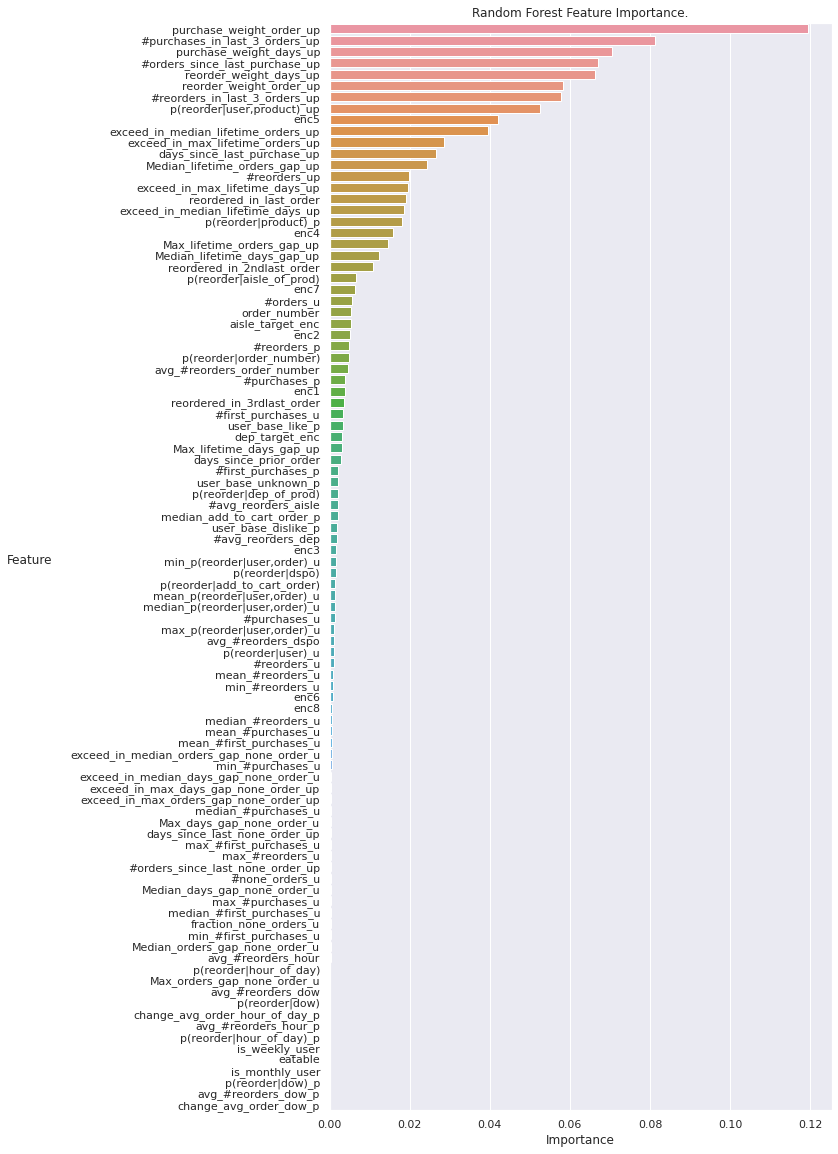

In [ ]:
ftr_imp = plot_feature_importance(importance,
                                  ftrs,
                                  'Random Forest',
                                  figsize=(9,20),
                                  return_ftr_imp=True)

## AdaBoost

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import GroupShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
%%time
base_clf = DecisionTreeClassifier(max_depth=1)

clf = AdaBoostClassifier(base_estimator=base_clf,
                         n_estimators=50,
                         learning_rate=1,
                         random_state=9)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=5)\
            .split(dataset.loc[dataset.eval_set=='train',ftrs],
                    dataset.loc[dataset.eval_set=='train','reordered'],
                    dataset.loc[dataset.eval_set=='train','order_id'])

calibrated_clf = CalibratedClassifierCV(base_estimator=clf,
                                        method='isotonic',
                                        cv=gss)

calibrated_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
                   dataset.loc[dataset.eval_set=='train','reordered'])

CPU times: user 47min 36s, sys: 4.3 s, total: 47min 40s
Wall time: 47min 28s


In [ ]:
%%time
prob_pred = batch_predict_proba(calibrated_clf,dataset[ftrs], batch_size=0.1)

CPU times: user 3min 59s, sys: 25.6 s, total: 4min 25s
Wall time: 4min 24s


Train:


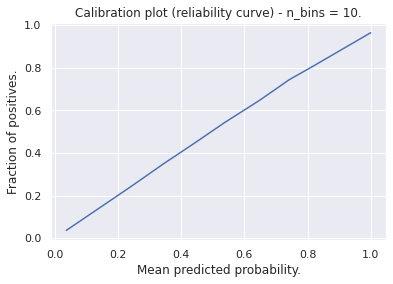

Validation:


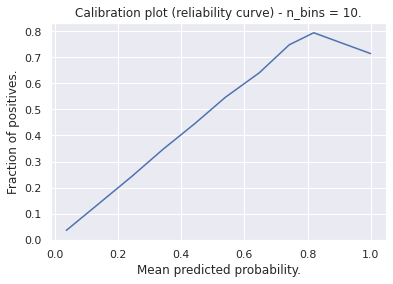

In [ ]:
# checking if probabilities are well calibrated or not
printb('Train:')
eval_set = 'train'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

printb('Validation:')
eval_set = 'cv'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

> Calibration curve is little bit deviated from a 45 deg straight line. But still it is good. Hence, the probabilities are calibrated.

In [ ]:
# Finding best threshold
thresh_list = [0.18, 0.19, 0.20, 0.21, 0.22]
f_score_cv_list = []
best_f_score_cv = 0

tqdm_obj = tqdm(thresh_list)
for th in tqdm_obj:
    pred = (prob_pred[:,1]>=th).astype(np.uint8)
    target = 'adb_pred'
    dataset[target] = pred
    f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                        target=target,
                        pr_re=False)
    f_score_cv_list.append(f_score_cv)

    if(f_score_cv > best_f_score_cv):
        best_f_score_cv = f_score_cv
        best_thresh = th

    tqdm_obj.set_postfix({'Best Threshold':best_thresh,
                          'Best CV F1-score': best_f_score_cv})

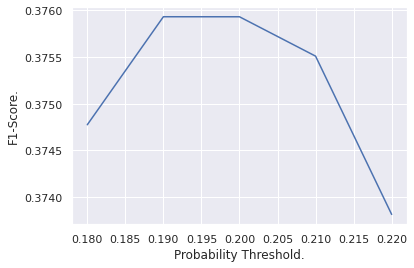

In [ ]:
plt.plot(thresh_list, f_score_cv_list)
plt.xlabel("Probability Threshold.")
plt.ylabel("F1-Score.");

> 0.19 is the best probability threshold.

In [ ]:
pred = (prob_pred[:,1]>=0.19).astype(np.uint8)
target = 'adb_pred'
dataset[target] = pred

In [ ]:
%%time
f_score_tr = f_score(dataset[dataset.eval_set=='train'],
                     target=target,
                     pr_re=False)
f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                     target=target,
                     pr_re=False)
print('Train F1-score     :',f_score_tr)
print('Validation F1-score:',f_score_cv)

Train F1-score     : 0.3760896135372489
Validation F1-score: 0.3759309379700223
CPU times: user 1min 51s, sys: 4.98 s, total: 1min 56s
Wall time: 1min 48s


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target=target,
           msg='AdaBoost th: 0.19')

100% 4.43M/4.43M [00:00<00:00, 4.81MB/s]
Successfully submitted to Instacart Market Basket AnalysisWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission.csv              2021-07-24 14:59:54  AdaBoost th: 0.19                               complete  0.37906      0.37711       
submission.csv              2021-07-24 14:56:45  Random Forest. th: 0.2                          complete  0.38282      0.38121       
submission.csv              2021-07-16 15:14:26  Decision Tree. th: 0.2                          complete  0.37913      0.37745       
submission.csv              2021-07-01 19:01:01  1st-cut Approach Log-Reg th:0.18                complete  0.368

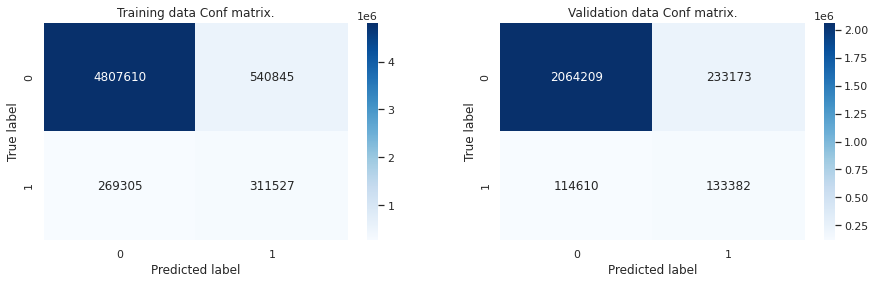

In [ ]:
# confusion matrix
fig,ax = plt.subplots(1,2,figsize=(15,4))
plot_confusion_matrix(dataset.loc[dataset.eval_set=='train','reordered'],
                 dataset.loc[dataset.eval_set=='train',target],
                 title='Training data Conf matrix.',
                 ax=ax[0])

plot_confusion_matrix(dataset.loc[dataset.eval_set=='cv','reordered'],
                 dataset.loc[dataset.eval_set=='cv',target],
                 title='Validation data Conf matrix.',
                 ax=ax[1])

In [ ]:
importance = calibrated_clf.calibrated_classifiers_[0].base_estimator.feature_importances_

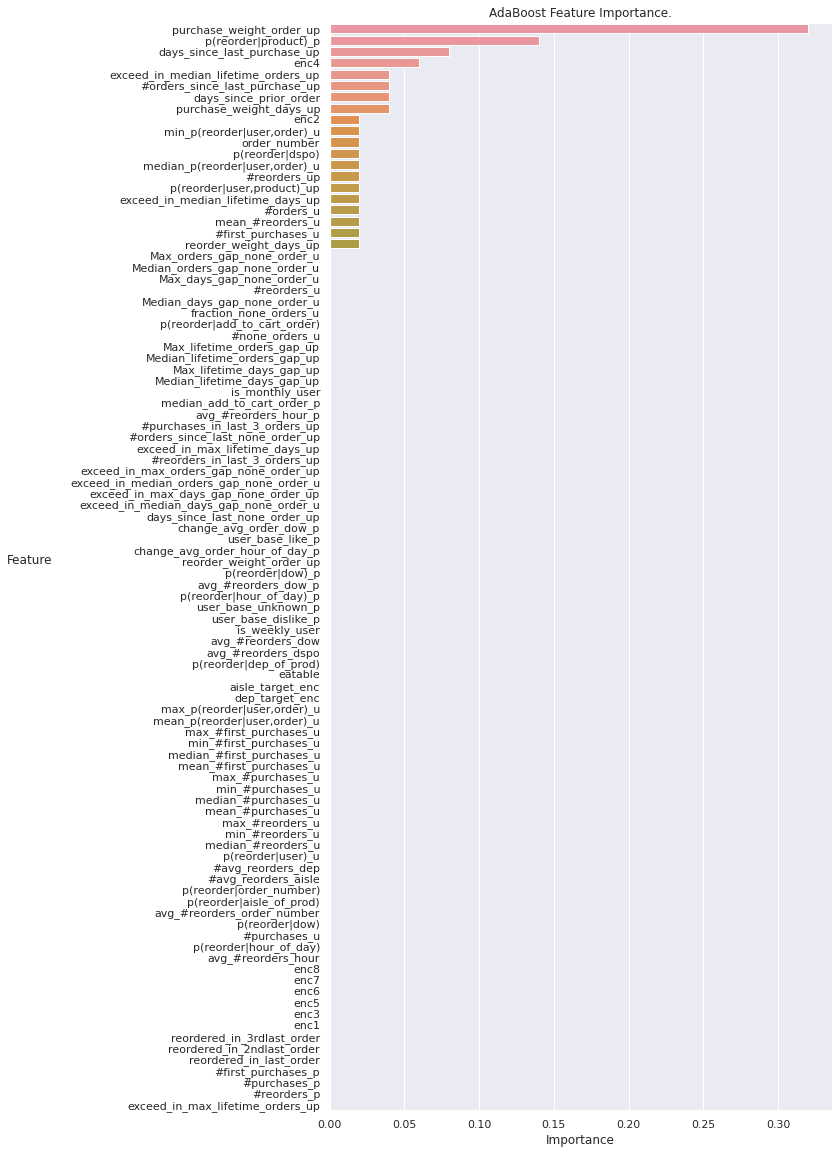

In [ ]:
ftr_imp = plot_feature_importance(importance,
                                  ftrs,
                                  'AdaBoost',
                                  figsize=(9,20),
                                  return_ftr_imp=True)

## LGBM Model:

In [ ]:
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# https://lightgbm.readthedocs.io/en/latest/Parameters.html
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import GroupShuffleSplit

In [ ]:
%%time
clf = LGBMClassifier(boosting_type='gbdt',
                     objective='binary',
                     n_estimators=200,
                     is_unbalance=True,
                     learning_rate=0.025,
                     lambda_l1=200,
                     lambda_l2=0,
                     max_depth=10,
                     num_leaves=96,
                     pos_subsample=0.95,    # subsampling +ve datapoints.
                     neg_subsample=0.95,    # subsampling -ve datapoints.
                     bagging_freq=5,    # subsampling after every k iteration
                     feature_fraction=0.5,  # fraction of ftrs for each tree
                     feature_fraction_bynode=0.8, # frac of ftrs for each node of tree
                     min_child_weight=4500,
                     importance_type='gain',
                     random_state=3,
                     n_jobs=-1)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)\
            .split(dataset.loc[dataset.eval_set=='train',ftrs],
                    dataset.loc[dataset.eval_set=='train','reordered'],
                    dataset.loc[dataset.eval_set=='train','order_id'])

calibrated_clf = CalibratedClassifierCV(base_estimator=clf,
                                        method='isotonic',
                                        cv=gss)

calibrated_clf.fit(dataset.loc[dataset.eval_set=='train',ftrs],
                   dataset.loc[dataset.eval_set=='train','reordered'])

CPU times: user 33min 6s, sys: 2.96 s, total: 33min 9s
Wall time: 1min 8s


In [ ]:
%%time
prob_pred = batch_predict_proba(calibrated_clf,dataset[ftrs],batch_size=0.1)

CPU times: user 6min 54s, sys: 1.7 s, total: 6min 56s
Wall time: 30.1 s


Train:


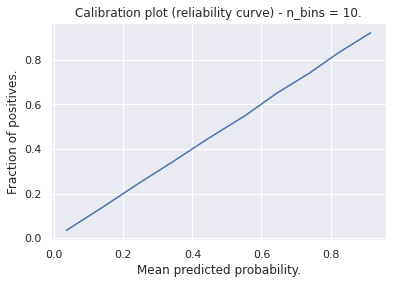

Validation:


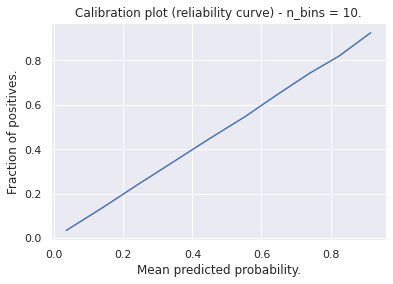

In [ ]:
# checking if probabilities are well calibrated or not
printb('Train:')
eval_set = 'train'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

printb('Validation:')
eval_set = 'cv'
idx = dataset.loc[dataset.eval_set==eval_set,'eval_set'].index
n_bins=10
plot_calibration_curve(dataset.loc[dataset.eval_set==eval_set,'reordered'],
                        prob_pred[idx,1],
                        n_bins=n_bins,
                       normalize=False)
plt.show()

> Calibration curve is an almost straight line. Hence, the probabilities are well calibrated.

In [ ]:
# Finding best threshold
thresh_list = [0.18, 0.19, 0.20, 0.21, 0.22]
f_score_cv_list = []
best_f_score_cv = 0

tqdm_obj = tqdm(thresh_list)
for th in tqdm_obj:
    pred = (prob_pred[:,1]>=th).astype(np.uint8)
    target = 'lgbm_pred'
    dataset[target] = pred
    f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                        target=target,
                        pr_re=False)
    f_score_cv_list.append(f_score_cv)

    if(f_score_cv > best_f_score_cv):
        best_f_score_cv = f_score_cv
        best_thresh = th

    tqdm_obj.set_postfix({'Best Threshold':best_thresh,
                          'Best CV F1-score': best_f_score_cv})

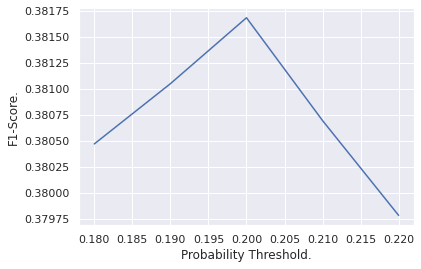

In [ ]:
plt.plot(thresh_list, f_score_cv_list)
plt.xlabel("Probability Threshold.")
plt.ylabel("F1-Score.");

> 0.20 is the best probability threshold.

In [ ]:
pred = (prob_pred[:,1]>=0.2).astype(np.uint8)
target = 'lgbm_pred'
dataset[target] = pred

In [ ]:
%%time
f_score_tr = f_score(dataset[dataset.eval_set=='train'],
                     target=target,
                     pr_re=False)
f_score_cv = f_score(dataset[dataset.eval_set=='cv'],
                     target=target,
                     pr_re=False)
print('Train F1-score     :',f_score_tr)
print('Validation F1-score:',f_score_cv)

Train F1-score     : 0.3833972001591395
Validation F1-score: 0.3816832156221942
CPU times: user 1min 50s, sys: 5.76 s, total: 1min 56s
Wall time: 1min 47s


In [ ]:
submission(dataset[dataset.eval_set=='test'],
           target=target,
           msg='LightGBM th:0.2')

100% 4.31M/4.31M [00:01<00:00, 3.08MB/s]
Successfully submitted to Instacart Market Basket AnalysisWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                    date                 description                                     status    publicScore  privateScore  
--------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission.csv              2021-07-24 15:13:11  LightGBM th:0.2                                 complete  0.38470      0.38380       
submission.csv              2021-07-24 14:59:54  AdaBoost th: 0.19                               complete  0.37906      0.37711       
submission.csv              2021-07-24 14:56:45  Random Forest. th: 0.2                          complete  0.38282      0.38121       
submission.csv              2021-07-16 15:14:26  Decision Tree. th: 0.2                          complete  0.379

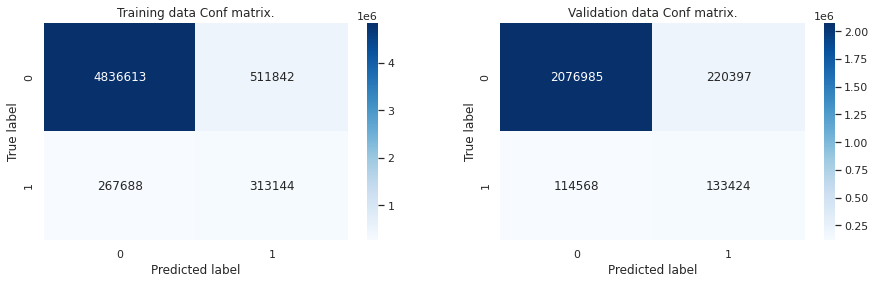

In [ ]:
# confusion matrix
fig,ax = plt.subplots(1,2,figsize=(15,4))
plot_confusion_matrix(dataset.loc[dataset.eval_set=='train','reordered'],
                 dataset.loc[dataset.eval_set=='train',target],
                 title='Training data Conf matrix.',
                 ax=ax[0])

plot_confusion_matrix(dataset.loc[dataset.eval_set=='cv','reordered'],
                 dataset.loc[dataset.eval_set=='cv',target],
                 title='Validation data Conf matrix.',
                 ax=ax[1])

In [ ]:
importance = calibrated_clf.calibrated_classifiers_[0].base_estimator.feature_importances_

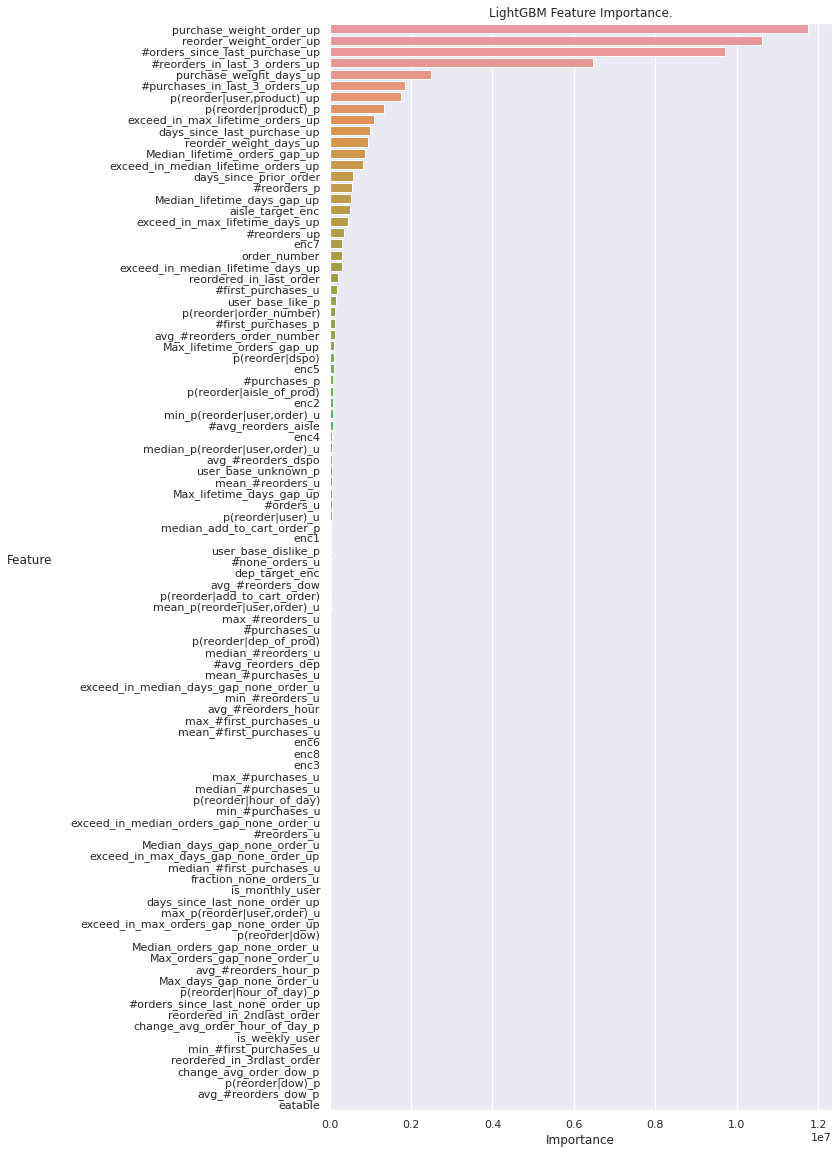

In [ ]:
ftr_imp = plot_feature_importance(importance,
                                  ftrs,
                                  'LightGBM',
                                  figsize=(9,20),
                                  return_ftr_imp=True)

In [ ]:
dataset.to_feather('dataset.feather')

In [ ]:
kaggle_file_uploader(['./dataset.feather'],
                     msg='Full Dataset with predictions.')

Data package template written to: data/dataset-metadata.json
Starting upload for file dataset.feather
100% 2.03G/2.03G [00:30<00:00, 70.4MB/s]
Upload successful: dataset.feather (2GB)
Dataset version is being created. Please check progress at /api/v1/datasets/status/shubhamscifi/instacart


In [ ]:
print("Zero Importance Features:")
ftr_imp[ftr_imp.Importance==0]

Zero Importance Features:


Feature  Importance
92  change_avg_order_dow_p         0.0
93        p(reorder|dow)_p         0.0
94     avg_#reorders_dow_p         0.0
95                 eatable         0.0

In [ ]:
dataset = pd.read_feather('dataset.feather')

In [ ]:
# Excluding the zero importance features.
ftrs = (list(dataset.columns[5:27]) +  
        list(dataset.columns[28:49]) + 
        list(dataset.columns[50:81]) + 
        list(dataset.columns[83:88]) + 
        list(dataset.columns[89:102]))
print("No. of features in data:",len(ftrs))

No. of features in data: 92


## Summary of Predictive models:
Model | Test F1-score | Rank
--- | --- | ---
**LightGBM** | **0.38380** | **1st**
Random Forest | 0.38121 | 2nd
Decision Tree | 0.37745 | 3rd
AdaBoost | 0.37711 | 4th
Logistic-Reg (only on 44 ftrs) | 0.36742 | 5th



**Best Model:**
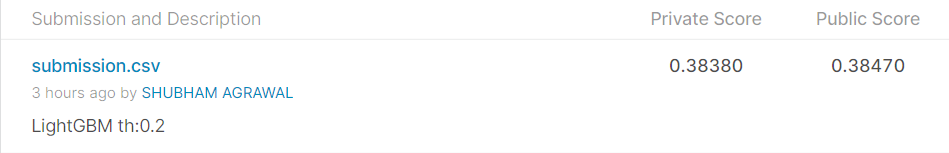


---
---